In [37]:
import pandas as pd

# Define los delimitadores específicos para cada archivo,
# basado en tu solicitud y el error que vimos (precio_2023.csv falló con ',')
file_delimiters = {
    'precio_2023.csv': ';',
    'precio_2024.csv': ',',
    'precio_2025.csv': ','
}

list_of_dfs = []

print("Iniciando el proceso de combinación con delimitadores específicos...")

# Itera sobre el diccionario de archivos y sus delimitadores
for file, delimiter in file_delimiters.items():
    print(f"Intentando leer '{file}' con delimitador '{delimiter}'...")
    
    try:
        # Intento 1: Leer con codificación 'utf-8' y el delimitador especificado
        df = pd.read_csv(
            file, 
            sep=delimiter, 
            on_bad_lines='skip'  # Ignora líneas problemáticas como la 675
        )
        print(f"Éxito (UTF-8): El archivo '{file}' fue leído y agregado.")
        list_of_dfs.append(df)
        
    except UnicodeDecodeError:
        # Intento 2: Si 'utf-8' falla, reintenta con 'latin1'
        try:
            print(f"  > '{file}': Falló UTF-8. Reintentando con 'latin1'...")
            df = pd.read_csv(
                file, 
                sep=delimiter, 
                encoding='latin1', 
                on_bad_lines='skip'  # Ignora líneas problemáticas
            )
            print(f"Éxito (latin1): El archivo '{file}' fue leído y agregado.")
            list_of_dfs.append(df)
        except Exception as e:
            # Captura cualquier error durante el intento con 'latin1'
            print(f"Error: No se pudo leer el archivo '{file}' con 'latin1'. Error: {e}. Será omitido.")
            
    except FileNotFoundError:
        # Si el archivo no se encuentra
        print(f"Advertencia: No se encontró el archivo '{file}'. Será omitido.")
        
    except Exception as e:
        # Captura cualquier otro error (ej. si el delimitador es incorrecto a pesar de la especificación)
        # El error original 'Error tokenizing data' caería aquí.
        print(f"Error: No se pudo procesar el archivo '{file}'. Error: {e}. Será omitido.")

# --- Combinación Final ---
if not list_of_dfs:
    print("\nProceso fallido: No se pudo leer ninguno de los archivos.")
else:
    # Si se leyó al menos un archivo, concaténalos
    df_precios_combinados2 = pd.concat(list_of_dfs, ignore_index=True)
    
    output_filename = 'precios_combinados2.csv'
    
    # Guarda el DataFrame combinado
    df_precios_combinados2.to_csv(output_filename, index=False)
    
    print(f"\n¡Proceso completado!")
    print(f"Se combinaron exitosamente {len(list_of_dfs)} archivo(s) de {len(file_delimiters)} solicitados.")
    print(f"El archivo combinado se ha guardado como: '{output_filename}'")
    
    print("\n--- Información del DataFrame Combinado Final ---")
    df_precios_combinados2.info()

Iniciando el proceso de combinación con delimitadores específicos...
Intentando leer 'precio_2023.csv' con delimitador ';'...
  > 'precio_2023.csv': Falló UTF-8. Reintentando con 'latin1'...
Éxito (latin1): El archivo 'precio_2023.csv' fue leído y agregado.
Intentando leer 'precio_2024.csv' con delimitador ','...
  > 'precio_2024.csv': Falló UTF-8. Reintentando con 'latin1'...
Éxito (latin1): El archivo 'precio_2024.csv' fue leído y agregado.
Intentando leer 'precio_2025.csv' con delimitador ','...
  > 'precio_2025.csv': Falló UTF-8. Reintentando con 'latin1'...
Éxito (latin1): El archivo 'precio_2025.csv' fue leído y agregado.

¡Proceso completado!
Se combinaron exitosamente 3 archivo(s) de 3 solicitados.
El archivo combinado se ha guardado como: 'precios_combinados2.csv'

--- Información del DataFrame Combinado Final ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842124 entries, 0 to 2842123
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------   

In [1]:
import tensorflow as tf
tf.__version__


2025-12-03 01:24:18.129439: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-03 01:24:18.390684: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.17.0'

In [38]:
df_precios_combinados2 = pd.read_csv("/home/usuario1/Documents/VSCODE/DEEP/precios_combinados2.csv", sep=",", encoding="utf-8")
df_precios_combinados2

,ÿAño,Mes,Semana,Fecha inicio,Fecha término,ID región,Región,Sector,Tipo de punto monitoreo,Grupo,Producto,Variedad,Calidad,Unidad,Precio mínimo,Precio máximo,Precio promedio,"ÿ""Año"""
0,2023.0,1,1,02/01/2023,06/01/2023,4,Región de Coquimbo,Coquimbo,Carnicería,Carne bovina,Abastero,NaN,NaN,$/kilo,8698,8698,8698,NaN
1,2023.0,1,1,02/01/2023,06/01/2023,4,Región de Coquimbo,Coquimbo,Carnicería,Carne bovina,Abastero,NaN,NaN,$/kilo,8698,8698,8698,NaN
2,2023.0,1,1,02/01/2023,06/01/2023,4,Región de Coquimbo,Coquimbo,Carnicería,Carne bovina,Abastero,NaN,NaN,$/kilo,7998,7998,7998,NaN
3,2023.0,1,1,02/01/2023,06/01/2023,4,Región de Coquimbo,Coquimbo,Carnicería,Carne bovina,Abastero,NaN,NaN,$/kilo,7998,7998,7998,NaN
4,2023.0,1,1,02/01/2023,06/01/2023,4,Región de Coquimbo,Coquimbo,Carnicería,Carne bovina,Asado Carnicero,NaN,NaN,$/kilo,9190,9190,9190,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842119,NaN,3,11,2025-03-10,2025-03-14,16,Región de Ñuble,Punilla,Supermercado,Pan,Marraqueta,NaN,NaN,$/kilo,2190,2190,"2190,00",2025.0
2842120,NaN,3,11,2025-03-10,2025-03-14,16,Región de Ñuble,Punilla,Supermercado,Pan,Marraqueta,NaN,NaN,$/kilo,2190,2190,"2190,00",2025.0
2842121,NaN,3,11,2025-03-10,2025-03-14,16,Región de Ñuble,Punilla,Supermercado,Pan,Marraqueta,NaN,NaN,$/kilo,1890,1890,"1890,00",2025.0
2842122,NaN,3,11,2025-03-10,2025-03-14,16,Región de Ñuble,Punilla,Supermercado,Pan,Pan amasado,NaN,NaN,$/kilo,2890,2890,"2890,00",2025.0


In [39]:
df_precios_combinados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842124 entries, 0 to 2842123
Data columns (total 18 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   ÿAño                     float64
 1   Mes                      int64  
 2   Semana                   int64  
 3   Fecha inicio             object 
 4   Fecha término            object 
 5   ID región                int64  
 6   Región                   object 
 7   Sector                   object 
 8   Tipo de punto monitoreo  object 
 9   Grupo                    object 
 10  Producto                 object 
 11  Variedad                 object 
 12  Calidad                  object 
 13  Unidad                   object 
 14  Precio mínimo            int64  
 15  Precio máximo            int64  
 16  Precio promedio          object 
 17  ÿ"Año"                   float64
dtypes: float64(2), int64(5), object(11)
memory usage: 390.3+ MB


In [40]:
# Eliminar VARIAS columnas a la vez
df_precios_combinados2 = df_precios_combinados2.drop(columns=['Fecha término', 'ID región','Sector','Tipo de punto monitoreo','Grupo','Variedad','Calidad','Precio mínimo','Precio máximo','Región'])

In [5]:
df_precios_combinados2

,Año,Mes,Semana,Fecha inicio,Producto,Unidad,Precio promedio
0,2023,1,1,02/01/2023,Abastero,$/kilo,8698
1,2023,1,1,02/01/2023,Abastero,$/kilo,8698
2,2023,1,1,02/01/2023,Abastero,$/kilo,7998
3,2023,1,1,02/01/2023,Abastero,$/kilo,7998
4,2023,1,1,02/01/2023,Asado Carnicero,$/kilo,9190
...,...,...,...,...,...,...,...
2842119,2025,3,11,2025-03-10,Marraqueta,$/kilo,"2190,00"
2842120,2025,3,11,2025-03-10,Marraqueta,$/kilo,"2190,00"
2842121,2025,3,11,2025-03-10,Marraqueta,$/kilo,"1890,00"
2842122,2025,3,11,2025-03-10,Pan amasado,$/kilo,"2890,00"


se deja fecha inicio para trasnforma el dia del año
se deja unidad para hacer la estandarización de los precios

In [41]:
df_precios_combinados2['Fecha inicio'] = pd.to_datetime(
        df_precios_combinados2['Fecha inicio'], 
        format='mixed',  # Permite que coexistan ambos formatos
        dayfirst=True,   # Indica que en formatos ambiguos, el día va primero
        errors='coerce'  # Si alguna fecha es inválida, la convierte en NaT (Not a Time)
    )
    

In [42]:
df_precios_combinados2

,ÿAño,Mes,Semana,Fecha inicio,Producto,Unidad,Precio promedio,"ÿ""Año"""
0,2023.0,1,1,2023-01-02,Abastero,$/kilo,8698,NaN
1,2023.0,1,1,2023-01-02,Abastero,$/kilo,8698,NaN
2,2023.0,1,1,2023-01-02,Abastero,$/kilo,7998,NaN
3,2023.0,1,1,2023-01-02,Abastero,$/kilo,7998,NaN
4,2023.0,1,1,2023-01-02,Asado Carnicero,$/kilo,9190,NaN
...,...,...,...,...,...,...,...,...
2842119,NaN,3,11,2025-03-10,Marraqueta,$/kilo,"2190,00",2025.0
2842120,NaN,3,11,2025-03-10,Marraqueta,$/kilo,"2190,00",2025.0
2842121,NaN,3,11,2025-03-10,Marraqueta,$/kilo,"1890,00",2025.0
2842122,NaN,3,11,2025-03-10,Pan amasado,$/kilo,"2890,00",2025.0


In [43]:
mask_errores = df_precios_combinados2['Fecha inicio'].isnull()
filas_con_error = df_precios_combinados2[mask_errores]
if filas_con_error.empty:
        print("¡Éxito! Todas las fechas se convirtieron correctamente.")
else:
        print(f"\n--- ¡Alerta! Se encontraron {len(filas_con_error)} filas donde la fecha no se pudo convertir ---")
        print("Estas son las 10 fechas (texto original) que más se repitieron:")
        print(filas_con_error['Fecha_inicio_original'].value_counts().head(10).to_markdown())
        
        print("\nPosibles razones de la falla:")
        print("- El texto no es una fecha (ej. 'sin fecha', 'N/A', o un texto corrupto).")
        print("- El formato es ambiguo y no coincide con 'DD/MM/YYYY' ni 'YYYY-MM-DD'.")
        print("- La fecha es inválida (ej. '30/02/2023').")

¡Éxito! Todas las fechas se convirtieron correctamente.


In [44]:
df_precios_combinados2['day_of_year'] = df_precios_combinados2['Fecha inicio'].dt.dayofyear


In [10]:
df_precios_combinados2

,ÿAño,Mes,Semana,Fecha inicio,Producto,Unidad,Precio promedio,"ÿ""Año""",day_of_year
0,2023.0,1,1,2023-01-02,Abastero,$/kilo,8698,NaN,2
1,2023.0,1,1,2023-01-02,Abastero,$/kilo,8698,NaN,2
2,2023.0,1,1,2023-01-02,Abastero,$/kilo,7998,NaN,2
3,2023.0,1,1,2023-01-02,Abastero,$/kilo,7998,NaN,2
4,2023.0,1,1,2023-01-02,Asado Carnicero,$/kilo,9190,NaN,2
...,...,...,...,...,...,...,...,...,...
2842119,NaN,3,11,2025-03-10,Marraqueta,$/kilo,"2190,00",2025.0,69
2842120,NaN,3,11,2025-03-10,Marraqueta,$/kilo,"2190,00",2025.0,69
2842121,NaN,3,11,2025-03-10,Marraqueta,$/kilo,"1890,00",2025.0,69
2842122,NaN,3,11,2025-03-10,Pan amasado,$/kilo,"2890,00",2025.0,69


Codificar valores cíclicos usando transformación seno y coseno:
Mes 1 y Mes 12 pasan a estar cerca en el espacio, reflejando estacionalidad

Semana 1 y Semana 52 también quedan cerca

In [45]:
import numpy as np
df_precios_combinados2['sin_mes'] = np.sin(2 * np.pi * df_precios_combinados2['Mes'] / 12)
df_precios_combinados2['cos_mes'] = np.cos(2 * np.pi * df_precios_combinados2['Mes'] / 12)


In [46]:
df_precios_combinados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842124 entries, 0 to 2842123
Data columns (total 11 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ÿAño             float64       
 1   Mes              int64         
 2   Semana           int64         
 3   Fecha inicio     datetime64[ns]
 4   Producto         object        
 5   Unidad           object        
 6   Precio promedio  object        
 7   ÿ"Año"           float64       
 8   day_of_year      int32         
 9   sin_mes          float64       
 10  cos_mes          float64       
dtypes: datetime64[ns](1), float64(4), int32(1), int64(2), object(3)
memory usage: 227.7+ MB


In [47]:
import pandas as pd

# Verificamos si la columna existe antes de intentar nada
if 'Precio promedio' in df_precios_combinados2.columns:
    
    # Verificamos si es texto (object). Si ya es float, nos saltamos este paso.
    if df_precios_combinados2['Precio promedio'].dtype == 'object':
        print("Transformando columna 'Precio promedio'...")
        
        # 1. Reemplazamos la coma decimal (',') por un punto ('.')
        df_precios_combinados2['Precio promedio'] = df_precios_combinados2['Precio promedio'].astype(str).str.replace(',', '.', regex=False)
        
        # 2. Convertimos a tipo numérico (float)
        # errors='coerce' transformará en NaN (Not a Number) los valores que no pueda entender
        df_precios_combinados2['Precio promedio'] = pd.to_numeric(df_precios_combinados2['Precio promedio'], errors='coerce')
        
        print("¡Conversión completada!")
    else:
        print("La columna 'Precio promedio' ya era numérica. No se hicieron cambios.")

else:
    print("Error: No se encontró la columna 'Precio promedio' en el DataFrame.")

# --- Verificación Final ---
print("\n--- Información Actualizada ---")
print(df_precios_combinados2['Precio promedio'].head())
print("Tipo de dato final:", df_precios_combinados2['Precio promedio'].dtype)

# Chequeo de nulos (por si 'coerce' generó muchos fallos)
nulos = df_precios_combinados2['Precio promedio'].isnull().sum()
if nulos > 0:
    print(f"\n⚠️ Cuidado: Se generaron {nulos} valores vacíos (NaN). Revisa si había textos raros en los precios.")

Transformando columna 'Precio promedio'...
¡Conversión completada!

--- Información Actualizada ---
0    8698.0
1    8698.0
2    7998.0
3    7998.0
4    9190.0
Name: Precio promedio, dtype: float64
Tipo de dato final: float64


precio promedio fue trasnformada a float, solo falta unidad, necesaria para la estandarizacion de precio  y precio promedio para lo mismo.

In [48]:
df_precios_combinados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842124 entries, 0 to 2842123
Data columns (total 11 columns):
 #   Column           Dtype         
---  ------           -----         
 0   ÿAño             float64       
 1   Mes              int64         
 2   Semana           int64         
 3   Fecha inicio     datetime64[ns]
 4   Producto         object        
 5   Unidad           object        
 6   Precio promedio  float64       
 7   ÿ"Año"           float64       
 8   day_of_year      int32         
 9   sin_mes          float64       
 10  cos_mes          float64       
dtypes: datetime64[ns](1), float64(5), int32(1), int64(2), object(2)
memory usage: 227.7+ MB


In [49]:
df_precios_combinados2

,ÿAño,Mes,Semana,Fecha inicio,Producto,Unidad,Precio promedio,"ÿ""Año""",day_of_year,sin_mes,cos_mes
0,2023.0,1,1,2023-01-02,Abastero,$/kilo,8698.0,NaN,2,0.5,8.660254e-01
1,2023.0,1,1,2023-01-02,Abastero,$/kilo,8698.0,NaN,2,0.5,8.660254e-01
2,2023.0,1,1,2023-01-02,Abastero,$/kilo,7998.0,NaN,2,0.5,8.660254e-01
3,2023.0,1,1,2023-01-02,Abastero,$/kilo,7998.0,NaN,2,0.5,8.660254e-01
4,2023.0,1,1,2023-01-02,Asado Carnicero,$/kilo,9190.0,NaN,2,0.5,8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...
2842119,NaN,3,11,2025-03-10,Marraqueta,$/kilo,2190.0,2025.0,69,1.0,6.123234e-17
2842120,NaN,3,11,2025-03-10,Marraqueta,$/kilo,2190.0,2025.0,69,1.0,6.123234e-17
2842121,NaN,3,11,2025-03-10,Marraqueta,$/kilo,1890.0,2025.0,69,1.0,6.123234e-17
2842122,NaN,3,11,2025-03-10,Pan amasado,$/kilo,2890.0,2025.0,69,1.0,6.123234e-17


In [50]:
cantidad_vacios = df_precios_combinados2['ÿAño'].isna().sum()
print(f"Hay {cantidad_vacios} valores vacíos.")

Hay 1793549 valores vacíos.


In [51]:
# Muestra True si el nombre está repetido
duplicados = df_precios_combinados2.columns[df_precios_combinados2.columns.duplicated()]

if len(duplicados) > 0:
    print("Nombres duplicados exactos:", duplicados)
else:
    print("No hay nombres exactamente duplicados (Pandas probablemente ya los renombró).")

No hay nombres exactamente duplicados (Pandas probablemente ya los renombró).


In [52]:
# Muestra todas las columnas que tengan la palabra "Año" (con o sin símbolos raros)
cols_ano = [col for col in df_precios_combinados2.columns if 'Año' in col]
print("Columnas encontradas:", cols_ano)

Columnas encontradas: ['ÿAño', 'ÿ"Año"']


In [53]:
del df_precios_combinados2['ÿ"Año"']

In [54]:
# 
df_precios_combinados2 = df_precios_combinados2.rename(columns={'ÿAño': 'Year'})

# Si quieres cambiar varias a la vez:
# df = df.rename(columns={'Old1': 'New1', 'Old2': 'New2'})

In [55]:
df_precios_combinados2

,Year,Mes,Semana,Fecha inicio,Producto,Unidad,Precio promedio,day_of_year,sin_mes,cos_mes
0,2023.0,1,1,2023-01-02,Abastero,$/kilo,8698.0,2,0.5,8.660254e-01
1,2023.0,1,1,2023-01-02,Abastero,$/kilo,8698.0,2,0.5,8.660254e-01
2,2023.0,1,1,2023-01-02,Abastero,$/kilo,7998.0,2,0.5,8.660254e-01
3,2023.0,1,1,2023-01-02,Abastero,$/kilo,7998.0,2,0.5,8.660254e-01
4,2023.0,1,1,2023-01-02,Asado Carnicero,$/kilo,9190.0,2,0.5,8.660254e-01
...,...,...,...,...,...,...,...,...,...,...
2842119,NaN,3,11,2025-03-10,Marraqueta,$/kilo,2190.0,69,1.0,6.123234e-17
2842120,NaN,3,11,2025-03-10,Marraqueta,$/kilo,2190.0,69,1.0,6.123234e-17
2842121,NaN,3,11,2025-03-10,Marraqueta,$/kilo,1890.0,69,1.0,6.123234e-17
2842122,NaN,3,11,2025-03-10,Pan amasado,$/kilo,2890.0,69,1.0,6.123234e-17


In [28]:
# index=False: Para que NO guarde los números de fila a la izquierda
# encoding='utf-8-sig': CRUCIAL para que Excel reconozca tildes y ñ
df.to_csv('precios_estandarizados2.csv', index=False, encoding='utf-8-sig')

In [29]:
df_precios_combinados2 = pd.read_csv("/home/usuario1/Documents/VSCODE/DEEP/precios_estandarizados2.csv", sep=",", encoding="utf-8")

In [30]:
df_precios_combinados2

,ÿAño,Mes,Semana,Fecha inicio,Producto,Unidad,Precio promedio,"ÿ""Año""",day_of_year,sin_mes,cos_mes,Unidad_Base,Precio_Normalizado
0,2023.0,1,1,2023-01-02,0,$/kilo,8698.0,NaN,2,0.5,8.660254e-01,Kilo,8698.0
1,2023.0,1,1,2023-01-02,0,$/kilo,8698.0,NaN,2,0.5,8.660254e-01,Kilo,8698.0
2,2023.0,1,1,2023-01-02,0,$/kilo,7998.0,NaN,2,0.5,8.660254e-01,Kilo,7998.0
3,2023.0,1,1,2023-01-02,0,$/kilo,7998.0,NaN,2,0.5,8.660254e-01,Kilo,7998.0
4,2023.0,1,1,2023-01-02,25,$/kilo,9190.0,NaN,2,0.5,8.660254e-01,Kilo,9190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842119,NaN,3,11,2025-03-10,100,$/kilo,2190.0,2025.0,69,1.0,6.123234e-17,Kilo,2190.0
2842120,NaN,3,11,2025-03-10,100,$/kilo,2190.0,2025.0,69,1.0,6.123234e-17,Kilo,2190.0
2842121,NaN,3,11,2025-03-10,100,$/kilo,1890.0,2025.0,69,1.0,6.123234e-17,Kilo,1890.0
2842122,NaN,3,11,2025-03-10,108,$/kilo,2890.0,2025.0,69,1.0,6.123234e-17,Kilo,2890.0


In [56]:
import pandas as pd
import numpy as np
import re

# --- PRERREQUISITO ---
# Este script asume que ya tienes un DataFrame llamado 'df_precios_combinados2'
# cargado en memoria, y que este DataFrame ya tiene:
# 1. Los 3 datasets (2023, 2024, 2025) combinados.
# 2. La columna 'Fecha inicio' convertida a datetime.
# 3. La columna 'Precio promedio' convertida a número (float).
# 4. Las filas con valores nulos en 'Fecha inicio' o 'Precio promedio' eliminadas.
# -----------------------------------------------------------------

# --- PASO 3: ESTANDARIZACIÓN DE UNIDADES ---
print("\nPASO 3 de 4: Estandarizando unidades de medida...")

# Función para extraer números del texto de la unidad
def extract_number(text):
    """
    Busca y extrae el primer número (entero o decimal) 
    de una cadena de texto.
    """
    match = re.search(r'(\d+[\.,]?\d*)', str(text))
    if match:
        # Reemplaza coma por punto para el float
        num_str = match.group(1).replace(',', '.')
        try:
            return float(num_str)
        except ValueError:
            return None
    return None

# Inicializar las nuevas columnas que vamos a crear
# 'Unidad_Base' -> Kilo, Litro, Unidad, u Otro
# 'Precio_Normalizado' -> El precio calculado para esa unidad base
df_precios_combinados2['Unidad_Base'] = 'Otro'
df_precios_combinados2['Precio_Normalizado'] = df_precios_combinados2['Precio promedio']

# Convertimos todo a minúsculas para facilitar las búsquedas
unidad_lower = df_precios_combinados2['Unidad'].str.lower()

# --- A. Lógica para KILOS Y GRAMOS ---

# Si la unidad ya contiene 'kilo', la base es 'Kilo' y el precio ya es correcto.
mask_kilo = unidad_lower.str.contains('kilo', na=False)
df_precios_combinados2.loc[mask_kilo, 'Unidad_Base'] = 'Kilo'

# Si la unidad contiene 'gramos' o 'grs'
mask_gramos = unidad_lower.str.contains('gramos|grs', na=False)
# Extraemos el número (ej. 250 de "pan de 250 gramos")
numeros_gramos = unidad_lower[mask_gramos].apply(extract_number)
# Evitar división por cero o por nulos
numeros_gramos = numeros_gramos.replace(0, np.nan).dropna()
# Asignar la base 'Kilo'
df_precios_combinados2.loc[numeros_gramos.index, 'Unidad_Base'] = 'Kilo'
# Normalizar el precio: (precio_original / (gramos / 1000))
df_precios_combinados2.loc[numeros_gramos.index, 'Precio_Normalizado'] = df_precios_combinados2.loc[numeros_gramos.index, 'Precio promedio'] / (numeros_gramos / 1000)

# --- B. Lógica para LITROS Y ML ---

# Si la unidad contiene 'litro'
mask_litro = unidad_lower.str.contains('litro', na=False)
df_precios_combinados2.loc[mask_litro, 'Unidad_Base'] = 'Litro'

# Si la unidad contiene 'ml' o 'cc' (ej. "botella 900 ml")
mask_ml = unidad_lower.str.contains('ml|cc', na=False)
numeros_ml = unidad_lower[mask_ml].apply(extract_number)
numeros_ml = numeros_ml.replace(0, np.nan).dropna()
df_precios_combinados2.loc[numeros_ml.index, 'Unidad_Base'] = 'Litro'
# Normalizar el precio: (precio_original / (ml / 1000))
df_precios_combinados2.loc[numeros_ml.index, 'Precio_Normalizado'] = df_precios_combinados2.loc[numeros_ml.index, 'Precio promedio'] / (numeros_ml / 1000)

# --- C. Lógica para UNIDADES ---

# Primero, los paquetes de múltiples unidades (ej. "bandeja 12 unidades")
mask_paquete = unidad_lower.str.contains('unidades|unidads', na=False)
numeros_paquete = unidad_lower[mask_paquete].apply(extract_number)
numeros_paquete = numeros_paquete.replace(0, np.nan).dropna()
df_precios_combinados2.loc[numeros_paquete.index, 'Unidad_Base'] = 'Unidad'
# Normalizar el precio: (precio_original / numero_de_unidades)
df_precios_combinados2.loc[numeros_paquete.index, 'Precio_Normalizado'] = df_precios_combinados2.loc[numeros_paquete.index, 'Precio promedio'] / numeros_paquete

# Luego, las unidades individuales (ej. "$/unidad") 
# que NO cayeron en la regla anterior (por eso el 'Unidad_Base' == 'Otro')
mask_unidad = unidad_lower.str.contains('unidad', na=False) & (df_precios_combinados2['Unidad_Base'] == 'Otro')
df_precios_combinados2.loc[mask_unidad, 'Unidad_Base'] = 'Unidad'

print("  > Estandarización completada.")
print("  > Resumen de 'Unidad_Base':")
# Imprime el conteo de las nuevas categorías para verificar
print(df_precios_combinados2['Unidad_Base'].value_counts())


# --- PASO 4: LIMPIEZA FINAL Y GUARDADO ---
print("\nPASO 4 de 4: Limpieza final y guardado...")

# Reemplazar valores infinitos (resultado de una división por cero si algo falló) con NaN
df_precios_combinados2.replace([np.inf, -np.inf], np.nan, inplace=True)

# Eliminar filas donde la normalización falló y resultó en un precio NaN
filas_antes = len(df_precios_combinados2)
df_precios_combinados2.dropna(subset=['Precio_Normalizado'], inplace=True)
filas_despues = len(df_precios_combinados2)
print(f"  > Se eliminaron {filas_antes - filas_despues} filas con precios no válidos (infinitos o NaN).")

# --- Guardado Final ---
output_filename = 'precios_estandarizados2.csv'
df_precios_combinados2.to_csv(output_filename, index=False)

print(f"\n--- ¡PROCESO FINALIZADO! ---")
print(f"Tu archivo limpio y estandarizado ha sido guardado como: '{output_filename}'")
print(f"Tamaño final del DataFrame: {df_precios_combinados2.shape}")


PASO 3 de 4: Estandarizando unidades de medida...
  > Estandarización completada.
  > Resumen de 'Unidad_Base':
Unidad_Base
Kilo      2299173
Unidad     314266
Litro      228685
Name: count, dtype: int64

PASO 4 de 4: Limpieza final y guardado...
  > Se eliminaron 0 filas con precios no válidos (infinitos o NaN).

--- ¡PROCESO FINALIZADO! ---
Tu archivo limpio y estandarizado ha sido guardado como: 'precios_estandarizados2.csv'
Tamaño final del DataFrame: (2842124, 12)


In [57]:
df_precios_combinados2

,Year,Mes,Semana,Fecha inicio,Producto,Unidad,Precio promedio,day_of_year,sin_mes,cos_mes,Unidad_Base,Precio_Normalizado
0,2023.0,1,1,2023-01-02,Abastero,$/kilo,8698.0,2,0.5,8.660254e-01,Kilo,8698.0
1,2023.0,1,1,2023-01-02,Abastero,$/kilo,8698.0,2,0.5,8.660254e-01,Kilo,8698.0
2,2023.0,1,1,2023-01-02,Abastero,$/kilo,7998.0,2,0.5,8.660254e-01,Kilo,7998.0
3,2023.0,1,1,2023-01-02,Abastero,$/kilo,7998.0,2,0.5,8.660254e-01,Kilo,7998.0
4,2023.0,1,1,2023-01-02,Asado Carnicero,$/kilo,9190.0,2,0.5,8.660254e-01,Kilo,9190.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2842119,NaN,3,11,2025-03-10,Marraqueta,$/kilo,2190.0,69,1.0,6.123234e-17,Kilo,2190.0
2842120,NaN,3,11,2025-03-10,Marraqueta,$/kilo,2190.0,69,1.0,6.123234e-17,Kilo,2190.0
2842121,NaN,3,11,2025-03-10,Marraqueta,$/kilo,1890.0,69,1.0,6.123234e-17,Kilo,1890.0
2842122,NaN,3,11,2025-03-10,Pan amasado,$/kilo,2890.0,69,1.0,6.123234e-17,Kilo,2890.0


Label encoding productos

In [58]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

# --- 1. Carga de Datos ---
input_file = '/home/usuario1/Documents/VSCODE/DEEP/precios_estandarizados2.csv' # El archivo de salida del paso anterior
output_file = 'precios_final_features2.csv' # El archivo final de features

if not os.path.exists(input_file):
    print(f"Error: No se encontró el archivo '{input_file}'.")
    print("Por favor, ejecuta primero el script de One-Hot Encoding.")
else:
    print(f"Leyendo archivo '{input_file}'...")
    df = pd.read_csv(input_file)
    
    # --- 2. Codificación de Alta Cardinalidad (LabelEncoding) ---
    columna_embedding = 'Producto'
    
    if columna_embedding in df.columns:
        print(f"Aplicando LabelEncoding a la columna '{columna_embedding}'...")
        
        # Inicializar el codificador
        le = LabelEncoder()
        
        # Ajustar y transformar la columna 'Producto'
        # Convertimos a string y rellenamos nulos (por si acaso)
        df[columna_embedding] = le.fit_transform(df[columna_embedding].astype(str).fillna('N/A'))
        
        # Guardamos la cantidad de productos únicos para la capa de Embedding
        num_productos_unicos = len(le.classes_)
        print(f"  > ¡Éxito! Se codificaron {num_productos_unicos} productos únicos.")
        print(f"  > La columna 'Producto' es ahora numérica.")
        
        # Opcional: Guardar los mapeos (para saber qué ID es qué producto)
        pd.DataFrame(le.classes_, columns=['Producto']).to_csv('mapeo_productos.csv', index=False)
        
    else:
        print(f"Advertencia: No se encontró la columna '{columna_embedding}'.")

    # --- 3. Verificación y Guardado ---
    print("\n--- Información del DataFrame Final ---")
    df.info()
    
    print("\n--- Vista de la columna 'Producto' transformada ---")
    print(df[['Producto', 'Precio_Normalizado']].head())
    
    # --- 4. Guardado ---
    df.to_csv(output_file, index=False)
    print(f"\n¡Éxito! Archivo final de features guardado como: '{output_file}'")
    print("Este archivo está listo para el escalado y entrenamiento.")

Leyendo archivo '/home/usuario1/Documents/VSCODE/DEEP/precios_estandarizados2.csv'...
Aplicando LabelEncoding a la columna 'Producto'...
  > ¡Éxito! Se codificaron 155 productos únicos.
  > La columna 'Producto' es ahora numérica.

--- Información del DataFrame Final ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842124 entries, 0 to 2842123
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Year                float64
 1   Mes                 int64  
 2   Semana              int64  
 3   Fecha inicio        object 
 4   Producto            int64  
 5   Unidad              object 
 6   Precio promedio     float64
 7   day_of_year         int64  
 8   sin_mes             float64
 9   cos_mes             float64
 10  Unidad_Base         object 
 11  Precio_Normalizado  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 260.2+ MB

--- Vista de la columna 'Producto' transformada ---
   Producto  Precio_Normalizado
0   

In [62]:
df

,Year,Mes,Semana,Fecha inicio,Producto,Unidad,Precio promedio,day_of_year,sin_mes,cos_mes,Unidad_Base,Precio_Normalizado
0,2023.0,1,1,2023-01-02,0,$/kilo,8698.0,2,0.5,8.660254e-01,Kilo,8698.0
1,2023.0,1,1,2023-01-02,0,$/kilo,8698.0,2,0.5,8.660254e-01,Kilo,8698.0
2,2023.0,1,1,2023-01-02,0,$/kilo,7998.0,2,0.5,8.660254e-01,Kilo,7998.0
3,2023.0,1,1,2023-01-02,0,$/kilo,7998.0,2,0.5,8.660254e-01,Kilo,7998.0
4,2023.0,1,1,2023-01-02,25,$/kilo,9190.0,2,0.5,8.660254e-01,Kilo,9190.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2842119,NaN,3,11,2025-03-10,100,$/kilo,2190.0,69,1.0,6.123234e-17,Kilo,2190.0
2842120,NaN,3,11,2025-03-10,100,$/kilo,2190.0,69,1.0,6.123234e-17,Kilo,2190.0
2842121,NaN,3,11,2025-03-10,100,$/kilo,1890.0,69,1.0,6.123234e-17,Kilo,1890.0
2842122,NaN,3,11,2025-03-10,108,$/kilo,2890.0,69,1.0,6.123234e-17,Kilo,2890.0


In [65]:
df_precios_combinados2['Unidad'].unique()


array(['$/kilo', '$/unidad', '$/bandeja 12 unidades',
       '$/bandeja 30 unidades', '$/litro', '$/envase 1 kilo',
       '$/envase 400 gramos', '$/bolsa 800 grs', '$/Caja de 1 Litro',
       '$/pan de 250 gramos', '$/pote 500 gramos', '$/envase 125 gramos',
       '$/bandeja 20 unidades', '$/caja 180 unidades',
       '$/kilo (en envase de 1 kilo)', '$/kilo (en saco de 25 kilos)',
       '$/kilo (en saco de 5 kilos)', '$/botella 900 ml',
       '$/bolsa 1 kilo', '$/caja 100 unidades'], dtype=object)

In [61]:
df_ultimo = pd.read_csv("/home/usuario1/Documents/VSCODE/DEEP/precios_final_features2.csv", sep=",", encoding="utf-8")

In [22]:
df_ultimo

,ÿAño,Mes,Semana,Fecha inicio,Producto,Unidad,Precio promedio,"ÿ""Año""",day_of_year,sin_mes,cos_mes,Unidad_Base,Precio_Normalizado
0,2023.0,1,1,2023-01-02,0,$/kilo,8698.0,NaN,2,0.5,8.660254e-01,Kilo,8698.0
1,2023.0,1,1,2023-01-02,0,$/kilo,8698.0,NaN,2,0.5,8.660254e-01,Kilo,8698.0
2,2023.0,1,1,2023-01-02,0,$/kilo,7998.0,NaN,2,0.5,8.660254e-01,Kilo,7998.0
3,2023.0,1,1,2023-01-02,0,$/kilo,7998.0,NaN,2,0.5,8.660254e-01,Kilo,7998.0
4,2023.0,1,1,2023-01-02,25,$/kilo,9190.0,NaN,2,0.5,8.660254e-01,Kilo,9190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2842119,NaN,3,11,2025-03-10,100,$/kilo,2190.0,2025.0,69,1.0,6.123234e-17,Kilo,2190.0
2842120,NaN,3,11,2025-03-10,100,$/kilo,2190.0,2025.0,69,1.0,6.123234e-17,Kilo,2190.0
2842121,NaN,3,11,2025-03-10,100,$/kilo,1890.0,2025.0,69,1.0,6.123234e-17,Kilo,1890.0
2842122,NaN,3,11,2025-03-10,108,$/kilo,2890.0,2025.0,69,1.0,6.123234e-17,Kilo,2890.0


In [70]:
# Eliminar VARIAS columnas a la vez
df_ultimo = df_ultimo.drop(columns=['Precio promedio'])
df_ultimo

,Year,Mes,Semana,Fecha inicio,Producto,day_of_year,sin_mes,cos_mes,Precio_Normalizado
0,2023.0,1,1,2023-01-02,0,2,0.5,8.660254e-01,8698.0
1,2023.0,1,1,2023-01-02,0,2,0.5,8.660254e-01,8698.0
2,2023.0,1,1,2023-01-02,0,2,0.5,8.660254e-01,7998.0
3,2023.0,1,1,2023-01-02,0,2,0.5,8.660254e-01,7998.0
4,2023.0,1,1,2023-01-02,25,2,0.5,8.660254e-01,9190.0
...,...,...,...,...,...,...,...,...,...
2842119,NaN,3,11,2025-03-10,100,69,1.0,6.123234e-17,2190.0
2842120,NaN,3,11,2025-03-10,100,69,1.0,6.123234e-17,2190.0
2842121,NaN,3,11,2025-03-10,100,69,1.0,6.123234e-17,1890.0
2842122,NaN,3,11,2025-03-10,108,69,1.0,6.123234e-17,2890.0


In [71]:
df_ultimo.to_csv('mis_datos_finales.csv', index=False, encoding='utf-8-sig')

In [69]:
df_ultimo

,Year,Mes,Semana,Fecha inicio,Producto,Precio promedio,day_of_year,sin_mes,cos_mes,Precio_Normalizado
0,2023.0,1,1,2023-01-02,0,8698.0,2,0.5,8.660254e-01,8698.0
1,2023.0,1,1,2023-01-02,0,8698.0,2,0.5,8.660254e-01,8698.0
2,2023.0,1,1,2023-01-02,0,7998.0,2,0.5,8.660254e-01,7998.0
3,2023.0,1,1,2023-01-02,0,7998.0,2,0.5,8.660254e-01,7998.0
4,2023.0,1,1,2023-01-02,25,9190.0,2,0.5,8.660254e-01,9190.0
...,...,...,...,...,...,...,...,...,...,...
2842119,NaN,3,11,2025-03-10,100,2190.0,69,1.0,6.123234e-17,2190.0
2842120,NaN,3,11,2025-03-10,100,2190.0,69,1.0,6.123234e-17,2190.0
2842121,NaN,3,11,2025-03-10,100,1890.0,69,1.0,6.123234e-17,1890.0
2842122,NaN,3,11,2025-03-10,108,2890.0,69,1.0,6.123234e-17,2890.0


In [72]:
df_ultimo2 = pd.read_csv("/home/usuario1/Documents/VSCODE/DEEP/mis_datos_finales.csv", sep=",", encoding="utf-8")

In [73]:
df_ultimo2

,Year,Mes,Semana,Fecha inicio,Producto,day_of_year,sin_mes,cos_mes,Precio_Normalizado
0,2023.0,1,1,2023-01-02,0,2,0.5,8.660254e-01,8698.0
1,2023.0,1,1,2023-01-02,0,2,0.5,8.660254e-01,8698.0
2,2023.0,1,1,2023-01-02,0,2,0.5,8.660254e-01,7998.0
3,2023.0,1,1,2023-01-02,0,2,0.5,8.660254e-01,7998.0
4,2023.0,1,1,2023-01-02,25,2,0.5,8.660254e-01,9190.0
...,...,...,...,...,...,...,...,...,...
2842119,NaN,3,11,2025-03-10,100,69,1.0,6.123234e-17,2190.0
2842120,NaN,3,11,2025-03-10,100,69,1.0,6.123234e-17,2190.0
2842121,NaN,3,11,2025-03-10,100,69,1.0,6.123234e-17,1890.0
2842122,NaN,3,11,2025-03-10,108,69,1.0,6.123234e-17,2890.0


In [74]:
df_ultimo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2842124 entries, 0 to 2842123
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Year                float64
 1   Mes                 int64  
 2   Semana              int64  
 3   Fecha inicio        object 
 4   Producto            int64  
 5   day_of_year         int64  
 6   sin_mes             float64
 7   cos_mes             float64
 8   Precio_Normalizado  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 195.2+ MB


In [2]:
# entrenar_lstm_attention_loop.py
import os
import math
import re
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Layer
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import regularizers

import tensorflow as tf
from tensorflow.keras import mixed_precision

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"✅ GPU detectada: {gpus[0]}")
    # Opcional: Configurar crecimiento de memoria para no bloquear toda la VRAM de golpe
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
else:
    print("⚠️ ADVERTENCIA: No se detectó GPU. El entrenamiento será lento.")




# --- AGREGAR ESTO AL PRINCIPIO ---
# Configura la política global para usar float16 en cálculos y float32 en variables
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)


# ---------------------------
# Config
# ---------------------------
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

INPUT_FILE = "/home/usuario1/Documents/VSCODE/DEEP/mis_datos_finales.csv"   # ajusta si tu archivo tiene otro nombre
OUTPUT_DIR = "/home/usuario1/Documents/VSCODE/DEEP/lstm_prueba3"
VENTANA = 30
HORIZON = 7   # t+7
EPOCHS = 30
BATCH_SIZE = 64
PATIENCE = 6
MIN_SAMPLES = VENTANA + 50  # mínimo por producto
TARGET = "Precio_Normalizado"

os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "models"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "scalers"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "metrics"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "predicciones"), exist_ok=True)
os.makedirs(os.path.join(OUTPUT_DIR, "plots"), exist_ok=True)

# ---------------------------
# Utils
# ---------------------------

def crear_ventanas(X, y, ventana=30, horizonte=7):
    """
    X: np.array (n_samples, n_features)
    y: np.array (n_samples, 1) o (n_samples,)
    retorna X_seq: (m, ventana, n_features), y_seq: (m, 1)
    con m = len(X) - ventana - horizonte + 1
    y corresponde a la observación en t = i + ventana + horizonte - 1
    """
    Xs, ys = [], []
    n = len(X)
    last_start = n - ventana - horizonte + 1
    for i in range(last_start):
        Xs.append(X[i:i+ventana])
        ys.append(y[i+ventana+horizonte-1])
    if len(Xs) == 0:
        return np.empty((0, ventana, X.shape[1])), np.empty((0, 1))
    return np.array(Xs), np.array(ys).reshape(-1, 1)

def mae_rmse(a, b):
    a = np.array(a).flatten()
    b = np.array(b).flatten()
    mae = mean_absolute_error(a, b)
    rmse = math.sqrt(mean_squared_error(a, b))
    return mae, rmse

# ---------------------------
# Attention layer simple (Bahdanau-like but sencillo)
# ---------------------------
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)
        self.supports_masking = True

    def build(self, input_shape):
        # input_shape: (batch, timesteps, features)
        self.W = self.add_weight(name='att_weight', shape=(input_shape[-1], input_shape[-1]),
                                 initializer='glorot_uniform', trainable=True)
        self.b = self.add_weight(name='att_bias', shape=(input_shape[-1],),
                                 initializer='zeros', trainable=True)
        self.u = self.add_weight(name='att_u', shape=(input_shape[-1],),
                                 initializer='glorot_uniform', trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, inputs, mask=None):
        # 1. CASTING DE SEGURIDAD TOTAL
        # Convertimos TODO a float32 localmente para esta operación.
        # Esto no cambia los pesos originales, solo su copia para el cálculo actual.
        inputs_f32 = tf.cast(inputs, tf.float32)
        W_f32 = tf.cast(self.W, tf.float32)
        b_f32 = tf.cast(self.b, tf.float32)
        u_f32 = tf.cast(self.u, tf.float32)

        # 2. Cálculo de scores (Todo ocurre en el mundo float32)
        # u_it = tanh(xW + b)
        u_it = tf.tanh(tf.tensordot(inputs_f32, W_f32, axes=1) + b_f32)
        
        # scores = u_it * u
        scores = tf.tensordot(u_it, u_f32, axes=1)
        
        # 3. Softmax
        weights = tf.nn.softmax(scores, axis=1)
        
        # 4. Suma ponderada
        weights_exp = tf.expand_dims(weights, axis=-1)
        weighted_input = inputs_f32 * weights_exp
        
        output = tf.reduce_sum(weighted_input, axis=1)
        
        return output

    def compute_output_shape(self, input_shape):
        # Keras necesita saber explícitamente qué sale de aquí
        return (input_shape[0], input_shape[2])
    
    def get_config(self):
        # Buena práctica para poder guardar/cargar el modelo sin problemas
        config = super(Attention, self).get_config()
        return config

    # NOTA: En TF2 moderno, compute_output_shape a veces causa conflictos
    # con mixed_precision si no es perfecta. Es mejor dejar que Keras la infiera
    # automáticamente, por eso la hemos eliminado.

# ---------------------------
# Cargar datos
# ---------------------------
print("Leyendo:", INPUT_FILE)
df_all = pd.read_csv(INPUT_FILE)

# Asegurar Fecha inicio datetime
if 'Fecha inicio' not in df_all.columns:
    raise ValueError("No se encontró la columna 'Fecha inicio' en el CSV. Revisa nombres.")
df_all['Fecha inicio'] = pd.to_datetime(df_all['Fecha inicio'], errors='coerce')
df_all = df_all.dropna(subset=['Fecha inicio'])
df_all = df_all.sort_values('Fecha inicio').reset_index(drop=True)

# Ver columna target
if TARGET not in df_all.columns:
    raise ValueError(f"No se encontró la columna target '{TARGET}' en el CSV.")

# lista de productos (label-encoded ya)
productos = df_all['Producto'].unique()
print(f"Productos detectados: {len(productos)}")

# fechas de corte
fecha_corte_val = pd.to_datetime('2024-07-01')
fecha_corte_test = pd.to_datetime('2025-01-01')

# columnas features (mantener numericas y la que ya tenias)
# Excluimos Fecha inicio y TARGET de las features
base_cols = [c for c in df_all.columns if c not in ['Fecha inicio', TARGET]]

# Para evitar incluir columnas no numéricas accidentalmente:
# convertimos las columnas numéricas automáticamente (si hay bool -> int)
# filtramos sólo columnas numéricas restantes (int/float)
df_numeric = df_all[base_cols].apply(pd.to_numeric, errors='coerce')
numeric_cols = df_numeric.columns[df_numeric.notna().any()].tolist()

print("Número de features candidate:", len(numeric_cols))
print("Ejemplo features:", numeric_cols[:10])

# ---------------------------
# Loop por producto
# ---------------------------

print("Productos a entrenar:", productos)  # <--- SOLO UNA VEZ

metricas_global = []

for pid in productos:
    
    # --- SALTAR SI YA EXISTE MODELO ---
    model_dir = os.path.join(OUTPUT_DIR, "models", f"prod_{pid}")
    model_path = os.path.join(model_dir, "best_model.h5")

    if os.path.exists(model_path):
        print(f"Producto {pid} ya entrenado. Saltando.")
        continue
    try:
        print("\n" + "="*60)
        print(f"Procesando producto: {pid}")
        df = df_all[df_all['Producto'] == pid].copy().sort_values('Fecha inicio').reset_index(drop=True)
        n_rows = len(df)
        print(f"  Filas: {n_rows}")
        if n_rows < MIN_SAMPLES:
            print(f"  -> SKIP: menos de {MIN_SAMPLES} muestras.")
            continue

        # ---------------------------
        # split por fecha
        # ---------------------------
        train_mask = df['Fecha inicio'] < fecha_corte_val
        val_mask = (df['Fecha inicio'] >= fecha_corte_val) & (df['Fecha inicio'] < fecha_corte_test)
        test_mask = df['Fecha inicio'] >= fecha_corte_test

        if train_mask.sum() < VENTANA or val_mask.sum() == 0 or test_mask.sum() == 0:
            # fallback cronológico 70/15/15
            print("  -> WARNING: partición por fecha insuficiente. Usando fallback 70/15/15.")
            n = len(df)
            i_train = int(n * 0.70)
            i_val = int(n * 0.85)
            train_df = df.iloc[:i_train]
            val_df = df.iloc[i_train:i_val]
            test_df = df.iloc[i_val:]
        else:
            train_df = df[train_mask]
            val_df = df[val_mask]
            test_df = df[test_mask]

        print(f"  > Train: {len(train_df)}, Val: {len(val_df)}, Test: {len(test_df)}")

        # aseguro suficientes datos en train
        if len(train_df) < VENTANA + 10:
            print("  -> SKIP: train demasiado pequeño después del split.")
            continue

        # ---------------------------
        # Seleccionar features numericas
        # ---------------------------
        feature_cols_prod = [c for c in numeric_cols if c in df.columns]
        # Excluir columnas constantes (varianza 0) en este producto
        non_const = [c for c in feature_cols_prod if df[c].nunique() > 1]
        X_train_df = train_df[non_const].astype(float)
        X_val_df = val_df[non_const].astype(float)
        X_test_df = test_df[non_const].astype(float)

        y_train_df = train_df[[TARGET]].astype(float)
        y_val_df = val_df[[TARGET]].astype(float)
        y_test_df = test_df[[TARGET]].astype(float)

        # ---------------------------
        # Escalado (MinMaxScaler) -> fit solo con train
        # ---------------------------
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()

        X_train_scaled = scaler_X.fit_transform(X_train_df.values)
        X_val_scaled = scaler_X.transform(X_val_df.values)
        X_test_scaled = scaler_X.transform(X_test_df.values)

        y_train_scaled = scaler_y.fit_transform(y_train_df.values.reshape(-1, 1))
        y_val_scaled = scaler_y.transform(y_val_df.values.reshape(-1, 1))
        y_test_scaled = scaler_y.transform(y_test_df.values.reshape(-1, 1))

        # guardar scalers
        joblib.dump(scaler_X, os.path.join(OUTPUT_DIR, "scalers", f"scalerX_prod_{pid}.joblib"))
        joblib.dump(scaler_y, os.path.join(OUTPUT_DIR, "scalers", f"scalery_prod_{pid}.joblib"))

        # ---------------------------
        # Crear secuencias (ventana) t + HORIZON
        # ---------------------------
        X_train_seq, y_train_seq = crear_ventanas(X_train_scaled, y_train_scaled, VENTANA, HORIZON)
        X_val_seq, y_val_seq = crear_ventanas(X_val_scaled, y_val_scaled, VENTANA, HORIZON)
        X_test_seq, y_test_seq = crear_ventanas(X_test_scaled, y_test_scaled, VENTANA, HORIZON)

        print("  Shapes (train,val,test):", X_train_seq.shape, X_val_seq.shape, X_test_seq.shape)
        if X_train_seq.size == 0 or X_test_seq.size == 0:
            print("  -> SKIP: algún split resultó vacío al crear secuencias.")
            continue

        # ---------------------------
        # Construir modelo LSTM + Attention
        # ---------------------------
        n_features = X_train_seq.shape[2]
        inp = Input(shape=(VENTANA, n_features))
        # Stack LSTM return_sequences=True para Attention
        x = LSTM(128, return_sequences=True,
                 kernel_regularizer=regularizers.l2(1e-4),
                 recurrent_regularizer=regularizers.l2(1e-4),
                 dropout=0.2, recurrent_dropout=0.15)(inp)
        x = LSTM(64, return_sequences=True,
                 kernel_regularizer=regularizers.l2(1e-4),
                 recurrent_regularizer=regularizers.l2(1e-4),
                 dropout=0.2, recurrent_dropout=0.15)(x)

        # Attention Pooling (suma ponderada sobre timesteps)
        att = Attention()(x)   # retorna vector (batch, features)
        # opcional dense
        dense = Dense(32, activation="relu", kernel_regularizer=regularizers.l2(1e-3))(att)
        dense = Dropout(0.2)(dense)
        # Forzamos float32 en la salida para estabilidad numérica
        out = Dense(1, dtype='float32', name='output_layer')(dense)

        model = Model(inputs=inp, outputs=out)
        model.compile(optimizer="adam", loss="mse")
        model.summary()

        # ---------------------------
        # Callbacks
        # ---------------------------
        model_dir = os.path.join(OUTPUT_DIR, "models", f"prod_{pid}")
        os.makedirs(model_dir, exist_ok=True)
        model_path = os.path.join(model_dir, "best_model.h5")

        callbacks = [
            EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True, verbose=1),
            ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=0)
        ]

        # ---------------------------
        # Entrenamiento
        # ---------------------------
        history = model.fit(
            X_train_seq, y_train_seq,
            validation_data=(X_val_seq, y_val_seq),
            epochs=EPOCHS,
            batch_size=BATCH_SIZE,
            callbacks=callbacks,
            verbose=1
        )

        # ---------------------------
        # Predicción y evaluación (test)
        # ---------------------------
        pred_test_scaled = model.predict(X_test_seq)
        pred_test_real = scaler_y.inverse_transform(pred_test_scaled)
        y_test_real = scaler_y.inverse_transform(y_test_seq)

        mae, rmse = mae_rmse(pred_test_real, y_test_real)
        print(f"  -> MAE: {mae:.4f}, RMSE: {rmse:.4f}")

        # ---------------------------
        # Guardar métricas por producto
        # ---------------------------
        metrics_df = pd.DataFrame({
            'producto_id': [pid],
            'n_train': [len(X_train_df)],
            'n_val': [len(X_val_df)],
            'n_test': [len(X_test_df)],
            'MAE': [mae],
            'RMSE': [rmse]
        })
        metrics_df.to_csv(os.path.join(OUTPUT_DIR, "metrics", f"metrics_prod_{pid}.csv"), index=False)

        # ---------------------------
        # Guardar predicciones
        # ---------------------------
        pred_out_df = pd.DataFrame({
            'fecha': test_df['Fecha inicio'].iloc[VENTANA+HORIZON-1:].values,
            'y_real': y_test_real.flatten(),
            'y_pred_t+7': pred_test_real.flatten()
        })
        pred_out_df.to_csv(os.path.join(OUTPUT_DIR, "predicciones", f"pred_prod_{pid}.csv"), index=False)

        # ---------------------------
        # Guardar gráfico (últimos N puntos)
        # ---------------------------
        plt.figure(figsize=(10,5))
        plt.plot(y_test_real.flatten(), label='Real')
        plt.plot(pred_test_real.flatten(), label='Pred t+7')
        plt.title(f"Producto {pid} - Test (MAE {mae:.2f} RMSE {rmse:.2f})")
        plt.legend()
        plt.grid()
        plt.savefig(os.path.join(OUTPUT_DIR, "plots", f"pred_prod_{pid}.png"))
        plt.close()

        # ---------------------------
        # Guardar resumen global en memoria
        # ---------------------------
        metricas_global.append({
            'producto_id': pid,
            'MAE': mae,
            'RMSE': rmse,
            'n_train': len(X_train_df),
            'n_val': len(X_val_df),
            'n_test': len(X_test_df),
            'model_path': model_path
        })

        print(f"  -> Guardado modelo, scalers, métricas y predicciones para producto {pid}")

    except Exception as e:
        print(f"  !!! ERROR en producto {pid}: {e}")
        continue

# ---------------------------
# Guardar métricas globales
# ---------------------------
df_metrics = pd.DataFrame(metricas_global)
df_metrics.to_csv(os.path.join(OUTPUT_DIR, "metrics", "metricas_globales.csv"), index=False)
print("\nProceso completo. Métricas globales guardadas.")


Num GPUs Available:  1
✅ GPU detectada: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
Leyendo: /home/usuario1/Documents/VSCODE/DEEP/mis_datos_finales.csv
Productos detectados: 155
Número de features candidate: 7
Ejemplo features: ['Year', 'Mes', 'Semana', 'Producto', 'day_of_year', 'sin_mes', 'cos_mes']
Productos a entrenar: [  0  92  93 105  60  37  48  49  52 117 132 133 134 120 145 141  25  27
  91  96  45 123  35  41  44 104 107 115  98 103 144 146  31 135 136 137
  34 119 121 122 113  40  39 110 112  20  19  21  23  28   2   3 102 126
 128  89 129  58  53  59 118 140 151  99  97 138 139  57 100  56  55 108
 152 153 154  68 143 147 116  76  86  29  30  38  42  46  88  16  18 114
 101 109  85  84  87 106  94  26  32 149  54 130 131 142  33  24  95  50
  51 111  43  90 124 125 127  22  62  64  66  70  72  74  65  67  73 148
  47  77  79  80  71  63   9   8   7   6   5   4  10  15  14  13  12  11
  75  83  17  82  81  78  61 150  36  69   1]
Producto 0 ya entrenado.

I0000 00:00:1764553546.176131   40914 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6121 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention (Attention)           │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30


2025-11-30 22:45:49.185786: E tensorflow/core/util/util.cc:131] oneDNN supports DT_HALF only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1024

140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0798 - val_loss: 0.0543
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0496

140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0447 - val_loss: 0.0380
Epoch 3/30
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0351

140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0329 - val_loss: 0.0316
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0284

140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0270 - val_loss: 0.0261
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0246

140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0235 - val_loss: 0.0230
Epoch 6/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0220

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0215 - val_loss: 0.0203
Epoch 7/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0204

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0199 - val_loss: 0.0197
Epoch 8/30
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0194

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0190 - val_loss: 0.0195
Epoch 9/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0187

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0184 - val_loss: 0.0183
Epoch 10/30
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0181

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0179 - val_loss: 0.0176
Epoch 11/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0177

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0174 - val_loss: 0.0171
Epoch 12/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0175

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0172 - val_loss: 0.0170
Epoch 13/30
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0173

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0170 - val_loss: 0.0169
Epoch 14/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0171

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0168 - val_loss: 0.0167
Epoch 15/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0170

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0167 - val_loss: 0.0165
Epoch 16/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0166 - val_loss: 0.0166
Epoch 17/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0168

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0166 - val_loss: 0.0164
Epoch 18/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0164 - val_loss: 0.0165
Epoch 19/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0167

140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0164 - val_loss: 0.0162
Epoch 20/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0164 - val_loss: 0.0164
Epoch 21/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0163 - val_loss: 0.0163
Epoch 22/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0166

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0163 - val_loss: 0.0161
Epoch 23/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0163 - val_loss: 0.0162
Epoch 24/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0163 - val_loss: 0.0162
Epoch 25/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0163 - val_loss: 0.0162
Epoch 26/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0165

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0163 - val_loss: 0.0161
Epoch 27/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0163 - val_loss: 0.0162
Epoch 28/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0162 - val_loss: 0.0162
Epoch 29/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0163 - val_loss: 0.0162
Epoch 30/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0163 - val_loss: 0.0162
Restoring model weights from the end of the best epoch: 26.
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
  -> MAE: 1361.2081, RMSE: 1778.7376
  -> Guardado modelo, scalers, métricas y predicciones para producto 48

Procesando producto: 49
  Filas: 16480
  > Train: 11143, Val: 3840, Test: 1497
  Shapes (train,val,test): (11107, 30, 5) (3804, 30, 5) (1461, 30, 5)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_1 (Attention)         │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0824

174/174 ━━━━━━━━━━━━━━━━━━━━ 13s 58ms/step - loss: 0.0598 - val_loss: 0.0328
Epoch 2/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0289

174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0250 - val_loss: 0.0187
Epoch 3/30
173/174 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0179

174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0164 - val_loss: 0.0143
Epoch 4/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0138

174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0130 - val_loss: 0.0124
Epoch 5/30
173/174 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0118

174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0113 - val_loss: 0.0114
Epoch 6/30
173/174 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0106

174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0103 - val_loss: 0.0108
Epoch 7/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0100

174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0097 - val_loss: 0.0104
Epoch 8/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0095

174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0093 - val_loss: 0.0101
Epoch 9/30
173/174 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0093

174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0090 - val_loss: 0.0100
Epoch 10/30
173/174 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0090

174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0088 - val_loss: 0.0099
Epoch 11/30
173/174 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0089

174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0087 - val_loss: 0.0099
Epoch 12/30
173/174 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0088

174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0086 - val_loss: 0.0098
Epoch 13/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0088

174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0086 - val_loss: 0.0097
Epoch 14/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0085 - val_loss: 0.0098
Epoch 15/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0087

174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0085 - val_loss: 0.0097
Epoch 16/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0085 - val_loss: 0.0097
Epoch 17/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0085 - val_loss: 0.0097
Epoch 18/30
173/174 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0087

174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0085 - val_loss: 0.0097
Epoch 19/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0084 - val_loss: 0.0097
Epoch 20/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0086

174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0085 - val_loss: 0.0096
Epoch 21/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0085 - val_loss: 0.0097
Epoch 22/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0086

174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0085 - val_loss: 0.0096
Epoch 23/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0086

174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0084 - val_loss: 0.0096
Epoch 24/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0086

174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0084 - val_loss: 0.0096
Epoch 25/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0084 - val_loss: 0.0096
Epoch 26/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0086

174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0084 - val_loss: 0.0096
Epoch 27/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0086

174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0084 - val_loss: 0.0095
Epoch 28/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 9s 54ms/step - loss: 0.0084 - val_loss: 0.0096
Epoch 29/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0084 - val_loss: 0.0095
Epoch 30/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0084 - val_loss: 0.0096
Restoring model weights from the end of the best epoch: 27.
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
  -> MAE: 1731.1397, RMSE: 2437.1650
  -> Guardado modelo, scalers, métricas y predicciones para producto 49

Procesando producto: 52
  Filas: 20564
  > Train: 13915, Val: 4773, Test: 1876
  Shapes (train,val,test): (13879, 30, 5) (4737, 30, 5) (1840, 30, 5)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_2 (Attention)         │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1088

217/217 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - loss: 0.0844 - val_loss: 0.0657
Epoch 2/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0538

217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.0507 - val_loss: 0.0515
Epoch 3/30
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0424

217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0416 - val_loss: 0.0459
Epoch 4/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0379

217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0373 - val_loss: 0.0433
Epoch 5/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0347

217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0344 - val_loss: 0.0411
Epoch 6/30
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0328

217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0329 - val_loss: 0.0402
Epoch 7/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0317

217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.0319 - val_loss: 0.0393
Epoch 8/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0311

217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0313 - val_loss: 0.0389
Epoch 9/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0304

217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0308 - val_loss: 0.0388
Epoch 10/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0300

217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0303 - val_loss: 0.0384
Epoch 11/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0298

217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0301 - val_loss: 0.0383
Epoch 12/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0295

217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0299 - val_loss: 0.0382
Epoch 13/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0295

217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0298 - val_loss: 0.0381
Epoch 14/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - loss: 0.0298 - val_loss: 0.0381
Epoch 15/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0294

217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0298 - val_loss: 0.0380
Epoch 16/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0297 - val_loss: 0.0380
Epoch 17/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0293

217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0297 - val_loss: 0.0380
Epoch 18/30
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0292

217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0296 - val_loss: 0.0380
Epoch 19/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0297 - val_loss: 0.0380
Epoch 20/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0292

217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0296 - val_loss: 0.0380
Epoch 21/30
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0292

217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - loss: 0.0295 - val_loss: 0.0379
Epoch 22/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 0.0296 - val_loss: 0.0380
Epoch 23/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 0.0296 - val_loss: 0.0380
Epoch 24/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0296 - val_loss: 0.0380
Epoch 25/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0291

217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0295 - val_loss: 0.0379
Epoch 26/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0295 - val_loss: 0.0379
Epoch 27/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0296 - val_loss: 0.0379
Epoch 28/30
217/217 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0291

217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0295 - val_loss: 0.0379
Epoch 29/30
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0292

217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0295 - val_loss: 0.0379
Epoch 30/30
216/217 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0291

217/217 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0295 - val_loss: 0.0379
Restoring model weights from the end of the best epoch: 30.
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
  -> MAE: 1312.8195, RMSE: 1859.5058
  -> Guardado modelo, scalers, métricas y predicciones para producto 52

Procesando producto: 117
  Filas: 20531
  > Train: 14054, Val: 4698, Test: 1779
  Shapes (train,val,test): (14018, 30, 5) (4662, 30, 5) (1743, 30, 5)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_3 (Attention)         │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0899

220/220 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0668 - val_loss: 0.0450
Epoch 2/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0367

220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0336 - val_loss: 0.0296
Epoch 3/30
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0259

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0250 - val_loss: 0.0245
Epoch 4/30
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0218

220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0214 - val_loss: 0.0216
Epoch 5/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0193

220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0194 - val_loss: 0.0202
Epoch 6/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0180

220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0183 - val_loss: 0.0196
Epoch 7/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0174

220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0178 - val_loss: 0.0193
Epoch 8/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0169

220/220 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0173 - val_loss: 0.0191
Epoch 9/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0165

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0170 - val_loss: 0.0190
Epoch 10/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0165

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0169 - val_loss: 0.0189
Epoch 11/30
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0163

220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0168 - val_loss: 0.0188
Epoch 12/30
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0162

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0167 - val_loss: 0.0187
Epoch 13/30
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0162

220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0167 - val_loss: 0.0187
Epoch 14/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0162

220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0167 - val_loss: 0.0187
Epoch 15/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0161

220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0166 - val_loss: 0.0187
Epoch 16/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0166 - val_loss: 0.0187
Epoch 17/30
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0160

220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0166 - val_loss: 0.0186
Epoch 18/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0166 - val_loss: 0.0187
Epoch 19/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0166 - val_loss: 0.0187
Epoch 20/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0166 - val_loss: 0.0187
Epoch 21/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0166 - val_loss: 0.0187
Epoch 22/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0165 - val_loss: 0.0187
Epoch 23/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0165 - val_loss: 0.0187
Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 17.
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
  -> MAE: 1412.7513, RMSE: 1914.4754
  -> Guardado modelo, scalers, métricas y predicciones para producto 117

Procesando producto: 132
  Filas: 27058
  > Train: 18257, Val: 6333, Test: 2468
  Shapes (train,val,test): (18221, 30, 5) (6297, 30, 5) (2432, 30, 5)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_4 (Attention)         │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0840

285/285 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0595 - val_loss: 0.0363
Epoch 2/30
284/285 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0298

285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0266 - val_loss: 0.0249
Epoch 3/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0203

285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0191 - val_loss: 0.0202
Epoch 4/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0166

285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0161 - val_loss: 0.0187
Epoch 5/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0147

285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0145 - val_loss: 0.0183
Epoch 6/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0137

285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0137 - val_loss: 0.0182
Epoch 7/30
284/285 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0132

285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0132 - val_loss: 0.0180
Epoch 8/30
284/285 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0129

285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0130 - val_loss: 0.0176
Epoch 9/30
284/285 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0127

285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0128 - val_loss: 0.0173
Epoch 10/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0127 - val_loss: 0.0174
Epoch 11/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0126 - val_loss: 0.0175
Epoch 12/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0126 - val_loss: 0.0175
Epoch 13/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0125

285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0125 - val_loss: 0.0173
Epoch 14/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0125 - val_loss: 0.0174
Epoch 15/30
284/285 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0125

285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0125 - val_loss: 0.0171
Epoch 16/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0125 - val_loss: 0.0174
Epoch 17/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0124

285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0125 - val_loss: 0.0169
Epoch 18/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0124

285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0125 - val_loss: 0.0169
Epoch 19/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0124

285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0125 - val_loss: 0.0168
Epoch 20/30
284/285 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0124

285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0125 - val_loss: 0.0167
Epoch 21/30
284/285 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0124

285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0125 - val_loss: 0.0167
Epoch 22/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0125 - val_loss: 0.0167
Epoch 23/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 0.0125 - val_loss: 0.0167
Epoch 24/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0125 - val_loss: 0.0167
Epoch 25/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0125 - val_loss: 0.0167
Epoch 26/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0125 - val_loss: 0.0167
Epoch 27/30
285/285 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0125 - val_loss: 0.0167
Epoch 27: early stopping
Restoring model weights from the end of the best epoch: 21.
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
  -> MAE: 1275.2308, RMSE: 1620.8788
  -> Guardado modelo, scalers, métricas y predicciones para producto 132

Procesando producto: 133
  Filas: 25708
  > Train: 17494, Val: 5880, Test: 2334
  Shapes (train,val,test): (17458, 30, 5) (5844, 30, 5) (2298, 30, 5)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_5 (Attention)         │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
272/273 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0953

273/273 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - loss: 0.0697 - val_loss: 0.0449
Epoch 2/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0408

273/273 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 0.0377 - val_loss: 0.0347
Epoch 3/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0316

273/273 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0304 - val_loss: 0.0314
Epoch 4/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0278

273/273 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 0.0272 - val_loss: 0.0299
Epoch 5/30
272/273 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0258

273/273 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 0.0255 - val_loss: 0.0291
Epoch 6/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0250

273/273 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 0.0246 - val_loss: 0.0288
Epoch 7/30
272/273 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0243

273/273 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0240 - val_loss: 0.0285
Epoch 8/30
272/273 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0239

273/273 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0237 - val_loss: 0.0283
Epoch 9/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0237

273/273 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - loss: 0.0235 - val_loss: 0.0282
Epoch 10/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0236

273/273 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - loss: 0.0234 - val_loss: 0.0281
Epoch 11/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 0.0234 - val_loss: 0.0282
Epoch 12/30
272/273 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0235

273/273 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0234 - val_loss: 0.0280
Epoch 13/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 0.0233 - val_loss: 0.0280
Epoch 14/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0234

273/273 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - loss: 0.0233 - val_loss: 0.0280
Epoch 15/30
272/273 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0234

273/273 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0233 - val_loss: 0.0279
Epoch 16/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0234

273/273 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0233 - val_loss: 0.0279
Epoch 17/30
272/273 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0234

273/273 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 0.0233 - val_loss: 0.0278
Epoch 18/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0234

273/273 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0233 - val_loss: 0.0278
Epoch 19/30
272/273 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0234

273/273 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0233 - val_loss: 0.0278
Epoch 20/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0234

273/273 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0233 - val_loss: 0.0278
Epoch 21/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0234

273/273 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0233 - val_loss: 0.0278
Epoch 22/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0234

273/273 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - loss: 0.0233 - val_loss: 0.0278
Epoch 23/30
272/273 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0234

273/273 ━━━━━━━━━━━━━━━━━━━━ 14s 49ms/step - loss: 0.0233 - val_loss: 0.0278
Epoch 24/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 14s 50ms/step - loss: 0.0233 - val_loss: 0.0278
Epoch 25/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0233 - val_loss: 0.0278
Epoch 26/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0233 - val_loss: 0.0278
Epoch 27/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0233 - val_loss: 0.0278
Epoch 28/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0233 - val_loss: 0.0278
Epoch 29/30
273/273 ━━━━━━━━━━━━━━━━━━━━ 13s 49ms/step - loss: 0.0233 - val_loss: 0.0278
Epoch 29: early stopping
Restoring model weights from the end of the best epoch: 23.
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 1426.2720, RMSE: 1868.1738
  -> Guardado modelo, scalers, métricas y predicciones para producto 133

Procesando producto: 134
  Filas: 27267
  > Train: 18416, Val: 6365, Test: 2486
  Shapes (train,val,test): (18380, 30, 5) (6329, 30, 5) (2450, 30, 5)


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_6 (Attention)         │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
287/288 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0764

288/288 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0517 - val_loss: 0.0263
Epoch 2/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0227

288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0201 - val_loss: 0.0166
Epoch 3/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0148

288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0140 - val_loss: 0.0136
Epoch 4/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0122

288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0120 - val_loss: 0.0126
Epoch 5/30
287/288 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0109

288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0109 - val_loss: 0.0120
Epoch 6/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0103

288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0104 - val_loss: 0.0117
Epoch 7/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0101

288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0101 - val_loss: 0.0115
Epoch 8/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0099

288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0100 - val_loss: 0.0114
Epoch 9/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0097

288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0099 - val_loss: 0.0114
Epoch 10/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0098 - val_loss: 0.0114
Epoch 11/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0098 - val_loss: 0.0114
Epoch 12/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0098 - val_loss: 0.0114
Epoch 13/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0097 - val_loss: 0.0114
Epoch 14/30
287/288 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0096

288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0098 - val_loss: 0.0114
Epoch 15/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0097 - val_loss: 0.0114
Epoch 16/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0097 - val_loss: 0.0114
Epoch 17/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0097 - val_loss: 0.0114
Epoch 18/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0097 - val_loss: 0.0114
Epoch 19/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0097 - val_loss: 0.0114
Epoch 20/30
288/288 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0097 - val_loss: 0.0114
Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 14.
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 1303.6322, RMSE: 1642.8796
  -> Guardado modelo, scalers, métricas y predicciones para producto 134

Procesando producto: 120
  Filas: 22100
  > Train: 14929, Val: 5126, Test: 2045
  Shapes (train,val,test): (14893, 30, 5) (5090, 30, 5) (2009, 30, 5)


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_7 (Attention)         │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0738

233/233 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0523 - val_loss: 0.0313
Epoch 2/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0235

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0206 - val_loss: 0.0194
Epoch 3/30
232/233 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0151

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0142 - val_loss: 0.0154
Epoch 4/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0122

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0117 - val_loss: 0.0137
Epoch 5/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0107

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0105 - val_loss: 0.0131
Epoch 6/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0099

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0098 - val_loss: 0.0126
Epoch 7/30
232/233 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0095

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0094 - val_loss: 0.0124
Epoch 8/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0092

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0092 - val_loss: 0.0122
Epoch 9/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0091

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0090 - val_loss: 0.0121
Epoch 10/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0090

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0090 - val_loss: 0.0121
Epoch 11/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0089

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0089 - val_loss: 0.0120
Epoch 12/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0089

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0089 - val_loss: 0.0120
Epoch 13/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0088

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0088 - val_loss: 0.0119
Epoch 14/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0088

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0088 - val_loss: 0.0119
Epoch 15/30
232/233 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0088

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 16/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0088

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 17/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 18/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 19/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0088

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 20/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 21/30
232/233 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0088

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 22/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 13s 54ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 23/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0088

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 24/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 25/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0088

233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 26/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 27/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 28/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 29/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0088 - val_loss: 0.0118
Epoch 30/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0088 - val_loss: 0.0118
Restoring model weights from the end of the best epoch: 25.
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
  -> MAE: 1182.2755, RMSE: 1486.3484
  -> Guardado modelo, scalers, métricas y predicciones para producto 120

Procesando producto: 145
  Filas: 68281
  > Train: 41617, Val: 19213, Test: 7451
  Shapes (train,val,test): (41581, 30, 5) (19177, 30, 5) (7415, 30, 5)


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_8 (Attention)         │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0295

650/650 ━━━━━━━━━━━━━━━━━━━━ 37s 54ms/step - loss: 0.0123 - val_loss: 0.0014
Epoch 2/30
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0012

650/650 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - loss: 9.9970e-04 - val_loss: 9.1918e-04
Epoch 3/30
649/650 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.9248e-04

650/650 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 8.4007e-04 - val_loss: 8.8124e-04
Epoch 4/30
649/650 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.6812e-04

650/650 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 8.2396e-04 - val_loss: 8.7573e-04
Epoch 5/30
649/650 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.6428e-04

650/650 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - loss: 8.2136e-04 - val_loss: 8.7501e-04
Epoch 6/30
650/650 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.6368e-04

650/650 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - loss: 8.2100e-04 - val_loss: 8.7499e-04
Epoch 7/30
650/650 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 8.2098e-04 - val_loss: 8.7504e-04
Epoch 8/30
650/650 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - loss: 8.2099e-04 - val_loss: 8.7507e-04
Epoch 9/30
650/650 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - loss: 8.2100e-04 - val_loss: 8.7509e-04
Epoch 10/30
650/650 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 8.2100e-04 - val_loss: 8.7509e-04
Epoch 11/30
650/650 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 8.2100e-04 - val_loss: 8.7510e-04
Epoch 12/30
650/650 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 8.2100e-04 - val_loss: 8.7510e-04
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 6.
232/232 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
  -> MAE: 434.4307, RMSE: 537.3293
  -> Guardado modelo, scalers, métricas y predicciones para producto 145

Procesando producto: 141
  Filas: 36872
  > Train: 22127, Val: 10929, Test: 3816
  Shapes (train,val,

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_18 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_19 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_9 (Attention)         │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0657

346/346 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - loss: 0.0414 - val_loss: 0.0188
Epoch 2/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0150

346/346 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 0.0127 - val_loss: 0.0102
Epoch 3/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0088

346/346 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 0.0082 - val_loss: 0.0077
Epoch 4/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0070

346/346 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 0.0067 - val_loss: 0.0070
Epoch 5/30
345/346 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0062

346/346 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 0.0061 - val_loss: 0.0066
Epoch 6/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0059

346/346 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 0.0058 - val_loss: 0.0065
Epoch 7/30
345/346 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0057

346/346 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 0.0056 - val_loss: 0.0065
Epoch 8/30
345/346 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0056

346/346 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 0.0056 - val_loss: 0.0064
Epoch 9/30
345/346 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0055

346/346 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 0.0055 - val_loss: 0.0064
Epoch 10/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 0.0055 - val_loss: 0.0065
Epoch 11/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 0.0055 - val_loss: 0.0064
Epoch 12/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 0.0055 - val_loss: 0.0064
Epoch 13/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 0.0055 - val_loss: 0.0064
Epoch 14/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - loss: 0.0055 - val_loss: 0.0064
Epoch 15/30
346/346 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 0.0055 - val_loss: 0.0064
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 9.
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 1466.1456, RMSE: 1772.2401
  -> Guardado modelo, scalers, métricas y predicciones para producto 141

Procesando producto: 25
  Filas: 26152
  > Train: 17767, Val: 6025, Test: 2360
  Shapes (train,val,test): (17731, 30, 5) (5989, 30, 5) (2324, 30, 5)


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_10 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1040

278/278 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - loss: 0.0704 - val_loss: 0.0403
Epoch 2/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0374

278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0339 - val_loss: 0.0263
Epoch 3/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0263

278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0249 - val_loss: 0.0219
Epoch 4/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0216

278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0208 - val_loss: 0.0193
Epoch 5/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0186

278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0182 - val_loss: 0.0180
Epoch 6/30
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0169

278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - loss: 0.0165 - val_loss: 0.0172
Epoch 7/30
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0156

278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0153 - val_loss: 0.0158
Epoch 8/30
277/278 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0148

278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0148 - val_loss: 0.0158
Epoch 9/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0143

278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0143 - val_loss: 0.0155
Epoch 10/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0140 - val_loss: 0.0161
Epoch 11/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0139 - val_loss: 0.0158
Epoch 12/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - loss: 0.0137 - val_loss: 0.0157
Epoch 13/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0135

278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0136 - val_loss: 0.0155
Epoch 14/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0135

278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0135 - val_loss: 0.0154
Epoch 15/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0135 - val_loss: 0.0156
Epoch 16/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0134 - val_loss: 0.0157
Epoch 17/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0134 - val_loss: 0.0156
Epoch 18/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0134 - val_loss: 0.0158
Epoch 19/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0134 - val_loss: 0.0155
Epoch 20/30
278/278 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0134 - val_loss: 0.0154
Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 14.
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
  -> MAE: 1268.2002, RMSE: 1540.2617
  -> Guardado modelo, scalers, métricas y predicciones para producto 25

Procesando producto: 27
  Filas: 23706
  > Train: 16172, Val: 5417, Test: 2117
  Shapes (train,val,test): (16136, 30, 5) (5381, 30, 5) (2081, 30, 5)


Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_11 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
252/253 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0830

253/253 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - loss: 0.0590 - val_loss: 0.0313
Epoch 2/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0312

253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0280 - val_loss: 0.0219
Epoch 3/30
252/253 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0216

253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0205 - val_loss: 0.0179
Epoch 4/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0177

253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0173 - val_loss: 0.0158
Epoch 5/30
252/253 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0159

253/253 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0157 - val_loss: 0.0147
Epoch 6/30
252/253 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0149

253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0147 - val_loss: 0.0147
Epoch 7/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0142

253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0142 - val_loss: 0.0145
Epoch 8/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0139

253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0139 - val_loss: 0.0142
Epoch 9/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0137 - val_loss: 0.0143
Epoch 10/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0136

253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0136 - val_loss: 0.0142
Epoch 11/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0136 - val_loss: 0.0143
Epoch 12/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0136 - val_loss: 0.0142
Epoch 13/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0135

253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0135 - val_loss: 0.0141
Epoch 14/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0135 - val_loss: 0.0141
Epoch 15/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0135 - val_loss: 0.0141
Epoch 16/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0135 - val_loss: 0.0142
Epoch 17/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0135 - val_loss: 0.0142
Epoch 18/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0135 - val_loss: 0.0143
Epoch 19/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0135 - val_loss: 0.0144
Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 13.
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
  -> MAE: 1579.6076, RMSE: 2045.1694
  -> Guardado modelo, scalers, métricas y predicciones para producto 27

Procesando producto: 91
  Filas: 30502
  > Train: 17152, Val: 9158, Test: 4192
  Shapes (train,val,test): (17116, 30, 5) (9122, 30, 5) (4156, 30, 5)


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_24 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_25 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_12 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
267/268 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1004

268/268 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - loss: 0.0749 - val_loss: 0.0597
Epoch 2/30
267/268 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0449

268/268 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0416 - val_loss: 0.0513
Epoch 3/30
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0344

268/268 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0330 - val_loss: 0.0486
Epoch 4/30
268/268 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0300

268/268 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0293 - val_loss: 0.0416
Epoch 5/30
268/268 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0272 - val_loss: 0.0515
Epoch 6/30
268/268 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0262 - val_loss: 0.0656
Epoch 7/30
268/268 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0252 - val_loss: 0.0490
Epoch 8/30
268/268 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - loss: 0.0247 - val_loss: 0.0491
Epoch 9/30
268/268 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - loss: 0.0245 - val_loss: 0.0497
Epoch 10/30
268/268 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0241 - val_loss: 0.0504
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 4.
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 327.1764, RMSE: 392.8261
  -> Guardado modelo, scalers, métricas y predicciones para producto 91

Procesando producto: 96
  Filas: 11483
  > Train: 6117, Val: 3775, Test: 1591
  Shapes (train,val,test): (6081, 30, 5) (3739, 30, 5) (1555, 30, 5)


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_26 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_27 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_13 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1012

96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0808 - val_loss: 0.0528
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0540

96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - loss: 0.0483 - val_loss: 0.0369
Epoch 3/30
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0380

96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0353 - val_loss: 0.0294
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0300

96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0282 - val_loss: 0.0252
Epoch 5/30
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0250

96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0239 - val_loss: 0.0223
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0219

96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0211 - val_loss: 0.0197
Epoch 7/30
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0198

96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0191 - val_loss: 0.0193
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0182

96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0175 - val_loss: 0.0179
Epoch 9/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0168

96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0163 - val_loss: 0.0171
Epoch 10/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0160

96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0155 - val_loss: 0.0167
Epoch 11/30
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0152

96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0147 - val_loss: 0.0165
Epoch 12/30
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0144

96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0142 - val_loss: 0.0159
Epoch 13/30
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0141

96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0137 - val_loss: 0.0150
Epoch 14/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0136

96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0134 - val_loss: 0.0149
Epoch 15/30
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0133

96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0130 - val_loss: 0.0144
Epoch 16/30
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0130

96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0128 - val_loss: 0.0136
Epoch 17/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0126 - val_loss: 0.0137
Epoch 18/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0124 - val_loss: 0.0136
Epoch 19/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0123 - val_loss: 0.0136
Epoch 20/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0122 - val_loss: 0.0137
Epoch 21/30
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0123

96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0121 - val_loss: 0.0134
Epoch 22/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0120 - val_loss: 0.0136
Epoch 23/30
95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0122

96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0119 - val_loss: 0.0134
Epoch 24/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.0118 - val_loss: 0.0137
Epoch 25/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0120

96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0119 - val_loss: 0.0131
Epoch 26/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0118 - val_loss: 0.0133
Epoch 27/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0117 - val_loss: 0.0134
Epoch 28/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0117 - val_loss: 0.0135
Epoch 29/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0118 - val_loss: 0.0136
Epoch 30/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0116 - val_loss: 0.0132
Restoring model weights from the end of the best epoch: 25.
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
  -> MAE: 324.5076, RMSE: 499.3737
  -> Guardado modelo, scalers, métricas y predicciones para producto 96

Procesando producto: 45
  Filas: 14262
  > Train: 11097, Val: 1165, Test: 2000
  Shapes (train,val,test): (11061, 30, 5) (1129, 30, 5) (1964, 30, 5)


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_28 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_14 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1373

173/173 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.1007 - val_loss: 0.0794
Epoch 2/30
172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0652

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0603 - val_loss: 0.0663
Epoch 3/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0513

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0483 - val_loss: 0.0596
Epoch 4/30
172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0443

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0424 - val_loss: 0.0529
Epoch 5/30
172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0405

173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0391 - val_loss: 0.0513
Epoch 6/30
172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0378

173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0366 - val_loss: 0.0513
Epoch 7/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0357

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0346 - val_loss: 0.0489
Epoch 8/30
172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0345

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0336 - val_loss: 0.0486
Epoch 9/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0335

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0327 - val_loss: 0.0477
Epoch 10/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0325

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0317 - val_loss: 0.0473
Epoch 11/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0318

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0311 - val_loss: 0.0469
Epoch 12/30
172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0314

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0308 - val_loss: 0.0468
Epoch 13/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0312

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0303 - val_loss: 0.0466
Epoch 14/30
172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0309

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0301 - val_loss: 0.0463
Epoch 15/30
172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0306

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0299 - val_loss: 0.0461
Epoch 16/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0304

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0297 - val_loss: 0.0460
Epoch 17/30
172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0303

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0297 - val_loss: 0.0460
Epoch 18/30
172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0303

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0296 - val_loss: 0.0459
Epoch 19/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0295 - val_loss: 0.0460
Epoch 20/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0295 - val_loss: 0.0462
Epoch 21/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0295 - val_loss: 0.0461
Epoch 22/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0295 - val_loss: 0.0460
Epoch 23/30
172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0300

173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0294 - val_loss: 0.0458
Epoch 24/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0294 - val_loss: 0.0458
Epoch 25/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0294 - val_loss: 0.0459
Epoch 26/30
172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0300

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0294 - val_loss: 0.0458
Epoch 27/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0300

173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0294 - val_loss: 0.0457
Epoch 28/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0294 - val_loss: 0.0458
Epoch 29/30
172/173 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0300

173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0293 - val_loss: 0.0457
Epoch 30/30
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0294 - val_loss: 0.0458
Restoring model weights from the end of the best epoch: 29.
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
  -> MAE: 629.8025, RMSE: 695.9163
  -> Guardado modelo, scalers, métricas y predicciones para producto 45

Procesando producto: 123
  Filas: 26327
  > Train: 17662, Val: 6213, Test: 2452
  Shapes (train,val,test): (17626, 30, 5) (6177, 30, 5) (2416, 30, 5)


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_30 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_15 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0760

276/276 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - loss: 0.0506 - val_loss: 0.0304
Epoch 2/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0221

276/276 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0193 - val_loss: 0.0227
Epoch 3/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0145

276/276 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0136 - val_loss: 0.0174
Epoch 4/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0118

276/276 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0114 - val_loss: 0.0170
Epoch 5/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0103 - val_loss: 0.0170
Epoch 6/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0099

276/276 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0098 - val_loss: 0.0168
Epoch 7/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0095 - val_loss: 0.0171
Epoch 8/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0094

276/276 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0094 - val_loss: 0.0162
Epoch 9/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0093 - val_loss: 0.0170
Epoch 10/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0093 - val_loss: 0.0170
Epoch 11/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0092 - val_loss: 0.0166
Epoch 12/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0092 - val_loss: 0.0165
Epoch 13/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0092 - val_loss: 0.0163
Epoch 14/30
276/276 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0092 - val_loss: 0.0166
Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 8.
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 519.9213, RMSE: 610.6815
  -> Guardado modelo, scalers, métricas y predicciones para producto 123

Procesando producto: 35
  Filas: 5890
  > Train: 2591, Val: 2153, Test: 1146
  Shapes (train,val,test): (2555, 30, 5) (2117, 30, 5) (1110, 30, 5)


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_33 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_16 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1178

40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.1053 - val_loss: 0.1138
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0855

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0802 - val_loss: 0.1013
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0663 - val_loss: 0.1127
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0580 - val_loss: 0.1061
Epoch 5/30
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0542

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0517 - val_loss: 0.0867
Epoch 6/30
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0501

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0474 - val_loss: 0.0801
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0444 - val_loss: 0.0884
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0444

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0424 - val_loss: 0.0760
Epoch 9/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0422

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0407 - val_loss: 0.0733
Epoch 10/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0411

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0394 - val_loss: 0.0685
Epoch 11/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0385 - val_loss: 0.0686
Epoch 12/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0375 - val_loss: 0.0705
Epoch 13/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0369 - val_loss: 0.0692
Epoch 14/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0383

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0367 - val_loss: 0.0644
Epoch 15/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0371

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0359 - val_loss: 0.0607
Epoch 16/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0354 - val_loss: 0.0613
Epoch 17/30
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0365

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0351 - val_loss: 0.0601
Epoch 18/30
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0365

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0350 - val_loss: 0.0595
Epoch 19/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0346 - val_loss: 0.0611
Epoch 20/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0344 - val_loss: 0.0616
Epoch 21/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0358

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0341 - val_loss: 0.0591
Epoch 22/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0353

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0340 - val_loss: 0.0575
Epoch 23/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0337 - val_loss: 0.0577
Epoch 24/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0337 - val_loss: 0.0585
Epoch 25/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0338 - val_loss: 0.0576
Epoch 26/30
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0348

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0335 - val_loss: 0.0573
Epoch 27/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0333 - val_loss: 0.0585
Epoch 28/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0334 - val_loss: 0.0598
Epoch 29/30
39/40 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0348

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0334 - val_loss: 0.0570
Epoch 30/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0331 - val_loss: 0.0572
Restoring model weights from the end of the best epoch: 29.
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
  -> MAE: 681.9749, RMSE: 964.7612
  -> Guardado modelo, scalers, métricas y predicciones para producto 35

Procesando producto: 41
  Filas: 5270
  -> WARNING: partición por fecha insuficiente. Usando fallback 70/15/15.
  > Train: 3688, Val: 791, Test: 791
  Shapes (train,val,test): (3652, 30, 5) (755, 30, 5) (755, 30, 5)


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_34 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_35 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_17 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1305

58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.1126 - val_loss: 0.0960
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0864

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0826 - val_loss: 0.0789
Epoch 3/30
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0712

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0691 - val_loss: 0.0679
Epoch 4/30
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0609

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0602 - val_loss: 0.0612
Epoch 5/30
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0547

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0544 - val_loss: 0.0577
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0501

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0500 - val_loss: 0.0538
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0472

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0474 - val_loss: 0.0510
Epoch 8/30
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0446

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0448 - val_loss: 0.0488
Epoch 9/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0427 - val_loss: 0.0491
Epoch 10/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0408

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0415 - val_loss: 0.0472
Epoch 11/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0395

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0402 - val_loss: 0.0462
Epoch 12/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0396 - val_loss: 0.0464
Epoch 13/30
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0373

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0383 - val_loss: 0.0454
Epoch 14/30
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0366

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0376 - val_loss: 0.0451
Epoch 15/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0363

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0368 - val_loss: 0.0430
Epoch 16/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0361 - val_loss: 0.0437
Epoch 17/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0358 - val_loss: 0.0447
Epoch 18/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0353 - val_loss: 0.0439
Epoch 19/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0348 - val_loss: 0.0436
Epoch 20/30
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0342

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0348 - val_loss: 0.0414
Epoch 21/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0344 - val_loss: 0.0418
Epoch 22/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0345 - val_loss: 0.0421
Epoch 23/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0345 - val_loss: 0.0414
Epoch 24/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0328

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0339 - val_loss: 0.0406
Epoch 25/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0338 - val_loss: 0.0416
Epoch 26/30
57/58 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0327

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0337 - val_loss: 0.0397
Epoch 27/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0334 - val_loss: 0.0407
Epoch 28/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0333 - val_loss: 0.0415
Epoch 29/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0333 - val_loss: 0.0413
Epoch 30/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0332 - val_loss: 0.0403
Restoring model weights from the end of the best epoch: 26.
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
  -> MAE: 576.4034, RMSE: 711.5221
  -> Guardado modelo, scalers, métricas y predicciones para producto 41

Procesando producto: 44
  Filas: 1691
  > Train: 529, Val: 986, Test: 176
  Shapes (train,val,test): (493, 30, 5) (950, 30, 5) (140, 30, 5)


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_36 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_37 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_18 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2852

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - loss: 0.2459 - val_loss: 0.6038
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1791

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.1750 - val_loss: 0.1574
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1507

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.1494 - val_loss: 0.1529
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1409 - val_loss: 0.1833
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.1329 - val_loss: 0.1673
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - loss: 0.1315 - val_loss: 0.1562
Epoch 7/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1219

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.1240 - val_loss: 0.1405
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.1241 - val_loss: 0.1413
Epoch 9/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1208

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.1220 - val_loss: 0.1314
Epoch 10/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1147

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.1160 - val_loss: 0.1276
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1156

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.1161 - val_loss: 0.1273
Epoch 12/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1097

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.1111 - val_loss: 0.1250
Epoch 13/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.1056 - val_loss: 0.1296
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.1042 - val_loss: 0.1335
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.1039 - val_loss: 0.1399
Epoch 16/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.1033 - val_loss: 0.1416
Epoch 17/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1030

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.1046 - val_loss: 0.1239
Epoch 18/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1058

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.1059 - val_loss: 0.1233
Epoch 19/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0974 - val_loss: 0.1395
Epoch 20/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0986 - val_loss: 0.1368
Epoch 21/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0970 - val_loss: 0.1542
Epoch 22/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0991 - val_loss: 0.1425
Epoch 23/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0955 - val_loss: 0.1396
Epoch 24/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0936 - val_loss: 0.1514
Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 18.
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step
  -> MAE: 747.8290, RMSE: 885.8434
  -> Guardado modelo, scalers, métricas y predicciones para producto 44

Procesando producto: 104
  Filas: 15481
  > Train: 11583, Val: 1264, Test: 2634
  Shapes (train,val,test): (11547, 30, 5) (1228, 30, 5) (2598, 30, 5)


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_38 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_19 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0912

181/181 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0666 - val_loss: 0.0489
Epoch 2/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0353

181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0313 - val_loss: 0.0343
Epoch 3/30
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0233

181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0220 - val_loss: 0.0279
Epoch 4/30
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0187

181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0180 - val_loss: 0.0265
Epoch 5/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0163

181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0160 - val_loss: 0.0247
Epoch 6/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0150

181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0147 - val_loss: 0.0239
Epoch 7/30
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0142

181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0140 - val_loss: 0.0239
Epoch 8/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0136

181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0135 - val_loss: 0.0239
Epoch 9/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0132

181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0132 - val_loss: 0.0236
Epoch 10/30
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0130

181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0130 - val_loss: 0.0232
Epoch 11/30
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0128

181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0128 - val_loss: 0.0232
Epoch 12/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0127 - val_loss: 0.0232
Epoch 13/30
180/181 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0126

181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0126 - val_loss: 0.0231
Epoch 14/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0126 - val_loss: 0.0232
Epoch 15/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0125 - val_loss: 0.0233
Epoch 16/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0125 - val_loss: 0.0232
Epoch 17/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0125 - val_loss: 0.0231
Epoch 18/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0125 - val_loss: 0.0232
Epoch 19/30
181/181 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0124 - val_loss: 0.0232
Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 13.


82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 594.8935, RMSE: 673.1230
  -> Guardado modelo, scalers, métricas y predicciones para producto 104

Procesando producto: 107
  Filas: 23697
  > Train: 13048, Val: 7779, Test: 2870
  Shapes (train,val,test): (13012, 30, 5) (7743, 30, 5) (2834, 30, 5)


Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_40 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_20 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1148

204/204 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - loss: 0.0840 - val_loss: 0.0632
Epoch 2/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0498

204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0455 - val_loss: 0.0499
Epoch 3/30
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0357

204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0341 - val_loss: 0.0411
Epoch 4/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0297

204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0287 - val_loss: 0.0374
Epoch 5/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0258

204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0254 - val_loss: 0.0354
Epoch 6/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0235

204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0230 - val_loss: 0.0340
Epoch 7/30
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0218

204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0214 - val_loss: 0.0334
Epoch 8/30
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0204

204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0203 - val_loss: 0.0326
Epoch 9/30
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0195

204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0195 - val_loss: 0.0324
Epoch 10/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0186

204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0189 - val_loss: 0.0320
Epoch 11/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0187 - val_loss: 0.0320
Epoch 12/30
203/204 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0182

204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0183 - val_loss: 0.0315
Epoch 13/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0181 - val_loss: 0.0317
Epoch 14/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0179 - val_loss: 0.0316
Epoch 15/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0178 - val_loss: 0.0320
Epoch 16/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0177 - val_loss: 0.0316
Epoch 17/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0176 - val_loss: 0.0318
Epoch 18/30
204/204 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0176 - val_loss: 0.0318
Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 12.
89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 1097.8151, RMSE: 1251.3694
  -> Guardado modelo, scalers, métricas y predicciones para producto 107

Procesando producto: 115
  Filas: 16367
  > Train: 8520, Val: 6107, Test: 1740
  Shapes (train,val,test): (8484, 30, 5) (6071, 30, 5) (1704, 30, 5)


Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_42 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_43 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_21 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1069

133/133 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0780 - val_loss: 0.0477
Epoch 2/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0458

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0408 - val_loss: 0.0305
Epoch 3/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0300

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0279 - val_loss: 0.0217
Epoch 4/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0228

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0217 - val_loss: 0.0181
Epoch 5/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0188

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0181 - val_loss: 0.0150
Epoch 6/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0164

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0159 - val_loss: 0.0134
Epoch 7/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0147

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0144 - val_loss: 0.0126
Epoch 8/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0136

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0134 - val_loss: 0.0118
Epoch 9/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0129

133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0128 - val_loss: 0.0113
Epoch 10/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0122 - val_loss: 0.0114
Epoch 11/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0119

133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0119 - val_loss: 0.0111
Epoch 12/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0116

133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0116 - val_loss: 0.0109
Epoch 13/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0114

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0113 - val_loss: 0.0106
Epoch 14/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0112

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0111 - val_loss: 0.0105
Epoch 15/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0110 - val_loss: 0.0105
Epoch 16/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0109

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 17/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0108

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0108 - val_loss: 0.0103
Epoch 18/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0107

133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0107 - val_loss: 0.0101
Epoch 19/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0107

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0107 - val_loss: 0.0101
Epoch 20/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0106

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0106 - val_loss: 0.0100
Epoch 21/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0105

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0106 - val_loss: 0.0100
Epoch 22/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0105

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0105 - val_loss: 0.0098
Epoch 23/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0105

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0105 - val_loss: 0.0098
Epoch 24/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0105 - val_loss: 0.0098
Epoch 25/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0105

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0105 - val_loss: 0.0097
Epoch 26/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0105 - val_loss: 0.0097
Epoch 27/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0105 - val_loss: 0.0097
Epoch 28/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0104

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0105 - val_loss: 0.0096
Epoch 29/30
133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0104 - val_loss: 0.0096
Epoch 30/30
132/133 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0104

133/133 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0105 - val_loss: 0.0095
Restoring model weights from the end of the best epoch: 30.
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
  -> MAE: 369.7237, RMSE: 424.5639
  -> Guardado modelo, scalers, métricas y predicciones para producto 115

Procesando producto: 98
  Filas: 39842
  > Train: 21381, Val: 14458, Test: 4003
  Shapes (train,val,test): (21345, 30, 5) (14422, 30, 5) (3967, 30, 5)


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_44 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_45 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_22 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
333/334 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0948

334/334 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - loss: 0.0707 - val_loss: 0.0437
Epoch 2/30
333/334 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0433

334/334 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - loss: 0.0410 - val_loss: 0.0393
Epoch 3/30
333/334 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0363

334/334 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.0355 - val_loss: 0.0370
Epoch 4/30
333/334 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0337

334/334 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.0333 - val_loss: 0.0345
Epoch 5/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.0323 - val_loss: 0.0355
Epoch 6/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.0316 - val_loss: 0.0352
Epoch 7/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.0314 - val_loss: 0.0345
Epoch 8/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0311

334/334 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.0311 - val_loss: 0.0331
Epoch 9/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0310

334/334 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0311 - val_loss: 0.0331
Epoch 10/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0310

334/334 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.0310 - val_loss: 0.0316
Epoch 11/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0309 - val_loss: 0.0319
Epoch 12/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0309

334/334 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.0310 - val_loss: 0.0315
Epoch 13/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0309

334/334 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.0309 - val_loss: 0.0314
Epoch 14/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0309

334/334 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.0310 - val_loss: 0.0309
Epoch 15/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.0308 - val_loss: 0.0312
Epoch 16/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0309 - val_loss: 0.0318
Epoch 17/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.0308 - val_loss: 0.0319
Epoch 18/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0309 - val_loss: 0.0317
Epoch 19/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - loss: 0.0309 - val_loss: 0.0317
Epoch 20/30
334/334 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0309 - val_loss: 0.0314
Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 14.
124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 574.0218, RMSE: 630.7467
  -> Guardado modelo, scalers, métricas y predicciones para producto 98

Procesando producto: 103
  Filas: 21062
  > Train: 9965, Val: 9034, Test: 2063
  Shapes (train,val,test): (9929, 30, 5) (8998, 30, 5) (2027, 30, 5)


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_46 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_47 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_23 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1144

156/156 ━━━━━━━━━━━━━━━━━━━━ 12s 61ms/step - loss: 0.0933 - val_loss: 0.0741
Epoch 2/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0633

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0590 - val_loss: 0.0584
Epoch 3/30
155/156 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0494

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0480 - val_loss: 0.0527
Epoch 4/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0440

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0431 - val_loss: 0.0487
Epoch 5/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0407

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0400 - val_loss: 0.0468
Epoch 6/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0385

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0382 - val_loss: 0.0460
Epoch 7/30
155/156 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0372

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0369 - val_loss: 0.0449
Epoch 8/30
155/156 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0361

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0360 - val_loss: 0.0448
Epoch 9/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0356

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0355 - val_loss: 0.0443
Epoch 10/30
155/156 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0350

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0350 - val_loss: 0.0442
Epoch 11/30
155/156 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0347

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0346 - val_loss: 0.0439
Epoch 12/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0345 - val_loss: 0.0440
Epoch 13/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0342 - val_loss: 0.0442
Epoch 14/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0341 - val_loss: 0.0441
Epoch 15/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0339 - val_loss: 0.0444
Epoch 16/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0338 - val_loss: 0.0441
Epoch 17/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0337

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0337 - val_loss: 0.0436
Epoch 18/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0337 - val_loss: 0.0438
Epoch 19/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0335

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0336 - val_loss: 0.0436
Epoch 20/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0336 - val_loss: 0.0438
Epoch 21/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0335 - val_loss: 0.0439
Epoch 22/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0335

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0335 - val_loss: 0.0436
Epoch 23/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 0.0335 - val_loss: 0.0436
Epoch 24/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0334

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0334 - val_loss: 0.0434
Epoch 25/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0333

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0334 - val_loss: 0.0433
Epoch 26/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0334 - val_loss: 0.0435
Epoch 27/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0334 - val_loss: 0.0433
Epoch 28/30
155/156 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0334

156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0334 - val_loss: 0.0432
Epoch 29/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0335 - val_loss: 0.0438
Epoch 30/30
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0333 - val_loss: 0.0433
Restoring model weights from the end of the best epoch: 28.
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
  -> MAE: 474.2819, RMSE: 550.8580
  -> Guardado modelo, scalers, métricas y predicciones para producto 103

Procesando producto: 144
  Filas: 27926
  > Train: 18975, Val: 6447, Test: 2504
  Shapes (train,val,test): (18939, 30, 5) (6411, 30, 5) (2468, 30, 5)


Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_24 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_48 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_49 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_24 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0989

296/296 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0722 - val_loss: 0.0468
Epoch 2/30
295/296 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0429

296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0398 - val_loss: 0.0360
Epoch 3/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0342

296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0331 - val_loss: 0.0355
Epoch 4/30
295/296 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0306

296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0301 - val_loss: 0.0320
Epoch 5/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0285 - val_loss: 0.0324
Epoch 6/30
295/296 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0276

296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0276 - val_loss: 0.0318
Epoch 7/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0273

296/296 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - loss: 0.0272 - val_loss: 0.0317
Epoch 8/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0268 - val_loss: 0.0318
Epoch 9/30
295/296 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0266

296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0267 - val_loss: 0.0312
Epoch 10/30
295/296 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0265

296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0265 - val_loss: 0.0311
Epoch 11/30
295/296 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0265

296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0265 - val_loss: 0.0307
Epoch 12/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0265 - val_loss: 0.0310
Epoch 13/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - loss: 0.0265 - val_loss: 0.0311
Epoch 14/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0264 - val_loss: 0.0311
Epoch 15/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0264 - val_loss: 0.0309
Epoch 16/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0264 - val_loss: 0.0311
Epoch 17/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0263

296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 51ms/step - loss: 0.0264 - val_loss: 0.0306
Epoch 18/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0263

296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0264 - val_loss: 0.0304
Epoch 19/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - loss: 0.0264 - val_loss: 0.0308
Epoch 20/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0263 - val_loss: 0.0311
Epoch 21/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - loss: 0.0264 - val_loss: 0.0306
Epoch 22/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0263 - val_loss: 0.0306
Epoch 23/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - loss: 0.0264 - val_loss: 0.0306
Epoch 24/30
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0264 - val_loss: 0.0305
Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 18.
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 1288.5587, RMSE: 1586.6559
  -> Guardado modelo, scalers, métricas y predicciones para producto 144

Procesando producto: 146
  Filas: 25394
  > Train: 17063, Val: 5973, Test: 2358
  Shapes (train,val,test): (17027, 30, 5) (5937, 30, 5) (2322, 30, 5)


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_50 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_51 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_25 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0919

267/267 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - loss: 0.0655 - val_loss: 0.0419
Epoch 2/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0356

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0323 - val_loss: 0.0307
Epoch 3/30
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0264

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0249 - val_loss: 0.0270
Epoch 4/30
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0224

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0216 - val_loss: 0.0249
Epoch 5/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0206

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0200 - val_loss: 0.0239
Epoch 6/30
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0192

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0188 - val_loss: 0.0233
Epoch 7/30
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0185

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0181 - val_loss: 0.0231
Epoch 8/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0181

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0178 - val_loss: 0.0229
Epoch 9/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0178

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0175 - val_loss: 0.0227
Epoch 10/30
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0176

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0173 - val_loss: 0.0226
Epoch 11/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0176

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0173 - val_loss: 0.0226
Epoch 12/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0174

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0172 - val_loss: 0.0225
Epoch 13/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0174

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0172 - val_loss: 0.0225
Epoch 14/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0174

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0171 - val_loss: 0.0224
Epoch 15/30
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0174

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0171 - val_loss: 0.0224
Epoch 16/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0173

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0171 - val_loss: 0.0224
Epoch 17/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0171 - val_loss: 0.0224
Epoch 18/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0170 - val_loss: 0.0224
Epoch 19/30
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0173

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0171 - val_loss: 0.0224
Epoch 20/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0170 - val_loss: 0.0224
Epoch 21/30
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0173

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0170 - val_loss: 0.0224
Epoch 22/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0171 - val_loss: 0.0224
Epoch 23/30
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0173

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0170 - val_loss: 0.0224
Epoch 24/30
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0173

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0170 - val_loss: 0.0223
Epoch 25/30
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0173

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0170 - val_loss: 0.0223
Epoch 26/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0173

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0170 - val_loss: 0.0223
Epoch 27/30
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0173

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0170 - val_loss: 0.0223
Epoch 28/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0170 - val_loss: 0.0223
Epoch 29/30
266/267 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0173

267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0170 - val_loss: 0.0223
Epoch 30/30
267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0170 - val_loss: 0.0223
Restoring model weights from the end of the best epoch: 29.
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
  -> MAE: 1055.1114, RMSE: 1366.5679
  -> Guardado modelo, scalers, métricas y predicciones para producto 146

Procesando producto: 31
  Filas: 24916
  > Train: 16542, Val: 5979, Test: 2395
  Shapes (train,val,test): (16506, 30, 5) (5943, 30, 5) (2359, 30, 5)


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_26 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_52 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_53 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_26 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0917

258/258 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - loss: 0.0703 - val_loss: 0.0493
Epoch 2/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0421

258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0389 - val_loss: 0.0388
Epoch 3/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0332

258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0315 - val_loss: 0.0351
Epoch 4/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0293

258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0282 - val_loss: 0.0335
Epoch 5/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0276

258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0269 - val_loss: 0.0319
Epoch 6/30
257/258 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0263

258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0258 - val_loss: 0.0317
Epoch 7/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0259

258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0254 - val_loss: 0.0305
Epoch 8/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0255

258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0251 - val_loss: 0.0299
Epoch 9/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0249 - val_loss: 0.0303
Epoch 10/30
257/258 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0251

258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0248 - val_loss: 0.0295
Epoch 11/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0246 - val_loss: 0.0300
Epoch 12/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0251

258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0247 - val_loss: 0.0293
Epoch 13/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0249

258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0246 - val_loss: 0.0293
Epoch 14/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0246 - val_loss: 0.0297
Epoch 15/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0249

258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0245 - val_loss: 0.0289
Epoch 16/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0245 - val_loss: 0.0295
Epoch 17/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0248

258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0245 - val_loss: 0.0288
Epoch 18/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0245 - val_loss: 0.0289
Epoch 19/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0245 - val_loss: 0.0289
Epoch 20/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0244 - val_loss: 0.0295
Epoch 21/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0245 - val_loss: 0.0292
Epoch 22/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0245 - val_loss: 0.0294
Epoch 23/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0245 - val_loss: 0.0289
Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 17.
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 1251.5744, RMSE: 1515.0712
  -> Guardado modelo, scalers, métricas y predicciones para producto 31

Procesando producto: 135
  Filas: 14034
  > Train: 9569, Val: 3289, Test: 1176
  Shapes (train,val,test): (9533, 30, 5) (3253, 30, 5) (1140, 30, 5)


Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_27 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_54 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_55 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_27 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0919

149/149 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0726 - val_loss: 0.0411
Epoch 2/30
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0430

149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0387 - val_loss: 0.0263
Epoch 3/30
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0301

149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0282 - val_loss: 0.0201
Epoch 4/30
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0245

149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0235 - val_loss: 0.0171
Epoch 5/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0215

149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0209 - val_loss: 0.0155
Epoch 6/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0196

149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0192 - val_loss: 0.0144
Epoch 7/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0184

149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0180 - val_loss: 0.0135
Epoch 8/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0176

149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0174 - val_loss: 0.0132
Epoch 9/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0170

149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0169 - val_loss: 0.0130
Epoch 10/30
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0167

149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0166 - val_loss: 0.0128
Epoch 11/30
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0164

149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0164 - val_loss: 0.0125
Epoch 12/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0162 - val_loss: 0.0125
Epoch 13/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0160 - val_loss: 0.0126
Epoch 14/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0159 - val_loss: 0.0126
Epoch 15/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0158 - val_loss: 0.0127
Epoch 16/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0159

149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0158 - val_loss: 0.0124
Epoch 17/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0158 - val_loss: 0.0126
Epoch 18/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0157 - val_loss: 0.0125
Epoch 19/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0157 - val_loss: 0.0125
Epoch 20/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0157 - val_loss: 0.0125
Epoch 21/30
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0157

149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0156 - val_loss: 0.0123
Epoch 22/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0157

149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0157 - val_loss: 0.0123
Epoch 23/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0156 - val_loss: 0.0124
Epoch 24/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0157

149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0156 - val_loss: 0.0123
Epoch 25/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0156 - val_loss: 0.0125
Epoch 26/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0157 - val_loss: 0.0124
Epoch 27/30
148/149 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0156

149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0156 - val_loss: 0.0122
Epoch 28/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0156 - val_loss: 0.0123
Epoch 29/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0156 - val_loss: 0.0122
Epoch 30/30
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0156 - val_loss: 0.0122
Restoring model weights from the end of the best epoch: 27.
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
  -> MAE: 1672.2540, RMSE: 2086.8633
  -> Guardado modelo, scalers, métricas y predicciones para producto 135

Procesando producto: 136
  Filas: 21000
  > Train: 14212, Val: 4826, Test: 1962
  Shapes (train,val,test): (14176, 30, 5) (4790, 30, 5) (1926, 30, 5)


Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_28 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_56 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_57 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_28 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0719

222/222 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0521 - val_loss: 0.0289
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0242

222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0217 - val_loss: 0.0181
Epoch 3/30
221/222 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0159

222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0153 - val_loss: 0.0146
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0129

222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0129 - val_loss: 0.0132
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0116

222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0118 - val_loss: 0.0126
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0110

222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0112 - val_loss: 0.0123
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0106

222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0110 - val_loss: 0.0121
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0105

222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0108 - val_loss: 0.0120
Epoch 9/30
221/222 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0104

222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0107 - val_loss: 0.0120
Epoch 10/30
221/222 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0103

222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0107 - val_loss: 0.0119
Epoch 11/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0102

222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0106 - val_loss: 0.0119
Epoch 12/30
221/222 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0102

222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0106 - val_loss: 0.0119
Epoch 13/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0102

222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0106 - val_loss: 0.0119
Epoch 14/30
221/222 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0102

222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0105 - val_loss: 0.0119
Epoch 15/30
221/222 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0102

222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0105 - val_loss: 0.0119
Epoch 16/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0102

222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - loss: 0.0105 - val_loss: 0.0119
Epoch 17/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0105 - val_loss: 0.0119
Epoch 18/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0105 - val_loss: 0.0119
Epoch 19/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0105 - val_loss: 0.0119
Epoch 20/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0105 - val_loss: 0.0119
Epoch 21/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0105 - val_loss: 0.0119
Epoch 22/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0105 - val_loss: 0.0119
Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 16.
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
  -> MAE: 1258.8470, RMSE: 1769.2641
  -> Guardado modelo, scalers, métricas y predicciones para producto 136

Procesando producto: 137
  Filas: 17132
  > Train: 11818, Val: 3908, Test: 1406
  Shapes (train,val,test): (11782, 30, 5) (3872, 30, 5) (1370, 30, 5)


Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_29 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_58 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_59 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_29 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1012

185/185 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0749 - val_loss: 0.0470
Epoch 2/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0434

185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0389 - val_loss: 0.0304
Epoch 3/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0306

185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0287 - val_loss: 0.0231
Epoch 4/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0245

185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0235 - val_loss: 0.0210
Epoch 5/30
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0214

185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0207 - val_loss: 0.0194
Epoch 6/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0195

185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0189 - val_loss: 0.0178
Epoch 7/30
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0181

185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0177 - val_loss: 0.0167
Epoch 8/30
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0172

185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0168 - val_loss: 0.0160
Epoch 9/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0166

185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0163 - val_loss: 0.0158
Epoch 10/30
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0161

185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0159 - val_loss: 0.0155
Epoch 11/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0157 - val_loss: 0.0155
Epoch 12/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0157

185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0154 - val_loss: 0.0152
Epoch 13/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0155

185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0153 - val_loss: 0.0152
Epoch 14/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0152 - val_loss: 0.0154
Epoch 15/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0153

185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0152 - val_loss: 0.0151
Epoch 16/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0152

185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0151 - val_loss: 0.0150
Epoch 17/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0152

185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0151 - val_loss: 0.0149
Epoch 18/30
184/185 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0152

185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0150 - val_loss: 0.0148
Epoch 19/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 20/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 21/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 22/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0150 - val_loss: 0.0148
Epoch 23/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0150 - val_loss: 0.0148
Epoch 24/30
185/185 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0150 - val_loss: 0.0148
Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 18.
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
  -> MAE: 1331.2124, RMSE: 1742.6085
  -> Guardado modelo, scalers, métricas y predicciones para producto 137

Procesando producto: 34
  Filas: 18187
  > Train: 12110, Val: 4337, Test: 1740
  Shapes (train,val,test): (12074, 30, 5) (4301, 30, 5) (1704, 30, 5)


Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_30 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_60 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_61 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_30 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0970

189/189 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0738 - val_loss: 0.0460
Epoch 2/30
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0436

189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0388 - val_loss: 0.0321
Epoch 3/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0306

189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0284 - val_loss: 0.0284
Epoch 4/30
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0252

189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0237 - val_loss: 0.0248
Epoch 5/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0226

189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0214 - val_loss: 0.0237
Epoch 6/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0209

189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0200 - val_loss: 0.0222
Epoch 7/30
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0198

189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0190 - val_loss: 0.0215
Epoch 8/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0191

189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0184 - val_loss: 0.0206
Epoch 9/30
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0188

189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0181 - val_loss: 0.0206
Epoch 10/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0178 - val_loss: 0.0213
Epoch 11/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0176 - val_loss: 0.0208
Epoch 12/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0174 - val_loss: 0.0206
Epoch 13/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0174 - val_loss: 0.0207
Epoch 14/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0179

189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0173 - val_loss: 0.0202
Epoch 15/30
188/189 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0178

189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0172 - val_loss: 0.0197
Epoch 16/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0172 - val_loss: 0.0203
Epoch 17/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0172 - val_loss: 0.0198
Epoch 18/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0177

189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0172 - val_loss: 0.0190
Epoch 19/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0171 - val_loss: 0.0198
Epoch 20/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0171 - val_loss: 0.0190
Epoch 21/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0177

189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0171 - val_loss: 0.0186
Epoch 22/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0171 - val_loss: 0.0188
Epoch 23/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0177

189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0171 - val_loss: 0.0177
Epoch 24/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0171 - val_loss: 0.0181
Epoch 25/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0171 - val_loss: 0.0179
Epoch 26/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - loss: 0.0171 - val_loss: 0.0181
Epoch 27/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0171 - val_loss: 0.0180
Epoch 28/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0170 - val_loss: 0.0179
Epoch 29/30
189/189 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0171 - val_loss: 0.0178
Epoch 29: early stopping
Restoring model weights from the end of the best epoch: 23.
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
  -> MAE: 747.6810, RMSE: 938.5232
  -> Guardado modelo, scalers, métricas y predicciones para producto 34

Procesando producto: 119
  Filas: 18574
  > Train: 12577, Val: 4279, Test: 1718
  Shapes (train,val,test): (12541, 30, 5) (4243, 30, 5) (1682, 30, 5)


Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_31 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_62 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_63 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_31 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0913

196/196 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0662 - val_loss: 0.0459
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0352

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0313 - val_loss: 0.0281
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0234

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0217 - val_loss: 0.0247
Epoch 4/30
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0182

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0174 - val_loss: 0.0210
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0154

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0150 - val_loss: 0.0186
Epoch 6/30
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0138

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0134 - val_loss: 0.0184
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0128

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0125 - val_loss: 0.0171
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0118 - val_loss: 0.0176
Epoch 9/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0114 - val_loss: 0.0181
Epoch 10/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0111 - val_loss: 0.0178
Epoch 11/30
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0110

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0109 - val_loss: 0.0170
Epoch 12/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0109

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0108 - val_loss: 0.0170
Epoch 13/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0107 - val_loss: 0.0176
Epoch 14/30
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0106

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0106 - val_loss: 0.0170
Epoch 15/30
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0106

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0105 - val_loss: 0.0168
Epoch 16/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0106

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0105 - val_loss: 0.0158
Epoch 17/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0105 - val_loss: 0.0160
Epoch 18/30
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0105

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0104 - val_loss: 0.0155
Epoch 19/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0104 - val_loss: 0.0156
Epoch 20/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0104 - val_loss: 0.0159
Epoch 21/30
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0105

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0104 - val_loss: 0.0153
Epoch 22/30
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0105

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0104 - val_loss: 0.0153
Epoch 23/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0104

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0104 - val_loss: 0.0153
Epoch 24/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0104 - val_loss: 0.0155
Epoch 25/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0105

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0104 - val_loss: 0.0152
Epoch 26/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0104

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0104 - val_loss: 0.0152
Epoch 27/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - loss: 0.0104 - val_loss: 0.0154
Epoch 28/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0104 - val_loss: 0.0153
Epoch 29/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0104 - val_loss: 0.0153
Epoch 30/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0104

196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - loss: 0.0104 - val_loss: 0.0149
Restoring model weights from the end of the best epoch: 30.
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
  -> MAE: 416.2049, RMSE: 500.3856
  -> Guardado modelo, scalers, métricas y predicciones para producto 119

Procesando producto: 121
  Filas: 25261
  > Train: 16878, Val: 6008, Test: 2375
  Shapes (train,val,test): (16842, 30, 5) (5972, 30, 5) (2339, 30, 5)


Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_32 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_64 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_65 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_32 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0889

264/264 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - loss: 0.0622 - val_loss: 0.0509
Epoch 2/30
263/264 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0312

264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0282 - val_loss: 0.0384
Epoch 3/30
263/264 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0226

264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0214 - val_loss: 0.0311
Epoch 4/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0191

264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0186 - val_loss: 0.0271
Epoch 5/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0170 - val_loss: 0.0272
Epoch 6/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0163 - val_loss: 0.0272
Epoch 7/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0157 - val_loss: 0.0274
Epoch 8/30
263/264 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0156

264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0155 - val_loss: 0.0270
Epoch 9/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0154

264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0153 - val_loss: 0.0264
Epoch 10/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0153

264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 0.0152 - val_loss: 0.0258
Epoch 11/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0152

264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0151 - val_loss: 0.0253
Epoch 12/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0152

264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 0.0151 - val_loss: 0.0250
Epoch 13/30
263/264 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0152

264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 0.0151 - val_loss: 0.0250
Epoch 14/30
263/264 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0151

264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 0.0150 - val_loss: 0.0246
Epoch 15/30
263/264 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0152

264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 0.0150 - val_loss: 0.0244
Epoch 16/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0152

264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0150 - val_loss: 0.0242
Epoch 17/30
263/264 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0151

264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 0.0150 - val_loss: 0.0240
Epoch 18/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0151 - val_loss: 0.0241
Epoch 19/30
263/264 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0151

264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0151 - val_loss: 0.0240
Epoch 20/30
263/264 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0152

264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 0.0151 - val_loss: 0.0235
Epoch 21/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 14s 51ms/step - loss: 0.0150 - val_loss: 0.0235
Epoch 22/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - loss: 0.0150 - val_loss: 0.0237
Epoch 23/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - loss: 0.0150 - val_loss: 0.0239
Epoch 24/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - loss: 0.0150 - val_loss: 0.0238
Epoch 25/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 0.0150 - val_loss: 0.0238
Epoch 26/30
264/264 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - loss: 0.0150 - val_loss: 0.0239
Epoch 26: early stopping
Restoring model weights from the end of the best epoch: 20.
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 683.9660, RMSE: 796.1557
  -> Guardado modelo, scalers, métricas y predicciones para producto 121

Procesando producto: 122
  Filas: 16632
  > Train: 11269, Val: 3872, Test: 1491
  Shapes (train,val,test): (11233, 30, 5) (3836, 30, 5) (1455, 30, 5)


Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_66 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_67 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_33 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1025

176/176 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0797 - val_loss: 0.0421
Epoch 2/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0486

176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0452 - val_loss: 0.0323
Epoch 3/30
175/176 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0370

176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0358 - val_loss: 0.0259
Epoch 4/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0319

176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0313 - val_loss: 0.0235
Epoch 5/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0288 - val_loss: 0.0239
Epoch 6/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0272

176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0272 - val_loss: 0.0217
Epoch 7/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0264 - val_loss: 0.0226
Epoch 8/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0257 - val_loss: 0.0240
Epoch 9/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 50ms/step - loss: 0.0251 - val_loss: 0.0230
Epoch 10/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0249 - val_loss: 0.0230
Epoch 11/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0246 - val_loss: 0.0225
Epoch 12/30
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 0.0245 - val_loss: 0.0227
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 6.
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
  -> MAE: 849.2182, RMSE: 1064.9134
  -> Guardado modelo, scalers, métricas y predicciones para producto 122

Procesando producto: 113
  Filas: 6549
  > Train: 4531, Val: 1529, Test: 489
  Shapes (train,val,test): (4495, 30, 5) (1493, 30, 5) (453, 30, 5)


Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_34 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_68 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_69 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_34 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1510

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.1183 - val_loss: 0.0706
Epoch 2/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0878

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0840 - val_loss: 0.0555
Epoch 3/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0726

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0705 - val_loss: 0.0482
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0629

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0612 - val_loss: 0.0413
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0544 - val_loss: 0.0429
Epoch 6/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0511

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0501 - val_loss: 0.0342
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0464

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0460 - val_loss: 0.0308
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0430 - val_loss: 0.0321
Epoch 9/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0411

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0409 - val_loss: 0.0279
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0397 - val_loss: 0.0282
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0376

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0377 - val_loss: 0.0264
Epoch 12/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0361

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0364 - val_loss: 0.0216
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0355 - val_loss: 0.0269
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0342 - val_loss: 0.0271
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0337 - val_loss: 0.0250
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0331 - val_loss: 0.0248
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0320

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0325 - val_loss: 0.0209
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0318 - val_loss: 0.0238
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0311

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0312 - val_loss: 0.0191
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0308 - val_loss: 0.0223
Epoch 21/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0305 - val_loss: 0.0205
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0299

71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0303 - val_loss: 0.0190
Epoch 23/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0302 - val_loss: 0.0211
Epoch 24/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0300 - val_loss: 0.0253
Epoch 25/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0297 - val_loss: 0.0205
Epoch 26/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0291 - val_loss: 0.0210
Epoch 27/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0293 - val_loss: 0.0225
Epoch 28/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0292 - val_loss: 0.0256
Epoch 28: early stopping
Restoring model weights from the end of the best epoch: 22.
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
  -> MAE: 489.3405, RMSE: 654.5336
  -> Guardado modelo, scalers, métricas y predicciones para producto 113

Procesando producto: 40
  Filas: 22564
  > Train: 15177, Val: 5289, Test: 2098
  Shapes (train,val,test): (15141, 30, 5) (5253, 30, 5) (2062, 30, 5)


Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_70 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_71 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_35 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0723

237/237 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0515 - val_loss: 0.0287
Epoch 2/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0238

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0212 - val_loss: 0.0169
Epoch 3/30
236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0158

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0150 - val_loss: 0.0139
Epoch 4/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0129

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0127 - val_loss: 0.0120
Epoch 5/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0116

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0117 - val_loss: 0.0117
Epoch 6/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0111 - val_loss: 0.0120
Epoch 7/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0107

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0108 - val_loss: 0.0113
Epoch 8/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0105

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0106 - val_loss: 0.0110
Epoch 9/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0105 - val_loss: 0.0111
Epoch 10/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0103

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0105 - val_loss: 0.0107
Epoch 11/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0104 - val_loss: 0.0108
Epoch 12/30
236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0102

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0104 - val_loss: 0.0106
Epoch 13/30
236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0102

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0104 - val_loss: 0.0105
Epoch 14/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0103 - val_loss: 0.0107
Epoch 15/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0103 - val_loss: 0.0108
Epoch 16/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0102

237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 17/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0103 - val_loss: 0.0104
Epoch 18/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0103 - val_loss: 0.0109
Epoch 19/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0103 - val_loss: 0.0104
Epoch 20/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0103 - val_loss: 0.0105
Epoch 21/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0103 - val_loss: 0.0105
Epoch 22/30
237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0103 - val_loss: 0.0106
Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 16.
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 630.8526, RMSE: 781.2128
  -> Guardado modelo, scalers, métricas y predicciones para producto 40

Procesando producto: 39
  Filas: 21749
  > Train: 14578, Val: 5162, Test: 2009
  Shapes (train,val,test): (14542, 30, 5) (5126, 30, 5) (1973, 30, 5)


Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_36 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_72 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_73 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_36 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
227/228 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0687

228/228 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - loss: 0.0468 - val_loss: 0.0243
Epoch 2/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0190

228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0164 - val_loss: 0.0141
Epoch 3/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0118

228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0108 - val_loss: 0.0108
Epoch 4/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0092

228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0087 - val_loss: 0.0099
Epoch 5/30
227/228 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0080

228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0077 - val_loss: 0.0088
Epoch 6/30
227/228 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0074

228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0072 - val_loss: 0.0085
Epoch 7/30
227/228 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0071

228/228 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0069 - val_loss: 0.0085
Epoch 8/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0069

228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0068 - val_loss: 0.0080
Epoch 9/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0068

228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0067 - val_loss: 0.0077
Epoch 10/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0068

228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0067 - val_loss: 0.0074
Epoch 11/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0067

228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0067 - val_loss: 0.0073
Epoch 12/30
227/228 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0067

228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 13/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0066 - val_loss: 0.0072
Epoch 14/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - loss: 0.0066 - val_loss: 0.0073
Epoch 15/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0067

228/228 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0066 - val_loss: 0.0069
Epoch 16/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 17/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 18/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0066 - val_loss: 0.0071
Epoch 19/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0067

228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 20/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0066 - val_loss: 0.0069
Epoch 21/30
227/228 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0067

228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 50ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 22/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0066 - val_loss: 0.0069
Epoch 23/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0066 - val_loss: 0.0069
Epoch 24/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.0066 - val_loss: 0.0069
Epoch 25/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0066 - val_loss: 0.0070
Epoch 26/30
227/228 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0067

228/228 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0066 - val_loss: 0.0068
Epoch 27/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.0066 - val_loss: 0.0069
Epoch 28/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0067

228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0066 - val_loss: 0.0067
Epoch 29/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0066 - val_loss: 0.0069
Epoch 30/30
228/228 ━━━━━━━━━━━━━━━━━━━━ 12s 51ms/step - loss: 0.0066 - val_loss: 0.0069
Restoring model weights from the end of the best epoch: 28.
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
  -> MAE: 514.8493, RMSE: 650.1778
  -> Guardado modelo, scalers, métricas y predicciones para producto 39

Procesando producto: 110
  Filas: 5098
  > Train: 3453, Val: 1293, Test: 352
  Shapes (train,val,test): (3417, 30, 5) (1257, 30, 5) (316, 30, 5)


Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_37 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_74 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_75 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_37 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1015

54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0860 - val_loss: 0.0609
Epoch 2/30
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0624

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0577 - val_loss: 0.0484
Epoch 3/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0457

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0432 - val_loss: 0.0353
Epoch 4/30
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0359

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0344 - val_loss: 0.0343
Epoch 5/30
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0301

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0289 - val_loss: 0.0299
Epoch 6/30
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0257

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0248 - val_loss: 0.0269
Epoch 7/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0229

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0223 - val_loss: 0.0252
Epoch 8/30
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0208

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0202 - val_loss: 0.0222
Epoch 9/30
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0191

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0188 - val_loss: 0.0192
Epoch 10/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0176 - val_loss: 0.0194
Epoch 11/30
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0168

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0166 - val_loss: 0.0181
Epoch 12/30
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0161

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0160 - val_loss: 0.0167
Epoch 13/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0156

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0155 - val_loss: 0.0156
Epoch 14/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0152 - val_loss: 0.0167
Epoch 15/30
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0147

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0146 - val_loss: 0.0150
Epoch 16/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0141 - val_loss: 0.0165
Epoch 17/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0141 - val_loss: 0.0172
Epoch 18/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0137 - val_loss: 0.0177
Epoch 19/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0136 - val_loss: 0.0188
Epoch 20/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0135 - val_loss: 0.0178
Epoch 21/30
53/54 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0133

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0133 - val_loss: 0.0145
Epoch 22/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0132

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0131 - val_loss: 0.0145
Epoch 23/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0130 - val_loss: 0.0166
Epoch 24/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0130 - val_loss: 0.0156
Epoch 25/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0129 - val_loss: 0.0177
Epoch 26/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0127 - val_loss: 0.0158
Epoch 27/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0128

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0128 - val_loss: 0.0145
Epoch 28/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0128

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0128 - val_loss: 0.0141
Epoch 29/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0127 - val_loss: 0.0148
Epoch 30/30
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0126 - val_loss: 0.0155
Restoring model weights from the end of the best epoch: 28.
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step
  -> MAE: 549.4615, RMSE: 765.4363
  -> Guardado modelo, scalers, métricas y predicciones para producto 110

Procesando producto: 112
  Filas: 5983
  > Train: 3995, Val: 1522, Test: 466
  Shapes (train,val,test): (3959, 30, 5) (1486, 30, 5) (430, 30, 5)


Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_38 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_76 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_77 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_38 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0972

62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0829 - val_loss: 0.0578
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0581

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0536 - val_loss: 0.0385
Epoch 3/30
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0417

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0390 - val_loss: 0.0288
Epoch 4/30
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0326

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0309 - val_loss: 0.0251
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0268

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0256 - val_loss: 0.0224
Epoch 6/30
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0230

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0223 - val_loss: 0.0207
Epoch 7/30
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0204

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0199 - val_loss: 0.0186
Epoch 8/30
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0185

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0181 - val_loss: 0.0169
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0174

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0169 - val_loss: 0.0166
Epoch 10/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0161

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0158 - val_loss: 0.0138
Epoch 11/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0154

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0151 - val_loss: 0.0135
Epoch 12/30
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0148

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0144 - val_loss: 0.0135
Epoch 13/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0141

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0139 - val_loss: 0.0128
Epoch 14/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0136

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0135 - val_loss: 0.0128
Epoch 15/30
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0134

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0132 - val_loss: 0.0127
Epoch 16/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0129 - val_loss: 0.0139
Epoch 17/30
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0129

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0127 - val_loss: 0.0122
Epoch 18/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0125 - val_loss: 0.0135
Epoch 19/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0123 - val_loss: 0.0132
Epoch 20/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0121 - val_loss: 0.0131
Epoch 21/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0122

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0121 - val_loss: 0.0121
Epoch 22/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0120

62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0119 - val_loss: 0.0117
Epoch 23/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0118 - val_loss: 0.0133
Epoch 24/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0118 - val_loss: 0.0128
Epoch 25/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0116 - val_loss: 0.0130
Epoch 26/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0118 - val_loss: 0.0125
Epoch 27/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0117 - val_loss: 0.0125
Epoch 28/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0116 - val_loss: 0.0123
Epoch 28: early stopping
Restoring model weights from the end of the best epoch: 22.
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
  -> MAE: 546.4310, RMSE: 653.8149
  -> Guardado modelo, scalers, métricas y predicciones para producto 112

Procesando producto: 20
  Filas: 50629
  > Train: 32714, Val: 12830, Test: 5085
  Shapes (train,val,test): (32678, 30, 5) (12794, 30, 5) (5049, 30, 5)


Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_39 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_78 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_79 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_39 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0458

511/511 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - loss: 0.0252 - val_loss: 0.0207
Epoch 2/30
510/511 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0076

511/511 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - loss: 0.0070 - val_loss: 0.0194
Epoch 3/30
510/511 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0061

511/511 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - loss: 0.0059 - val_loss: 0.0191
Epoch 4/30
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0058

511/511 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - loss: 0.0057 - val_loss: 0.0188
Epoch 5/30
511/511 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - loss: 0.0056 - val_loss: 0.0189
Epoch 6/30
511/511 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - loss: 0.0056 - val_loss: 0.0198
Epoch 7/30
511/511 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - loss: 0.0056 - val_loss: 0.0195
Epoch 8/30
511/511 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - loss: 0.0056 - val_loss: 0.0188
Epoch 9/30
511/511 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - loss: 0.0056 - val_loss: 0.0192
Epoch 10/30
511/511 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - loss: 0.0056 - val_loss: 0.0192
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 4.
158/158 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
  -> MAE: 491.8014, RMSE: 579.6743
  -> Guardado modelo, scalers, métricas y predicciones para producto 20

Procesando producto: 19
  Filas: 63998
  > Train: 42080, Val: 15599, Test: 6319
  Shapes (train,val,test): (42044, 30, 5) (15563, 30, 5) (6283, 30, 5)


Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_40 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_80 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_81 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_40 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0367

657/657 ━━━━━━━━━━━━━━━━━━━━ 37s 53ms/step - loss: 0.0170 - val_loss: 0.0041
Epoch 2/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0019

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 0.0015 - val_loss: 0.0026
Epoch 3/30
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 7.5586e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 51ms/step - loss: 6.6154e-04 - val_loss: 0.0025
Epoch 4/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 4.9779e-04 - val_loss: 0.0025
Epoch 5/30
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.7364e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.5507e-04 - val_loss: 0.0025
Epoch 6/30
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.5781e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.4294e-04 - val_loss: 0.0025
Epoch 7/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.5286e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3909e-04 - val_loss: 0.0025
Epoch 8/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.5119e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3780e-04 - val_loss: 0.0025
Epoch 9/30
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4.5069e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 4.3740e-04 - val_loss: 0.0025
Epoch 10/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4.5054e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 11/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.5052e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 12/30
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.5055e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 13/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.5053e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 14/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.5053e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 15/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.5054e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 16/30
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.5056e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 17/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.5054e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 18/30
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.5056e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 19/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 20/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.5054e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 21/30
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.5056e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 22/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 23/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 24/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 25/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 4.3730e-04 - val_loss: 0.0025
Epoch 26/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.5039e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3723e-04 - val_loss: 0.0025
Epoch 27/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3731e-04 - val_loss: 0.0025
Epoch 28/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3731e-04 - val_loss: 0.0025
Epoch 29/30
657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3731e-04 - val_loss: 0.0025
Epoch 30/30
656/657 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.5041e-04

657/657 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - loss: 4.3723e-04 - val_loss: 0.0025
Restoring model weights from the end of the best epoch: 30.
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
  -> MAE: 549.2227, RMSE: 611.9890
  -> Guardado modelo, scalers, métricas y predicciones para producto 19

Procesando producto: 21
  Filas: 28720
  > Train: 18528, Val: 7174, Test: 3018
  Shapes (train,val,test): (18492, 30, 5) (7138, 30, 5) (2982, 30, 5)


Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_41 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_82 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_83 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_41 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0801

289/289 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - loss: 0.0573 - val_loss: 0.0754
Epoch 2/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0300

289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0269 - val_loss: 0.0715
Epoch 3/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0221

289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0209 - val_loss: 0.0706
Epoch 4/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0195

289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0186 - val_loss: 0.0667
Epoch 5/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0183

289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0177 - val_loss: 0.0628
Epoch 6/30
288/289 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0177

289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0172 - val_loss: 0.0619
Epoch 7/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0170 - val_loss: 0.0638
Epoch 8/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0169 - val_loss: 0.0627
Epoch 9/30
288/289 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0173

289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0168 - val_loss: 0.0611
Epoch 10/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0167 - val_loss: 0.0629
Epoch 11/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 54ms/step - loss: 0.0167 - val_loss: 0.0620
Epoch 12/30
288/289 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0172

289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0167 - val_loss: 0.0595
Epoch 13/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0167 - val_loss: 0.0635
Epoch 14/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0166 - val_loss: 0.0629
Epoch 15/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 52ms/step - loss: 0.0166 - val_loss: 0.0613
Epoch 16/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0166 - val_loss: 0.0611
Epoch 17/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0166 - val_loss: 0.0632
Epoch 18/30
289/289 ━━━━━━━━━━━━━━━━━━━━ 15s 53ms/step - loss: 0.0167 - val_loss: 0.0627
Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 12.
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
  -> MAE: 455.7687, RMSE: 519.9894
  -> Guardado modelo, scalers, métricas y predicciones para producto 21

Procesando producto: 23
  Filas: 39622
  > Train: 25989, Val: 9751, Test: 3882
  Shapes (train,val,test): (25953, 30, 5) (9715, 30, 5) (3846, 30, 5)


Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_42 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_84 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_85 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_42 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
405/406 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0389

406/406 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - loss: 0.0192 - val_loss: 0.0027
Epoch 2/30
405/406 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0018

406/406 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 0.0014 - val_loss: 7.5467e-04
Epoch 3/30
405/406 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 5.6151e-04

406/406 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 5.0092e-04 - val_loss: 4.0526e-04
Epoch 4/30
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3.0739e-04

406/406 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 3.1139e-04 - val_loss: 3.1685e-04
Epoch 5/30
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.3568e-04

406/406 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 2.5632e-04 - val_loss: 2.8561e-04
Epoch 6/30
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.1236e-04

406/406 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 2.3801e-04 - val_loss: 2.7505e-04
Epoch 7/30
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.0391e-04

406/406 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 2.3134e-04 - val_loss: 2.7083e-04
Epoch 8/30
405/406 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.0071e-04

406/406 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 2.2885e-04 - val_loss: 2.6899e-04
Epoch 9/30
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.9960e-04

406/406 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 2.2793e-04 - val_loss: 2.6828e-04
Epoch 10/30
406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 1.9917e-04

406/406 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 2.2761e-04 - val_loss: 2.6808e-04
Epoch 11/30
406/406 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 2.2751e-04 - val_loss: 2.6809e-04
Epoch 12/30
406/406 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 2.2749e-04 - val_loss: 2.6815e-04
Epoch 13/30
406/406 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 2.2749e-04 - val_loss: 2.6822e-04
Epoch 14/30
406/406 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 2.2750e-04 - val_loss: 2.6828e-04
Epoch 15/30
406/406 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 2.2750e-04 - val_loss: 2.6831e-04
Epoch 16/30
406/406 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 2.2751e-04 - val_loss: 2.6834e-04
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 10.
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 382.9479, RMSE: 486.6645
  -> Guardado modelo, scalers, métricas y predicciones para producto 23

Procesando producto: 28
  Filas: 31545
  > Train: 21074, Val: 7586, Test: 2885
  Shapes (train,val

Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_43 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_86 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_87 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_43 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0447

329/329 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.0239 - val_loss: 0.0042
Epoch 2/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0030

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 0.0020 - val_loss: 8.9412e-04
Epoch 3/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.3076e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 6.3875e-04 - val_loss: 3.5129e-04
Epoch 4/30
328/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 5.2108e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 3.2776e-04 - val_loss: 1.8794e-04
Epoch 5/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.9148e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 2.2585e-04 - val_loss: 1.2867e-04
Epoch 6/30
328/329 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3.4418e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 1.8731e-04 - val_loss: 1.0476e-04
Epoch 7/30
328/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.2469e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 1.7132e-04 - val_loss: 9.4414e-05
Epoch 8/30
328/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.1626e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 1.6434e-04 - val_loss: 8.9708e-05
Epoch 9/30
328/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.1251e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - loss: 1.6121e-04 - val_loss: 8.7494e-05
Epoch 10/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3.1040e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - loss: 1.5982e-04 - val_loss: 8.6387e-05
Epoch 11/30
328/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.1014e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 1.5922e-04 - val_loss: 8.5787e-05
Epoch 12/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.0938e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - loss: 1.5897e-04 - val_loss: 8.5440e-05
Epoch 13/30
328/329 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3.0972e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - loss: 1.5887e-04 - val_loss: 8.5220e-05
Epoch 14/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.0921e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 1.5883e-04 - val_loss: 8.5076e-05
Epoch 15/30
328/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.0966e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 1.5882e-04 - val_loss: 8.4978e-05
Epoch 16/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.0919e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 1.5881e-04 - val_loss: 8.4910e-05
Epoch 17/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.0920e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 1.5881e-04 - val_loss: 8.4863e-05
Epoch 18/30
328/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.0966e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 1.5881e-04 - val_loss: 8.4830e-05
Epoch 19/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.0920e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 1.5882e-04 - val_loss: 8.4806e-05
Epoch 20/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.0920e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 1.5882e-04 - val_loss: 8.4789e-05
Epoch 21/30
328/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.0966e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 1.5882e-04 - val_loss: 8.4777e-05
Epoch 22/30
328/329 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3.0966e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - loss: 1.5882e-04 - val_loss: 8.4768e-05
Epoch 23/30
328/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.0966e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 1.5882e-04 - val_loss: 8.4762e-05
Epoch 24/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.0920e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - loss: 1.5882e-04 - val_loss: 8.4758e-05
Epoch 25/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3.0920e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - loss: 1.5882e-04 - val_loss: 8.4755e-05
Epoch 26/30
328/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.0966e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 50ms/step - loss: 1.5882e-04 - val_loss: 8.4753e-05
Epoch 27/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3.0920e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - loss: 1.5882e-04 - val_loss: 8.4751e-05
Epoch 28/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.0920e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 1.5882e-04 - val_loss: 8.4750e-05
Epoch 29/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.0920e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 17s 51ms/step - loss: 1.5882e-04 - val_loss: 8.4749e-05
Epoch 30/30
329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 3.0920e-04

329/329 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - loss: 1.5882e-04 - val_loss: 8.4749e-05
Restoring model weights from the end of the best epoch: 30.
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
  -> MAE: 115.1447, RMSE: 135.2074
  -> Guardado modelo, scalers, métricas y predicciones para producto 28

Procesando producto: 2
  Filas: 43261
  > Train: 29430, Val: 10249, Test: 3582
  Shapes (train,val,test): (29394, 30, 5) (10213, 30, 5) (3546, 30, 5)


Model: "functional_44"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_44 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_88 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_89 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_44 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0797

460/460 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - loss: 0.0525 - val_loss: 0.0422
Epoch 2/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0257

460/460 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - loss: 0.0236 - val_loss: 0.0341
Epoch 3/30
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0196

460/460 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - loss: 0.0187 - val_loss: 0.0317
Epoch 4/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0173

460/460 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - loss: 0.0168 - val_loss: 0.0305
Epoch 5/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - loss: 0.0159 - val_loss: 0.0305
Epoch 6/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - loss: 0.0156 - val_loss: 0.0308
Epoch 7/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - loss: 0.0154 - val_loss: 0.0306
Epoch 8/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - loss: 0.0154 - val_loss: 0.0312
Epoch 9/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - loss: 0.0153 - val_loss: 0.0319
Epoch 10/30
460/460 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - loss: 0.0153 - val_loss: 0.0313
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 4.
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 414.1135, RMSE: 597.1269
  -> Guardado modelo, scalers, métricas y predicciones para producto 2

Procesando producto: 3
  Filas: 45654
  > Train: 30101, Val: 11311, Test: 4242
  Shapes (train,val,test): (30065, 30, 5) (11275, 30, 5) (4206, 30, 5)


Model: "functional_45"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_45 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_90 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_91 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_45 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0806

470/470 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - loss: 0.0552 - val_loss: 0.0250
Epoch 2/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0304

470/470 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - loss: 0.0285 - val_loss: 0.0189
Epoch 3/30
469/470 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0248

470/470 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - loss: 0.0242 - val_loss: 0.0158
Epoch 4/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0226

470/470 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - loss: 0.0225 - val_loss: 0.0154
Epoch 5/30
469/470 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0220

470/470 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - loss: 0.0219 - val_loss: 0.0152
Epoch 6/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - loss: 0.0216 - val_loss: 0.0158
Epoch 7/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - loss: 0.0215 - val_loss: 0.0154
Epoch 8/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - loss: 0.0215 - val_loss: 0.0161
Epoch 9/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - loss: 0.0214 - val_loss: 0.0161
Epoch 10/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - loss: 0.0214 - val_loss: 0.0163
Epoch 11/30
470/470 ━━━━━━━━━━━━━━━━━━━━ 25s 52ms/step - loss: 0.0214 - val_loss: 0.0163
Epoch 11: early stopping
Restoring model weights from the end of the best epoch: 5.
132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
  -> MAE: 462.0000, RMSE: 559.4541
  -> Guardado modelo, scalers, métricas y predicciones para producto 3

Procesando producto: 102
  Filas: 41578
  > Train: 29873, Val: 8629, Test: 3076
  Shapes (train,val,test): (29837, 30, 5) (8593, 30, 5) (3040, 30, 5)


Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_46 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_92 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_93 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_46 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0317

467/467 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - loss: 0.0135 - val_loss: 5.8409e-04
Epoch 2/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 4.6383e-04

467/467 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - loss: 3.6677e-04 - val_loss: 1.5463e-04
Epoch 3/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.2268e-04

467/467 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - loss: 2.2540e-04 - val_loss: 1.2206e-04
Epoch 4/30
466/467 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 2.0079e-04

467/467 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - loss: 2.1081e-04 - val_loss: 1.1713e-04
Epoch 5/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.9710e-04

467/467 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - loss: 2.0817e-04 - val_loss: 1.1621e-04
Epoch 6/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1.9626e-04

467/467 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - loss: 2.0756e-04 - val_loss: 1.1607e-04
Epoch 7/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - loss: 2.0742e-04 - val_loss: 1.1609e-04
Epoch 8/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - loss: 2.0739e-04 - val_loss: 1.1612e-04
Epoch 9/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 37s 80ms/step - loss: 2.0739e-04 - val_loss: 1.1615e-04
Epoch 10/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 65s 139ms/step - loss: 2.0740e-04 - val_loss: 1.1617e-04
Epoch 11/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 38s 82ms/step - loss: 2.0740e-04 - val_loss: 1.1618e-04
Epoch 12/30
467/467 ━━━━━━━━━━━━━━━━━━━━ 35s 74ms/step - loss: 2.0740e-04 - val_loss: 1.1619e-04
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 6.
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
  -> MAE: 1216.2565, RMSE: 1574.5084
  -> Guardado modelo, scalers, métricas y predicciones para producto 102

Procesando producto: 126
  Filas: 37134
  > Train: 23730, Val: 9492, Test: 3912
  Shapes (train,val,

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_47 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_94 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_95 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_47 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0570

371/371 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - loss: 0.0345 - val_loss: 0.0133
Epoch 2/30
370/371 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0094

371/371 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - loss: 0.0077 - val_loss: 0.0058
Epoch 3/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0047

371/371 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0043 - val_loss: 0.0044
Epoch 4/30
370/371 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0034

371/371 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - loss: 0.0033 - val_loss: 0.0039
Epoch 5/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0029

371/371 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 6/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 21s 57ms/step - loss: 0.0027 - val_loss: 0.0036
Epoch 7/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - loss: 0.0027 - val_loss: 0.0037
Epoch 8/30
370/371 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0026

371/371 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 0.0026 - val_loss: 0.0036
Epoch 9/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0025

371/371 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 0.0026 - val_loss: 0.0035
Epoch 10/30
370/371 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0025

371/371 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 11/30
370/371 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0025

371/371 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 12/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0025

371/371 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 13/30
370/371 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0025

371/371 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 14/30
370/371 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0025

371/371 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 15/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 16/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 17/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 18/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 19/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 20/30
371/371 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0026 - val_loss: 0.0034
Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 14.
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 475.0083, RMSE: 596.9856
  -> Guardado modelo, scalers, métricas y predicciones para producto 126

Procesando producto: 128
  Filas: 40715
  > Train: 28160, Val: 8716, Test: 3839
  Shapes (train,val,test): (28124, 30, 5) (8680, 30, 5) (3803, 30, 5)


Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_48 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_96 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_97 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_48 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
439/440 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0655

440/440 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - loss: 0.0420 - val_loss: 0.0296
Epoch 2/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0187

440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - loss: 0.0168 - val_loss: 0.0240
Epoch 3/30
439/440 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0140

440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - loss: 0.0134 - val_loss: 0.0217
Epoch 4/30
439/440 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0125

440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - loss: 0.0121 - val_loss: 0.0212
Epoch 5/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0120

440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - loss: 0.0117 - val_loss: 0.0209
Epoch 6/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - loss: 0.0115 - val_loss: 0.0209
Epoch 7/30
439/440 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0117

440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - loss: 0.0114 - val_loss: 0.0208
Epoch 8/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - loss: 0.0114 - val_loss: 0.0209
Epoch 9/30
439/440 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0116

440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - loss: 0.0114 - val_loss: 0.0208
Epoch 10/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0116

440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - loss: 0.0114 - val_loss: 0.0206
Epoch 11/30
439/440 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0116

440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - loss: 0.0113 - val_loss: 0.0205
Epoch 12/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - loss: 0.0113 - val_loss: 0.0206
Epoch 13/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 53ms/step - loss: 0.0113 - val_loss: 0.0206
Epoch 14/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - loss: 0.0113 - val_loss: 0.0207
Epoch 15/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - loss: 0.0113 - val_loss: 0.0207
Epoch 16/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - loss: 0.0113 - val_loss: 0.0207
Epoch 17/30
440/440 ━━━━━━━━━━━━━━━━━━━━ 23s 52ms/step - loss: 0.0113 - val_loss: 0.0207
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 11.
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 557.4748, RMSE: 811.3739
  -> Guardado modelo, scalers, métricas y predicciones para producto 128

Procesando producto: 89
  Filas: 46200
  > Train: 29484, Val: 11718, Test: 4998
  Shapes (train,val,test): (29448, 30, 5) (11682, 30, 5) (4962, 30, 5)


Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_49 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_98 (LSTM)                  │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_99 (LSTM)                  │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_49 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
460/461 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0566

461/461 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - loss: 0.0340 - val_loss: 0.0144
Epoch 2/30
460/461 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0109

461/461 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - loss: 0.0093 - val_loss: 0.0108
Epoch 3/30
460/461 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0065

461/461 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - loss: 0.0061 - val_loss: 0.0095
Epoch 4/30
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0052

461/461 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - loss: 0.0051 - val_loss: 0.0089
Epoch 5/30
460/461 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0048

461/461 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - loss: 0.0048 - val_loss: 0.0087
Epoch 6/30
461/461 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - loss: 0.0047 - val_loss: 0.0088
Epoch 7/30
460/461 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0046

461/461 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - loss: 0.0046 - val_loss: 0.0084
Epoch 8/30
461/461 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - loss: 0.0046 - val_loss: 0.0085
Epoch 9/30
461/461 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - loss: 0.0046 - val_loss: 0.0089
Epoch 10/30
461/461 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - loss: 0.0046 - val_loss: 0.0089
Epoch 11/30
461/461 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - loss: 0.0046 - val_loss: 0.0089
Epoch 12/30
461/461 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - loss: 0.0046 - val_loss: 0.0090
Epoch 13/30
461/461 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0046

461/461 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - loss: 0.0046 - val_loss: 0.0084
Epoch 14/30
461/461 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - loss: 0.0046 - val_loss: 0.0084
Epoch 15/30
461/461 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - loss: 0.0046 - val_loss: 0.0089
Epoch 16/30
461/461 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - loss: 0.0046 - val_loss: 0.0088
Epoch 17/30
461/461 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - loss: 0.0046 - val_loss: 0.0085
Epoch 18/30
461/461 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - loss: 0.0046 - val_loss: 0.0084
Epoch 19/30
461/461 ━━━━━━━━━━━━━━━━━━━━ 24s 53ms/step - loss: 0.0046 - val_loss: 0.0086
Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 13.
156/156 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 692.5900, RMSE: 817.3411
  -> Guardado modelo, scalers, métricas y predicciones para producto 89

Procesando producto: 129
  Filas: 38725
  > Train: 26134, Val: 9598, Test: 2993
  Shapes (train,val,test): (26098, 30, 5) (9562, 30, 5) (2957, 30, 5)


Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_50 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_100 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_101 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_50 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0929

408/408 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - loss: 0.0589 - val_loss: 0.0304
Epoch 2/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0284

408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0251 - val_loss: 0.0188
Epoch 3/30
407/408 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0192

408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0180 - val_loss: 0.0172
Epoch 4/30
407/408 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0155

408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0148 - val_loss: 0.0160
Epoch 5/30
407/408 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0135

408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0131 - val_loss: 0.0158
Epoch 6/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0126

408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0123 - val_loss: 0.0158
Epoch 7/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 0.0119 - val_loss: 0.0161
Epoch 8/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0118 - val_loss: 0.0160
Epoch 9/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0117 - val_loss: 0.0161
Epoch 10/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0116 - val_loss: 0.0159
Epoch 11/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 0.0116 - val_loss: 0.0158
Epoch 12/30
407/408 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0116

408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0115 - val_loss: 0.0157
Epoch 13/30
407/408 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0116

408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0115 - val_loss: 0.0155
Epoch 14/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0115 - val_loss: 0.0156
Epoch 15/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0116

408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0115 - val_loss: 0.0155
Epoch 16/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0115 - val_loss: 0.0155
Epoch 17/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0115 - val_loss: 0.0155
Epoch 18/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0115 - val_loss: 0.0155
Epoch 19/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0115 - val_loss: 0.0155
Epoch 20/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 0.0115 - val_loss: 0.0155
Epoch 21/30
408/408 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - loss: 0.0115 - val_loss: 0.0155
Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 15.
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 648.3564, RMSE: 764.2318
  -> Guardado modelo, scalers, métricas y predicciones para producto 129

Procesando producto: 58
  Filas: 54429
  > Train: 36164, Val: 13063, Test: 5202
  Shapes (train,val,test): (36128, 30, 5) (13027, 30, 5) (5166, 30, 5)


Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_51 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_102 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_103 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_51 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0480

565/565 ━━━━━━━━━━━━━━━━━━━━ 33s 54ms/step - loss: 0.0267 - val_loss: 0.0077
Epoch 2/30
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0069

565/565 ━━━━━━━━━━━━━━━━━━━━ 31s 54ms/step - loss: 0.0059 - val_loss: 0.0043
Epoch 3/30
564/565 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0043

565/565 ━━━━━━━━━━━━━━━━━━━━ 31s 54ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 4/30
565/565 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0038

565/565 ━━━━━━━━━━━━━━━━━━━━ 30s 54ms/step - loss: 0.0038 - val_loss: 0.0035
Epoch 5/30
565/565 ━━━━━━━━━━━━━━━━━━━━ 30s 54ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 6/30
565/565 ━━━━━━━━━━━━━━━━━━━━ 30s 54ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 7/30
565/565 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 8/30
565/565 ━━━━━━━━━━━━━━━━━━━━ 31s 54ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 9/30
565/565 ━━━━━━━━━━━━━━━━━━━━ 30s 54ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 10/30
565/565 ━━━━━━━━━━━━━━━━━━━━ 30s 54ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 4.
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
  -> MAE: 208.1435, RMSE: 269.3767
  -> Guardado modelo, scalers, métricas y predicciones para producto 58

Procesando producto: 53
  Filas: 51400
  > Train: 32819, Val: 13258, Test: 5323
  Shapes (train,val,test): (32783, 30, 5) (13222, 30, 5) (5287, 30, 5)


Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_52 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_104 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_105 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_52 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0897

513/513 ━━━━━━━━━━━━━━━━━━━━ 30s 53ms/step - loss: 0.0568 - val_loss: 0.0238
Epoch 2/30
512/513 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0276

513/513 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - loss: 0.0247 - val_loss: 0.0169
Epoch 3/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0195

513/513 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - loss: 0.0182 - val_loss: 0.0143
Epoch 4/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0161

513/513 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - loss: 0.0154 - val_loss: 0.0135
Epoch 5/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0143

513/513 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - loss: 0.0140 - val_loss: 0.0124
Epoch 6/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - loss: 0.0134 - val_loss: 0.0126
Epoch 7/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0133

513/513 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - loss: 0.0130 - val_loss: 0.0122
Epoch 8/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - loss: 0.0129 - val_loss: 0.0123
Epoch 9/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0130

513/513 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - loss: 0.0128 - val_loss: 0.0120
Epoch 10/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0130

513/513 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - loss: 0.0127 - val_loss: 0.0119
Epoch 11/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - loss: 0.0127 - val_loss: 0.0122
Epoch 12/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - loss: 0.0127 - val_loss: 0.0128
Epoch 13/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - loss: 0.0127 - val_loss: 0.0128
Epoch 14/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - loss: 0.0127 - val_loss: 0.0127
Epoch 15/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - loss: 0.0126 - val_loss: 0.0126
Epoch 16/30
513/513 ━━━━━━━━━━━━━━━━━━━━ 27s 52ms/step - loss: 0.0126 - val_loss: 0.0124
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 10.
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
  -> MAE: 626.0016, RMSE: 723.7895
  -> Guardado modelo, scalers, métricas y predicciones para producto 53

Procesando producto: 59
  Filas: 60379
  > Train: 39296, Val: 15010, Test: 6073
  Shapes (train,val,test): (39260, 30, 5) (14974, 30, 5) (6037, 30, 5)


Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_53 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_106 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_107 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_53 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0256

614/614 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 0.0097 - val_loss: 8.0267e-04
Epoch 2/30
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 6.2190e-04

614/614 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 5.9599e-04 - val_loss: 7.2739e-04
Epoch 3/30
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.8176e-04

614/614 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 5.7469e-04 - val_loss: 7.2422e-04
Epoch 4/30
614/614 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - loss: 5.7397e-04 - val_loss: 7.2424e-04
Epoch 5/30
614/614 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 5.7397e-04 - val_loss: 7.2424e-04
Epoch 6/30
613/614 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 5.8039e-04

614/614 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 5.7398e-04 - val_loss: 7.2420e-04
Epoch 7/30
613/614 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.8040e-04

614/614 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - loss: 5.7399e-04 - val_loss: 7.2418e-04
Epoch 8/30
613/614 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.8041e-04

614/614 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - loss: 5.7400e-04 - val_loss: 7.2417e-04
Epoch 9/30
613/614 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.8041e-04

614/614 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 5.7400e-04 - val_loss: 7.2417e-04
Epoch 10/30
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.8041e-04

614/614 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - loss: 5.7400e-04 - val_loss: 7.2416e-04
Epoch 11/30
613/614 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.8042e-04

614/614 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 5.7400e-04 - val_loss: 7.2416e-04
Epoch 12/30
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 5.8041e-04

614/614 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 5.7400e-04 - val_loss: 7.2416e-04
Epoch 13/30
614/614 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.8041e-04

614/614 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - loss: 5.7400e-04 - val_loss: 7.2416e-04
Epoch 14/30
613/614 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 5.8042e-04

614/614 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - loss: 5.7400e-04 - val_loss: 7.2416e-04
Epoch 15/30
614/614 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - loss: 5.7400e-04 - val_loss: 7.2416e-04
Epoch 16/30
614/614 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 5.7400e-04 - val_loss: 7.2416e-04
Epoch 17/30
614/614 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - loss: 5.7401e-04 - val_loss: 7.2416e-04
Epoch 18/30
614/614 ━━━━━━━━━━━━━━━━━━━━ 33s 53ms/step - loss: 5.7401e-04 - val_loss: 7.2416e-04
Epoch 19/30
614/614 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 5.7401e-04 - val_loss: 7.2416e-04
Epoch 20/30
614/614 ━━━━━━━━━━━━━━━━━━━━ 32s 53ms/step - loss: 5.7401e-04 - val_loss: 7.2416e-04
Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 14.
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
  -> MAE: 196.3084, RMSE: 259.8543
  -> Guardado modelo, scalers, métricas y predicciones para producto 59

Procesando producto: 118
  Filas: 18223
  > Train: 9816, Val: 5979, Test: 2428
  Shapes (train,val

Model: "functional_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_54 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_108 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_109 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_54 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0954

153/153 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.0705 - val_loss: 0.0387
Epoch 2/30
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0385

153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - loss: 0.0343 - val_loss: 0.0229
Epoch 3/30
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0255

153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0234 - val_loss: 0.0166
Epoch 4/30
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0195

153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0183 - val_loss: 0.0134
Epoch 5/30
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0161

153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0154 - val_loss: 0.0119
Epoch 6/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0141

153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0135 - val_loss: 0.0107
Epoch 7/30
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0126

153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0122 - val_loss: 0.0102
Epoch 8/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0112 - val_loss: 0.0107
Epoch 9/30
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0108

153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0106 - val_loss: 0.0100
Epoch 10/30
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0103

153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0102 - val_loss: 0.0092
Epoch 11/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0100

153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0099 - val_loss: 0.0091
Epoch 12/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0097 - val_loss: 0.0091
Epoch 13/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0096 - val_loss: 0.0092
Epoch 14/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0096

153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0095 - val_loss: 0.0086
Epoch 15/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0094 - val_loss: 0.0087
Epoch 16/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0095

153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0093 - val_loss: 0.0086
Epoch 17/30
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0094

153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0093 - val_loss: 0.0085
Epoch 18/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0094

153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0092 - val_loss: 0.0085
Epoch 19/30
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0093

153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0092 - val_loss: 0.0085
Epoch 20/30
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0094

153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0092 - val_loss: 0.0084
Epoch 21/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0093

153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 22/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0092 - val_loss: 0.0084
Epoch 23/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 24/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0093

153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 25/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0091 - val_loss: 0.0083
Epoch 26/30
152/153 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0093

153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0092 - val_loss: 0.0081
Epoch 27/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 28/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0092 - val_loss: 0.0081
Epoch 29/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0092 - val_loss: 0.0082
Epoch 30/30
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0093

153/153 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0092 - val_loss: 0.0081
Restoring model weights from the end of the best epoch: 30.
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 169.5664, RMSE: 224.4376
  -> Guardado modelo, scalers, métricas y predicciones para producto 118

Procesando producto: 140
  Filas: 75306
  > Train: 51178, Val: 17579, Test: 6549
  Shapes (train,val,test): (51142, 30, 5) (17543, 30, 5) (6513, 30, 5)


Model: "functional_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_55 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_110 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_111 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_55 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0673

800/800 ━━━━━━━━━━━━━━━━━━━━ 45s 53ms/step - loss: 0.0410 - val_loss: 0.0169
Epoch 2/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0178

800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0159 - val_loss: 0.0119
Epoch 3/30
799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0129

800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - loss: 0.0122 - val_loss: 0.0108
Epoch 4/30
799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0115

800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0112 - val_loss: 0.0105
Epoch 5/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0112

800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0110 - val_loss: 0.0104
Epoch 6/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0111

800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 7/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 8/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 9/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 10/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 11/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 12/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0110

800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 13/30
799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0110

800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 14/30
799/800 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0110

800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 15/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 16/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0110

800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 17/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 18/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 19/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 20/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 53ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 21/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 22/30
800/800 ━━━━━━━━━━━━━━━━━━━━ 42s 52ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 16.
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
  -> MAE: 1781.2376, RMSE: 2272.5459
  -> Guardado modelo, scalers, métricas y predicciones para producto 140

Procesando producto: 151
  Filas: 27843
  -> WARNING: partición por fecha insuficiente. Usando fallback 70/15/15.
  > Train: 19490, Val: 4176, Test: 41

Model: "functional_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_56 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_112 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_113 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_56 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
303/304 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0434

304/304 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - loss: 0.0228 - val_loss: 0.0034
Epoch 2/30
303/304 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0023

304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 0.0016 - val_loss: 6.8324e-04
Epoch 3/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 6.5409e-04

304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - loss: 4.9610e-04 - val_loss: 2.9940e-04
Epoch 4/30
303/304 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 3.6867e-04

304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 2.8267e-04 - val_loss: 1.9080e-04
Epoch 5/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.8372e-04

304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 2.1653e-04 - val_loss: 1.5387e-04
Epoch 6/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.5391e-04

304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 1.9270e-04 - val_loss: 1.3936e-04
Epoch 7/30
303/304 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.4247e-04

304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - loss: 1.8321e-04 - val_loss: 1.3340e-04
Epoch 8/30
303/304 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.3758e-04

304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 1.7918e-04 - val_loss: 1.3076e-04
Epoch 9/30
303/304 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.3543e-04

304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 1.7738e-04 - val_loss: 1.2965e-04
Epoch 10/30
303/304 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 2.3448e-04

304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - loss: 1.7658e-04 - val_loss: 1.2922e-04
Epoch 11/30
303/304 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 2.3405e-04

304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 1.7622e-04 - val_loss: 1.2911e-04
Epoch 12/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 1.7608e-04 - val_loss: 1.2913e-04
Epoch 13/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 1.7602e-04 - val_loss: 1.2920e-04
Epoch 14/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 1.7601e-04 - val_loss: 1.2927e-04
Epoch 15/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 1.7601e-04 - val_loss: 1.2933e-04
Epoch 16/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 1.7601e-04 - val_loss: 1.2937e-04
Epoch 17/30
304/304 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - loss: 1.7602e-04 - val_loss: 1.2941e-04
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 11.
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 147.0039, RMSE: 184.5996
  -> Guardado modelo, scalers, métricas y predicciones para producto 151

Procesando producto: 99
  Filas: 54122
  > Train: 35206, Val: 13550, Test: 5366
  Shapes (train,v

Model: "functional_57"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_57 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_114 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_115 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_57 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0576

550/550 ━━━━━━━━━━━━━━━━━━━━ 32s 54ms/step - loss: 0.0336 - val_loss: 0.0130
Epoch 2/30
549/550 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0106

550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - loss: 0.0091 - val_loss: 0.0080
Epoch 3/30
549/550 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0065

550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - loss: 0.0062 - val_loss: 0.0068
Epoch 4/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0054

550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - loss: 0.0053 - val_loss: 0.0065
Epoch 5/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0050

550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - loss: 0.0050 - val_loss: 0.0064
Epoch 6/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - loss: 0.0048 - val_loss: 0.0064
Epoch 7/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0048

550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - loss: 0.0048 - val_loss: 0.0064
Epoch 8/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 52ms/step - loss: 0.0048 - val_loss: 0.0064
Epoch 9/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - loss: 0.0047 - val_loss: 0.0064
Epoch 10/30
549/550 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0048

550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - loss: 0.0047 - val_loss: 0.0063
Epoch 11/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - loss: 0.0047 - val_loss: 0.0064
Epoch 12/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - loss: 0.0047 - val_loss: 0.0064
Epoch 13/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - loss: 0.0047 - val_loss: 0.0064
Epoch 14/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - loss: 0.0047 - val_loss: 0.0064
Epoch 15/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - loss: 0.0047 - val_loss: 0.0064
Epoch 16/30
550/550 ━━━━━━━━━━━━━━━━━━━━ 29s 53ms/step - loss: 0.0047 - val_loss: 0.0064
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 10.
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 634.8523, RMSE: 816.7958
  -> Guardado modelo, scalers, métricas y predicciones para producto 99

Procesando producto: 97
  Filas: 103104
  > Train: 67107, Val: 26239, Test: 9758
  Shapes (train,val,test): (67071, 30, 5) (26203, 30, 5) (9722, 30, 5)


Model: "functional_58"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_58 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_116 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_117 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_58 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0215

1048/1048 ━━━━━━━━━━━━━━━━━━━━ 58s 53ms/step - loss: 0.0075 - val_loss: 3.7465e-04
Epoch 2/30
1047/1048 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 3.4286e-04

1048/1048 ━━━━━━━━━━━━━━━━━━━━ 55s 53ms/step - loss: 3.3446e-04 - val_loss: 2.8067e-04
Epoch 3/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 2.9272e-04

1048/1048 ━━━━━━━━━━━━━━━━━━━━ 55s 52ms/step - loss: 3.0849e-04 - val_loss: 2.7793e-04
Epoch 4/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 55s 53ms/step - loss: 3.0768e-04 - val_loss: 2.7814e-04
Epoch 5/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 55s 52ms/step - loss: 3.0768e-04 - val_loss: 2.7848e-04
Epoch 6/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 55s 53ms/step - loss: 3.0770e-04 - val_loss: 2.7848e-04
Epoch 7/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 56s 53ms/step - loss: 3.0771e-04 - val_loss: 2.7852e-04
Epoch 8/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 55s 53ms/step - loss: 3.0771e-04 - val_loss: 2.7853e-04
Epoch 9/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 56s 53ms/step - loss: 3.0771e-04 - val_loss: 2.7853e-04
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 3.
304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
  -> MAE: 1315.0374, RMSE: 1602.8443
  -> Guardado modelo, scalers, métricas y predicciones para producto 97

Procesando producto: 138
  Filas: 24499
  > Train: 16447, Val: 5704, Test: 2348
  Shapes (

Model: "functional_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_59 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_118 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_119 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_59 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
256/257 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0817

257/257 ━━━━━━━━━━━━━━━━━━━━ 16s 54ms/step - loss: 0.0573 - val_loss: 0.0278
Epoch 2/30
256/257 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0271

257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0244 - val_loss: 0.0167
Epoch 3/30
256/257 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0179

257/257 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0172 - val_loss: 0.0129
Epoch 4/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0143

257/257 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0143 - val_loss: 0.0112
Epoch 5/30
256/257 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0126

257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0127 - val_loss: 0.0104
Epoch 6/30
256/257 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0118

257/257 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0119 - val_loss: 0.0099
Epoch 7/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0112

257/257 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0114 - val_loss: 0.0096
Epoch 8/30
256/257 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0109

257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0111 - val_loss: 0.0094
Epoch 9/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0107

257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0110 - val_loss: 0.0093
Epoch 10/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0106

257/257 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0109 - val_loss: 0.0093
Epoch 11/30
256/257 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0105

257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0108 - val_loss: 0.0093
Epoch 12/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0104

257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 13/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0104

257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 14/30
256/257 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0104

257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 15/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0104

257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 16/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0104

257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 17/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0104

257/257 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 18/30
256/257 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0104

257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 19/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0104

257/257 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 20/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0104

257/257 ━━━━━━━━━━━━━━━━━━━━ 14s 52ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 21/30
256/257 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0104

257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 22/30
256/257 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0104

257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 23/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0104

257/257 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 24/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0104

257/257 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 25/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0104

257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 26/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 27/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 28/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 29/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 13s 52ms/step - loss: 0.0107 - val_loss: 0.0092
Epoch 30/30
257/257 ━━━━━━━━━━━━━━━━━━━━ 14s 53ms/step - loss: 0.0107 - val_loss: 0.0092
Restoring model weights from the end of the best epoch: 25.
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
  -> MAE: 1315.2627, RMSE: 1644.9102
  -> Guardado modelo, scalers, métricas y predicciones para producto 138

Procesando producto: 139
  Filas: 33341
  > Train: 20466, Val: 9342, Test: 3533
  Shapes (train,val,test): (20430, 30, 5) (9306, 30, 5) (3497, 30, 5)


Model: "functional_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_60 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_120 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_121 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_60 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0807

320/320 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - loss: 0.0551 - val_loss: 0.0254
Epoch 2/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0261

320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0228 - val_loss: 0.0139
Epoch 3/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0166

320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0152 - val_loss: 0.0098
Epoch 4/30
319/320 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0129

320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - loss: 0.0122 - val_loss: 0.0082
Epoch 5/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0111

320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - loss: 0.0106 - val_loss: 0.0074
Epoch 6/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0102

320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0099 - val_loss: 0.0070
Epoch 7/30
319/320 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0096

320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0094 - val_loss: 0.0069
Epoch 8/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0093

320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - loss: 0.0091 - val_loss: 0.0068
Epoch 9/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0092

320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0090 - val_loss: 0.0067
Epoch 10/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0091

320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0089 - val_loss: 0.0067
Epoch 11/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0090

320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - loss: 0.0089 - val_loss: 0.0066
Epoch 12/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - loss: 0.0088 - val_loss: 0.0066
Epoch 13/30
319/320 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0090

320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - loss: 0.0088 - val_loss: 0.0066
Epoch 14/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - loss: 0.0088 - val_loss: 0.0066
Epoch 15/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0089

320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0088 - val_loss: 0.0066
Epoch 16/30
319/320 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0089

320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 17/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 18/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0089

320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 19/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 20/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 21/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0089

320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 22/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 23/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 24/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 25/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 26/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 27/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - loss: 0.0087 - val_loss: 0.0066
Epoch 27: early stopping
Restoring model weights from the end of the best epoch: 21.
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 1230.7554, RMSE: 1480.4950
  -> Guardado modelo, scalers, métricas y predicciones para producto 139

Procesando producto: 57
  Filas: 21258
  > Train: 14060, Val: 5213, Test: 1985
  Shapes (train,val,test): (14024, 30, 5) (5177, 30, 5) (1949, 30, 5)


Model: "functional_61"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_61 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_122 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_123 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_61 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0917

220/220 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0660 - val_loss: 0.0380
Epoch 2/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0360

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0325 - val_loss: 0.0264
Epoch 3/30
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0251

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0238 - val_loss: 0.0214
Epoch 4/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0206

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0196 - val_loss: 0.0193
Epoch 5/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0178

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0171 - val_loss: 0.0175
Epoch 6/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0161

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0156 - val_loss: 0.0162
Epoch 7/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0149

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0145 - val_loss: 0.0155
Epoch 8/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0140

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0138 - val_loss: 0.0148
Epoch 9/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0134

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0133 - val_loss: 0.0146
Epoch 10/30
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0132

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0130 - val_loss: 0.0144
Epoch 11/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0130

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0128 - val_loss: 0.0144
Epoch 12/30
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0128

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0127 - val_loss: 0.0142
Epoch 13/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.0125 - val_loss: 0.0143
Epoch 14/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0126

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0125 - val_loss: 0.0142
Epoch 15/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0126

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0125 - val_loss: 0.0142
Epoch 16/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0124 - val_loss: 0.0142
Epoch 17/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0124 - val_loss: 0.0142
Epoch 18/30
219/220 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0125

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0123 - val_loss: 0.0142
Epoch 19/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0125

220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0123 - val_loss: 0.0141
Epoch 20/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0123 - val_loss: 0.0142
Epoch 21/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.0123 - val_loss: 0.0142
Epoch 22/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0123 - val_loss: 0.0142
Epoch 23/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0123 - val_loss: 0.0142
Epoch 24/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0123 - val_loss: 0.0142
Epoch 25/30
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - loss: 0.0123 - val_loss: 0.0142
Epoch 25: early stopping
Restoring model weights from the end of the best epoch: 19.
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
  -> MAE: 250.8797, RMSE: 309.8084
  -> Guardado modelo, scalers, métricas y predicciones para producto 57

Procesando producto: 100
  Filas: 32613
  > Train: 21769, Val: 7801, Test: 3043
  Shapes (train,val,test): (21733, 30, 5) (7765, 30, 5) (3007, 30, 5)


Model: "functional_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_62 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_124 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_125 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_62 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_62 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
339/340 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0968

340/340 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 0.0632 - val_loss: 0.0322
Epoch 2/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0311

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0276 - val_loss: 0.0204
Epoch 3/30
339/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0208

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0194 - val_loss: 0.0165
Epoch 4/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0165

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0157 - val_loss: 0.0148
Epoch 5/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0138

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0134 - val_loss: 0.0137
Epoch 6/30
339/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0125

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0122 - val_loss: 0.0129
Epoch 7/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0117

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - loss: 0.0116 - val_loss: 0.0127
Epoch 8/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0113

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0112 - val_loss: 0.0125
Epoch 9/30
339/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0112

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0110 - val_loss: 0.0125
Epoch 10/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0110

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0109 - val_loss: 0.0124
Epoch 11/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0109

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0108 - val_loss: 0.0124
Epoch 12/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - loss: 0.0108 - val_loss: 0.0125
Epoch 13/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - loss: 0.0108 - val_loss: 0.0125
Epoch 14/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0107 - val_loss: 0.0125
Epoch 15/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0107 - val_loss: 0.0125
Epoch 16/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0107 - val_loss: 0.0125
Epoch 17/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - loss: 0.0107 - val_loss: 0.0125
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 11.
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 168.9542, RMSE: 240.9218
  -> Guardado modelo, scalers, métricas y predicciones para producto 100

Procesando producto: 56
  Filas: 14564
  > Train: 9487, Val: 3608, Test: 1469
  Shapes (train,val,test): (9451, 30, 5) (3572, 30, 5) (1433, 30, 5)


Model: "functional_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_63 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_126 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_127 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_63 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_63 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1264

148/148 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0957 - val_loss: 0.0648
Epoch 2/30
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0638

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0581 - val_loss: 0.0465
Epoch 3/30
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0472

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0444 - val_loss: 0.0367
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0396

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0379 - val_loss: 0.0316
Epoch 5/30
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0343

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0332 - val_loss: 0.0284
Epoch 6/30
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0309

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0301 - val_loss: 0.0264
Epoch 7/30
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0283

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0275 - val_loss: 0.0254
Epoch 8/30
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0266

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0261 - val_loss: 0.0242
Epoch 9/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0252

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0247 - val_loss: 0.0234
Epoch 10/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0245

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0240 - val_loss: 0.0228
Epoch 11/30
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0235

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0231 - val_loss: 0.0223
Epoch 12/30
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0229

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0224 - val_loss: 0.0219
Epoch 13/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0222

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0219 - val_loss: 0.0216
Epoch 14/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0216 - val_loss: 0.0217
Epoch 15/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0214

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0211 - val_loss: 0.0212
Epoch 16/30
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0211

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0208 - val_loss: 0.0212
Epoch 17/30
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0209

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0206 - val_loss: 0.0210
Epoch 18/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0204 - val_loss: 0.0210
Epoch 19/30
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0206

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0204 - val_loss: 0.0208
Epoch 20/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0201 - val_loss: 0.0208
Epoch 21/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0200 - val_loss: 0.0208
Epoch 22/30
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0202

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0200 - val_loss: 0.0208
Epoch 23/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0200 - val_loss: 0.0209
Epoch 24/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0201

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0199 - val_loss: 0.0206
Epoch 25/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0199 - val_loss: 0.0207
Epoch 26/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0198 - val_loss: 0.0206
Epoch 27/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0199

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0197 - val_loss: 0.0205
Epoch 28/30
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0199

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0197 - val_loss: 0.0205
Epoch 29/30
147/148 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0198

148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0197 - val_loss: 0.0204
Epoch 30/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0197 - val_loss: 0.0206
Restoring model weights from the end of the best epoch: 29.
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
  -> MAE: 292.9343, RMSE: 348.2867
  -> Guardado modelo, scalers, métricas y predicciones para producto 56

Procesando producto: 55
  Filas: 32586
  > Train: 21729, Val: 7790, Test: 3067
  Shapes (train,val,test): (21693, 30, 5) (7754, 30, 5) (3031, 30, 5)


Model: "functional_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_64 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_128 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_129 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_64 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0835

339/339 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 0.0569 - val_loss: 0.0292
Epoch 2/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0278

339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - loss: 0.0243 - val_loss: 0.0180
Epoch 3/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0185

339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0171 - val_loss: 0.0142
Epoch 4/30
338/339 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0148

339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0140 - val_loss: 0.0124
Epoch 5/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0131

339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - loss: 0.0125 - val_loss: 0.0117
Epoch 6/30
338/339 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0120

339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 7/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0115

339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0112 - val_loss: 0.0112
Epoch 8/30
338/339 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0111

339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - loss: 0.0108 - val_loss: 0.0111
Epoch 9/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - loss: 0.0106 - val_loss: 0.0111
Epoch 10/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - loss: 0.0105 - val_loss: 0.0111
Epoch 11/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0108

339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - loss: 0.0105 - val_loss: 0.0110
Epoch 12/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0104 - val_loss: 0.0111
Epoch 13/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - loss: 0.0104 - val_loss: 0.0112
Epoch 14/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - loss: 0.0104 - val_loss: 0.0111
Epoch 15/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - loss: 0.0104 - val_loss: 0.0112
Epoch 16/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - loss: 0.0104 - val_loss: 0.0112
Epoch 17/30
339/339 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0103 - val_loss: 0.0111
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 11.
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 153.6515, RMSE: 218.1364
  -> Guardado modelo, scalers, métricas y predicciones para producto 55

Procesando producto: 108
  Filas: 18145
  > Train: 11552, Val: 4733, Test: 1860
  Shapes (train,val,test): (11516, 30, 5) (4697, 30, 5) (1824, 30, 5)


Model: "functional_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_65 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_130 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_131 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_65 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_65 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
179/180 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1147

180/180 ━━━━━━━━━━━━━━━━━━━━ 12s 55ms/step - loss: 0.0797 - val_loss: 0.0457
Epoch 2/30
179/180 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0453

180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0413 - val_loss: 0.0306
Epoch 3/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0321

180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0304 - val_loss: 0.0233
Epoch 4/30
179/180 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0260

180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0249 - val_loss: 0.0201
Epoch 5/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0222

180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0215 - val_loss: 0.0181
Epoch 6/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0195

180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0190 - val_loss: 0.0164
Epoch 7/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0177

180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0174 - val_loss: 0.0149
Epoch 8/30
179/180 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0165

180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0162 - val_loss: 0.0145
Epoch 9/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0155

180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0154 - val_loss: 0.0138
Epoch 10/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0149

180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0148 - val_loss: 0.0134
Epoch 11/30
179/180 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0143

180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0143 - val_loss: 0.0130
Epoch 12/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0139

180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0140 - val_loss: 0.0125
Epoch 13/30
179/180 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0137

180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0137 - val_loss: 0.0125
Epoch 14/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0134

180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0134 - val_loss: 0.0124
Epoch 15/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0134 - val_loss: 0.0124
Epoch 16/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0131 - val_loss: 0.0125
Epoch 17/30
179/180 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0130

180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0131 - val_loss: 0.0122
Epoch 18/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - loss: 0.0129 - val_loss: 0.0124
Epoch 19/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0129 - val_loss: 0.0123
Epoch 20/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0129 - val_loss: 0.0123
Epoch 21/30
179/180 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0127

180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0128 - val_loss: 0.0121
Epoch 22/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0128 - val_loss: 0.0124
Epoch 23/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0128 - val_loss: 0.0122
Epoch 24/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 0.0128 - val_loss: 0.0122
Epoch 25/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0128 - val_loss: 0.0123
Epoch 26/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0128 - val_loss: 0.0123
Epoch 27/30
180/180 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0128 - val_loss: 0.0123
Epoch 27: early stopping
Restoring model weights from the end of the best epoch: 21.
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
  -> MAE: 301.2677, RMSE: 329.8816
  -> Guardado modelo, scalers, métricas y predicciones para producto 108

Procesando producto: 152
  Filas: 17129
  > Train: 9053, Val: 5669, Test: 2407
  Shapes (train,val,test): (9017, 30, 5) (5633, 30, 5) (2371, 30, 5)


Model: "functional_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_66 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_132 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_133 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_66 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_66 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0861

141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 0.0668 - val_loss: 0.0413
Epoch 2/30
140/141 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0373

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0330 - val_loss: 0.0294
Epoch 3/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0242

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0225 - val_loss: 0.0261
Epoch 4/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0185

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0178 - val_loss: 0.0203
Epoch 5/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0159

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0155 - val_loss: 0.0179
Epoch 6/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0143

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0140 - val_loss: 0.0167
Epoch 7/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0132

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0131 - val_loss: 0.0164
Epoch 8/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0125

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0124 - val_loss: 0.0159
Epoch 9/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0121 - val_loss: 0.0160
Epoch 10/30
140/141 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0118

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0118 - val_loss: 0.0156
Epoch 11/30
140/141 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0116

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0116 - val_loss: 0.0156
Epoch 12/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0113

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0114 - val_loss: 0.0153
Epoch 13/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0113 - val_loss: 0.0154
Epoch 14/30
140/141 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0112

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0112 - val_loss: 0.0147
Epoch 15/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0112 - val_loss: 0.0152
Epoch 16/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0112 - val_loss: 0.0149
Epoch 17/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0111

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0111 - val_loss: 0.0142
Epoch 18/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0111 - val_loss: 0.0146
Epoch 19/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0111 - val_loss: 0.0144
Epoch 20/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0110

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0111 - val_loss: 0.0140
Epoch 21/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0110 - val_loss: 0.0146
Epoch 22/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0111 - val_loss: 0.0141
Epoch 23/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0110 - val_loss: 0.0140
Epoch 24/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0110

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0110 - val_loss: 0.0139
Epoch 25/30
140/141 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0109

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0110 - val_loss: 0.0139
Epoch 26/30
140/141 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0110

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0110 - val_loss: 0.0138
Epoch 27/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0110

141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0110 - val_loss: 0.0136
Epoch 28/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0110 - val_loss: 0.0137
Epoch 29/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0110 - val_loss: 0.0137
Epoch 30/30
141/141 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0110 - val_loss: 0.0138
Restoring model weights from the end of the best epoch: 27.
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 247.3494, RMSE: 279.8290
  -> Guardado modelo, scalers, métricas y predicciones para producto 152

Procesando producto: 153
  Filas: 12524
  > Train: 7111, Val: 3820, Test: 1593
  Shapes (train,val,test): (7075, 30, 5) (3784, 30, 5) (1557, 30, 5)


Model: "functional_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_67 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_134 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_135 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_67 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1152

111/111 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 0.0961 - val_loss: 0.0734
Epoch 2/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0663

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0623 - val_loss: 0.0563
Epoch 3/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0519

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0500 - val_loss: 0.0495
Epoch 4/30
110/111 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0450

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0442 - val_loss: 0.0451
Epoch 5/30
110/111 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0411

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0407 - val_loss: 0.0443
Epoch 6/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0387

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0385 - val_loss: 0.0423
Epoch 7/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0371

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0369 - val_loss: 0.0407
Epoch 8/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0354

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0354 - val_loss: 0.0397
Epoch 9/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0348

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0348 - val_loss: 0.0390
Epoch 10/30
110/111 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0342

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0341 - val_loss: 0.0382
Epoch 11/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0337

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0340 - val_loss: 0.0376
Epoch 12/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0334

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0335 - val_loss: 0.0372
Epoch 13/30
110/111 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0332

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0332 - val_loss: 0.0367
Epoch 14/30
110/111 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0329

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0329 - val_loss: 0.0366
Epoch 15/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0327 - val_loss: 0.0370
Epoch 16/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0325

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0325 - val_loss: 0.0364
Epoch 17/30
110/111 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0323

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0325 - val_loss: 0.0362
Epoch 18/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0324 - val_loss: 0.0365
Epoch 19/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0324 - val_loss: 0.0363
Epoch 20/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0322 - val_loss: 0.0364
Epoch 21/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0322 - val_loss: 0.0363
Epoch 22/30
110/111 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0318

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0321 - val_loss: 0.0361
Epoch 23/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0322 - val_loss: 0.0362
Epoch 24/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0319

111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0321 - val_loss: 0.0360
Epoch 25/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0321 - val_loss: 0.0364
Epoch 26/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0321 - val_loss: 0.0364
Epoch 27/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0322 - val_loss: 0.0363
Epoch 28/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0320 - val_loss: 0.0369
Epoch 29/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0320 - val_loss: 0.0363
Epoch 30/30
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0320 - val_loss: 0.0363
Epoch 30: early stopping
Restoring model weights from the end of the best epoch: 24.
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
  -> MAE: 770.1989, RMSE: 852.6403
  -> Guardado modelo, scalers, métricas y predicciones para producto 153

Procesando producto: 154
  Filas: 16724
  > Train: 8590, Val: 5719, Test: 2415
  Shapes (train,val,test): (8554, 30, 5) (5683, 30, 5) (2379, 30, 5)


Model: "functional_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_68 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_136 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_137 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_68 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
133/134 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1182

134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - loss: 0.0947 - val_loss: 0.0800
Epoch 2/30
133/134 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0638

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0595 - val_loss: 0.0644
Epoch 3/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0497

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0479 - val_loss: 0.0557
Epoch 4/30
133/134 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0433

134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0426 - val_loss: 0.0553
Epoch 5/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0395

134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0392 - val_loss: 0.0512
Epoch 6/30
133/134 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0372

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0372 - val_loss: 0.0489
Epoch 7/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0355

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0356 - val_loss: 0.0476
Epoch 8/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0344

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0345 - val_loss: 0.0461
Epoch 9/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0338 - val_loss: 0.0469
Epoch 10/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0331 - val_loss: 0.0466
Epoch 11/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0328 - val_loss: 0.0467
Epoch 12/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0322

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0322 - val_loss: 0.0453
Epoch 13/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0320 - val_loss: 0.0454
Epoch 14/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0317 - val_loss: 0.0458
Epoch 15/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0317 - val_loss: 0.0456
Epoch 16/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0312

134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0314 - val_loss: 0.0444
Epoch 17/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0314 - val_loss: 0.0450
Epoch 18/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0313 - val_loss: 0.0461
Epoch 19/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0313 - val_loss: 0.0457
Epoch 20/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0312 - val_loss: 0.0444
Epoch 21/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0311 - val_loss: 0.0453
Epoch 22/30
133/134 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0307

134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0311 - val_loss: 0.0441
Epoch 23/30
133/134 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0308

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0311 - val_loss: 0.0437
Epoch 24/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0309 - val_loss: 0.0439
Epoch 25/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0311 - val_loss: 0.0444
Epoch 26/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0307

134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0310 - val_loss: 0.0437
Epoch 27/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0310 - val_loss: 0.0451
Epoch 28/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0309 - val_loss: 0.0440
Epoch 29/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0309 - val_loss: 0.0440
Epoch 30/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0310 - val_loss: 0.0451
Restoring model weights from the end of the best epoch: 26.
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 225.8694, RMSE: 252.8331
  -> Guardado modelo, scalers, métricas y predicciones para producto 154

Procesando producto: 68
  Filas: 39349
  > Train: 25588, Val: 10004, Test: 3757
  Shapes (train,val,test): (25552, 30, 5) (9968, 30, 5) (3721, 30, 5)


Model: "functional_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_69 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_138 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_139 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_69 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
399/400 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0605

400/400 ━━━━━━━━━━━━━━━━━━━━ 24s 54ms/step - loss: 0.0361 - val_loss: 0.0160
Epoch 2/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0121

400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 0.0105 - val_loss: 0.0103
Epoch 3/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0076

400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0073 - val_loss: 0.0098
Epoch 4/30
399/400 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0063

400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0063 - val_loss: 0.0088
Epoch 5/30
399/400 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0059

400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0059 - val_loss: 0.0085
Epoch 6/30
399/400 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0056

400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 0.0057 - val_loss: 0.0085
Epoch 7/30
399/400 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0056

400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0057 - val_loss: 0.0085
Epoch 8/30
399/400 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0055

400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0056 - val_loss: 0.0083
Epoch 9/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0055

400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0056 - val_loss: 0.0082
Epoch 10/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0055

400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0056 - val_loss: 0.0081
Epoch 11/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0055

400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - loss: 0.0056 - val_loss: 0.0081
Epoch 12/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0056 - val_loss: 0.0081
Epoch 13/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0055

400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0056 - val_loss: 0.0081
Epoch 14/30
399/400 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0055

400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0056 - val_loss: 0.0081
Epoch 15/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0055 - val_loss: 0.0081
Epoch 16/30
399/400 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0054

400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0056 - val_loss: 0.0080
Epoch 17/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0056 - val_loss: 0.0081
Epoch 18/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0056 - val_loss: 0.0080
Epoch 19/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0055 - val_loss: 0.0080
Epoch 20/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0055 - val_loss: 0.0081
Epoch 21/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0055 - val_loss: 0.0081
Epoch 22/30
400/400 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0055 - val_loss: 0.0081
Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 16.
117/117 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 54.3698, RMSE: 60.9640
  -> Guardado modelo, scalers, métricas y predicciones para producto 68

Procesando producto: 143
  Filas: 6620
  -> WARNING: partición por fecha insuficiente. Usando fallback 70/15/15.
  > Train: 4634, Val: 993, Test: 993
  Shap

Model: "functional_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_70 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_140 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_141 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_70 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_70 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1547

72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.1255 - val_loss: 0.0923
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0916

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0866 - val_loss: 0.0743
Epoch 3/30
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0734

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0709 - val_loss: 0.0650
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0629

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0618 - val_loss: 0.0582
Epoch 5/30
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0584

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0571 - val_loss: 0.0539
Epoch 6/30
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0547

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0533 - val_loss: 0.0514
Epoch 7/30
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0517

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0507 - val_loss: 0.0488
Epoch 8/30
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0489

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0485 - val_loss: 0.0473
Epoch 9/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0478

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0469 - val_loss: 0.0464
Epoch 10/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0463

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0457 - val_loss: 0.0449
Epoch 11/30
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0449

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0445 - val_loss: 0.0445
Epoch 12/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0441

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0434 - val_loss: 0.0438
Epoch 13/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0435

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0429 - val_loss: 0.0434
Epoch 14/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0425

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0423 - val_loss: 0.0426
Epoch 15/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0424

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0419 - val_loss: 0.0421
Epoch 16/30
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0416

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0413 - val_loss: 0.0416
Epoch 17/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0410

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0408 - val_loss: 0.0416
Epoch 18/30
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0409

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0405 - val_loss: 0.0413
Epoch 19/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0401 - val_loss: 0.0413
Epoch 20/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0403

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0399 - val_loss: 0.0412
Epoch 21/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0399

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0396 - val_loss: 0.0408
Epoch 22/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0395

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0393 - val_loss: 0.0407
Epoch 23/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0391 - val_loss: 0.0409
Epoch 24/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0389

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0388 - val_loss: 0.0404
Epoch 25/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0384 - val_loss: 0.0406
Epoch 26/30
71/72 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0391

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0386 - val_loss: 0.0401
Epoch 27/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0386 - val_loss: 0.0403
Epoch 28/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0384 - val_loss: 0.0401
Epoch 29/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0382

72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0381 - val_loss: 0.0399
Epoch 30/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0382 - val_loss: 0.0399
Restoring model weights from the end of the best epoch: 29.
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
  -> MAE: 1216.9031, RMSE: 1465.5697
  -> Guardado modelo, scalers, métricas y predicciones para producto 143

Procesando producto: 147
  Filas: 22920
  > Train: 12665, Val: 6584, Test: 3671
  Shapes (train,val,test): (12629, 30, 5) (6548, 30, 5) (3635, 30, 5)


Model: "functional_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_71 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_142 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_143 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_71 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_71 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0946

198/198 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - loss: 0.0731 - val_loss: 0.0426
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0434

198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0396 - val_loss: 0.0297
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0326

198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0311 - val_loss: 0.0253
Epoch 4/30
197/198 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0286

198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0277 - val_loss: 0.0241
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0262

198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0256 - val_loss: 0.0237
Epoch 6/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0253

198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0248 - val_loss: 0.0221
Epoch 7/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0240 - val_loss: 0.0224
Epoch 8/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0239

198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0236 - val_loss: 0.0215
Epoch 9/30
197/198 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0237

198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0234 - val_loss: 0.0212
Epoch 10/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0233

198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0230 - val_loss: 0.0209
Epoch 11/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0230 - val_loss: 0.0215
Epoch 12/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0232

198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0229 - val_loss: 0.0207
Epoch 13/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0228 - val_loss: 0.0220
Epoch 14/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - loss: 0.0228 - val_loss: 0.0215
Epoch 15/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0227 - val_loss: 0.0215
Epoch 16/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0227 - val_loss: 0.0212
Epoch 17/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0227 - val_loss: 0.0226
Epoch 18/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - loss: 0.0226 - val_loss: 0.0221
Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 12.
114/114 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 517.3636, RMSE: 582.0031
  -> Guardado modelo, scalers, métricas y predicciones para producto 147

Procesando producto: 116
  Filas: 39003
  > Train: 21561, Val: 11783, Test: 5659
  Shapes (train,val,test): (21525, 30, 5) (11747, 30, 5) (5623, 30, 5)


Model: "functional_72"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_72 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_144 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_145 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_72 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_72 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0816

337/337 ━━━━━━━━━━━━━━━━━━━━ 22s 57ms/step - loss: 0.0604 - val_loss: 0.0525
Epoch 2/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0362

337/337 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - loss: 0.0343 - val_loss: 0.0465
Epoch 3/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0307

337/337 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0301 - val_loss: 0.0458
Epoch 4/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0287 - val_loss: 0.0475
Epoch 5/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - loss: 0.0282 - val_loss: 0.0480
Epoch 6/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 0.0280 - val_loss: 0.0472
Epoch 7/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - loss: 0.0279 - val_loss: 0.0474
Epoch 8/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0278 - val_loss: 0.0474
Epoch 9/30
337/337 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - loss: 0.0278 - val_loss: 0.0480
Epoch 9: early stopping
Restoring model weights from the end of the best epoch: 3.
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
  -> MAE: 402.6493, RMSE: 505.0746
  -> Guardado modelo, scalers, métricas y predicciones para producto 116

Procesando producto: 76
  Filas: 38214
  > Train: 24748, Val: 9724, Test: 3742
  Shapes (train,val,test): (24712, 30, 5) (9688, 30, 5) (3706, 30, 5)


Model: "functional_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_73 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_146 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_147 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_73 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0561

387/387 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - loss: 0.0335 - val_loss: 0.0117
Epoch 2/30
386/387 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0100

387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0085 - val_loss: 0.0066
Epoch 3/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0059

387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 4/30
386/387 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0047

387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0046 - val_loss: 0.0046
Epoch 5/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0044

387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0043 - val_loss: 0.0045
Epoch 6/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0042

387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 7/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 8/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.0041 - val_loss: 0.0044
Epoch 9/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0041

387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 10/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 0.0041 - val_loss: 0.0044
Epoch 11/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 12/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.0041 - val_loss: 0.0044
Epoch 13/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0041

387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 14/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 15/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0041

387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 16/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 17/30
386/387 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0040

387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 18/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 19/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 20/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 21/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0041

387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 22/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 23/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0041

387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 24/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 25/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 26/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 27/30
386/387 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0041

387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 28/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 29/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0040

387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 30/30
387/387 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - loss: 0.0041 - val_loss: 0.0043
Restoring model weights from the end of the best epoch: 29.
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 51.6156, RMSE: 57.5928
  -> Guardado modelo, scalers, métricas y predicciones para producto 76

Procesando producto: 86
  Filas: 31529
  > Train: 21734, Val: 7260, Test: 2535
  Shapes (train,val,test): (21698, 30, 5) (7224, 30, 5) (2499, 30, 5)


Model: "functional_74"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_74 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_148 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_149 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_74 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0851

340/340 ━━━━━━━━━━━━━━━━━━━━ 21s 54ms/step - loss: 0.0567 - val_loss: 0.0230
Epoch 2/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0256

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - loss: 0.0221 - val_loss: 0.0106
Epoch 3/30
339/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0155

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0142 - val_loss: 0.0064
Epoch 4/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0115

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0108 - val_loss: 0.0043
Epoch 5/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0092

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0089 - val_loss: 0.0035
Epoch 6/30
339/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0081

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0079 - val_loss: 0.0027
Epoch 7/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0073

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - loss: 0.0072 - val_loss: 0.0024
Epoch 8/30
339/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0069

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0069 - val_loss: 0.0023
Epoch 9/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0067

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0066 - val_loss: 0.0022
Epoch 10/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0065

340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0065 - val_loss: 0.0021
Epoch 11/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - loss: 0.0064 - val_loss: 0.0022
Epoch 12/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0064 - val_loss: 0.0022
Epoch 13/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0064 - val_loss: 0.0022
Epoch 14/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0063 - val_loss: 0.0022
Epoch 15/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0063 - val_loss: 0.0022
Epoch 16/30
340/340 ━━━━━━━━━━━━━━━━━━━━ 18s 53ms/step - loss: 0.0063 - val_loss: 0.0022
Epoch 16: early stopping
Restoring model weights from the end of the best epoch: 10.
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 550.2515, RMSE: 676.7702
  -> Guardado modelo, scalers, métricas y predicciones para producto 86

Procesando producto: 29
  Filas: 16434
  > Train: 8662, Val: 5573, Test: 2199
  Shapes (train,val,test): (8626, 30, 5) (5537, 30, 5) (2163, 30, 5)


Model: "functional_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_75 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_150 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_151 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_75 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0995

135/135 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - loss: 0.0793 - val_loss: 0.0538
Epoch 2/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0494

135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - loss: 0.0445 - val_loss: 0.0412
Epoch 3/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0351

135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0328 - val_loss: 0.0341
Epoch 4/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0290

135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0276 - val_loss: 0.0302
Epoch 5/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0253

135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0243 - val_loss: 0.0284
Epoch 6/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0228

135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0221 - val_loss: 0.0264
Epoch 7/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0214

135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0208 - val_loss: 0.0253
Epoch 8/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0204

135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0199 - val_loss: 0.0247
Epoch 9/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0197

135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0192 - val_loss: 0.0239
Epoch 10/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0188 - val_loss: 0.0240
Epoch 11/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0189

135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0185 - val_loss: 0.0235
Epoch 12/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0185

135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0181 - val_loss: 0.0231
Epoch 13/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0179 - val_loss: 0.0233
Epoch 14/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0181

135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0177 - val_loss: 0.0230
Epoch 15/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0180

135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0176 - val_loss: 0.0228
Epoch 16/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0176 - val_loss: 0.0230
Epoch 17/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0175 - val_loss: 0.0229
Epoch 18/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0175 - val_loss: 0.0228
Epoch 19/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0174 - val_loss: 0.0229
Epoch 20/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0173 - val_loss: 0.0228
Epoch 21/30
135/135 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0173 - val_loss: 0.0230
Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 15.
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
  -> MAE: 316.0089, RMSE: 373.3689
  -> Guardado modelo, scalers, métricas y predicciones para producto 29

Procesando producto: 30
  Filas: 22471
  > Train: 12039, Val: 7619, Test: 2813
  Shapes (train,val,test): (12003, 30, 5) (7583, 30, 5) (2777, 30, 5)


Model: "functional_76"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_76 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_152 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_153 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_76 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1261

188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.1034 - val_loss: 0.0879
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0730

188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.0696 - val_loss: 0.0749
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0627

188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 0.0611 - val_loss: 0.0702
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0582

188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.0575 - val_loss: 0.0683
Epoch 5/30
187/188 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0557

188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.0551 - val_loss: 0.0659
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0544

188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0539 - val_loss: 0.0649
Epoch 7/30
187/188 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0532

188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0528 - val_loss: 0.0644
Epoch 8/30
187/188 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0524

188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.0521 - val_loss: 0.0640
Epoch 9/30
187/188 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0518

188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0516 - val_loss: 0.0635
Epoch 10/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0515

188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0513 - val_loss: 0.0633
Epoch 11/30
187/188 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0511

188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0510 - val_loss: 0.0632
Epoch 12/30
187/188 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0511

188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.0509 - val_loss: 0.0630
Epoch 13/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0508 - val_loss: 0.0631
Epoch 14/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0508 - val_loss: 0.0631
Epoch 15/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0507 - val_loss: 0.0630
Epoch 16/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0508

188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0507 - val_loss: 0.0629
Epoch 17/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0506 - val_loss: 0.0630
Epoch 18/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0506 - val_loss: 0.0630
Epoch 19/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.0506 - val_loss: 0.0630
Epoch 20/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0506 - val_loss: 0.0630
Epoch 21/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0506 - val_loss: 0.0629
Epoch 22/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0506 - val_loss: 0.0629
Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 16.
87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 606.4385, RMSE: 640.3741
  -> Guardado modelo, scalers, métricas y predicciones para producto 30

Procesando producto: 38
  Filas: 13355
  > Train: 8461, Val: 2247, Test: 2647
  Shapes (train,val,test): (8425, 30, 5) (2211, 30, 5) (2611, 30, 5)


Model: "functional_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_77 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_154 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_155 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_77 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
131/132 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0729

132/132 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 0.0549 - val_loss: 0.0478
Epoch 2/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0264

132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0231 - val_loss: 0.0375
Epoch 3/30
131/132 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0164

132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0155 - val_loss: 0.0332
Epoch 4/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0132

132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0129 - val_loss: 0.0304
Epoch 5/30
131/132 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0119

132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0118 - val_loss: 0.0302
Epoch 6/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0112

132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0112 - val_loss: 0.0287
Epoch 7/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0109 - val_loss: 0.0298
Epoch 8/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0107 - val_loss: 0.0313
Epoch 9/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0106 - val_loss: 0.0294
Epoch 10/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0106 - val_loss: 0.0302
Epoch 11/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0105 - val_loss: 0.0300
Epoch 12/30
132/132 ━━━━━━━━━━━━━━━━━━━━ 7s 53ms/step - loss: 0.0105 - val_loss: 0.0300
Epoch 12: early stopping
Restoring model weights from the end of the best epoch: 6.
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 151.1566, RMSE: 186.8105
  -> Guardado modelo, scalers, métricas y predicciones para producto 38

Procesando producto: 42
  Filas: 13335
  > Train: 7208, Val: 4519, Test: 1608
  Shapes (train,val,test): (7172, 30, 5) (4483, 30, 5) (1572, 30, 5)


Model: "functional_78"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_78 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_156 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_157 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_78 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1041

113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0838 - val_loss: 0.0610
Epoch 2/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0545

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0498 - val_loss: 0.0428
Epoch 3/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0391

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0372 - val_loss: 0.0347
Epoch 4/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0318

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0307 - val_loss: 0.0304
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0279

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0269 - val_loss: 0.0292
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0246

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0243 - val_loss: 0.0265
Epoch 7/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0231

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0227 - val_loss: 0.0252
Epoch 8/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0217

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0213 - val_loss: 0.0244
Epoch 9/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0205

113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0203 - val_loss: 0.0237
Epoch 10/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0199

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0196 - val_loss: 0.0227
Epoch 11/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0193

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0193 - val_loss: 0.0224
Epoch 12/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0189

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0188 - val_loss: 0.0222
Epoch 13/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0184

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0183 - val_loss: 0.0215
Epoch 14/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0183

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0181 - val_loss: 0.0214
Epoch 15/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0179 - val_loss: 0.0215
Epoch 16/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0177

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0177 - val_loss: 0.0214
Epoch 17/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0178

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0177 - val_loss: 0.0213
Epoch 18/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0176

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0176 - val_loss: 0.0212
Epoch 19/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0174

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0174 - val_loss: 0.0211
Epoch 20/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0174

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0174 - val_loss: 0.0210
Epoch 21/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0174 - val_loss: 0.0210
Epoch 22/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0172 - val_loss: 0.0211
Epoch 23/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0173 - val_loss: 0.0212
Epoch 24/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0172 - val_loss: 0.0212
Epoch 25/30
112/113 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0172

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0171 - val_loss: 0.0210
Epoch 26/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0172 - val_loss: 0.0211
Epoch 27/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0172

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0172 - val_loss: 0.0210
Epoch 28/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0172

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0171 - val_loss: 0.0209
Epoch 29/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0171 - val_loss: 0.0210
Epoch 30/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0171 - val_loss: 0.0210
Restoring model weights from the end of the best epoch: 28.
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
  -> MAE: 290.8408, RMSE: 367.0675
  -> Guardado modelo, scalers, métricas y predicciones para producto 42

Procesando producto: 46
  Filas: 9387
  > Train: 4995, Val: 3169, Test: 1223
  Shapes (train,val,test): (4959, 30, 5) (3133, 30, 5) (1187, 30, 5)


Model: "functional_79"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_79 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_158 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_159 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_79 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.1435

78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.1128 - val_loss: 0.0914
Epoch 2/30
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0821

78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0769 - val_loss: 0.0875
Epoch 3/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0643

78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0619 - val_loss: 0.0782
Epoch 4/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0547

78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0531 - val_loss: 0.0657
Epoch 5/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0466 - val_loss: 0.0666
Epoch 6/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0423 - val_loss: 0.0666
Epoch 7/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0399

78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0390 - val_loss: 0.0631
Epoch 8/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0370 - val_loss: 0.0648
Epoch 9/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0353 - val_loss: 0.0678
Epoch 10/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0335 - val_loss: 0.0640
Epoch 11/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0326 - val_loss: 0.0655
Epoch 12/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0316 - val_loss: 0.0670
Epoch 13/30
77/78 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0310

78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0307 - val_loss: 0.0623
Epoch 14/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0298 - val_loss: 0.0656
Epoch 15/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0294 - val_loss: 0.0650
Epoch 16/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0288 - val_loss: 0.0647
Epoch 17/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0284 - val_loss: 0.0642
Epoch 18/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0282 - val_loss: 0.0643
Epoch 19/30
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0277 - val_loss: 0.0646
Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 13.
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
  -> MAE: 770.2587, RMSE: 850.8229
  -> Guardado modelo, scalers, métricas y predicciones para producto 46

Procesando producto: 88
  Filas: 33577
  > Train: 17609, Val: 11256, Test: 4712
  Shapes (train,val,test): (17573, 30, 5) (11220, 30, 5) (4676, 30, 5)


Model: "functional_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_80 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_160 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_161 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_80 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_80 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
274/275 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0672

275/275 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - loss: 0.0458 - val_loss: 0.0385
Epoch 2/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0186

275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0163 - val_loss: 0.0310
Epoch 3/30
274/275 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0116

275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0109 - val_loss: 0.0294
Epoch 4/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - loss: 0.0091 - val_loss: 0.0295
Epoch 5/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - loss: 0.0083 - val_loss: 0.0298
Epoch 6/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0079

275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0079 - val_loss: 0.0288
Epoch 7/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0077 - val_loss: 0.0294
Epoch 8/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0076 - val_loss: 0.0291
Epoch 9/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0076 - val_loss: 0.0294
Epoch 10/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0076 - val_loss: 0.0294
Epoch 11/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0075

275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - loss: 0.0075 - val_loss: 0.0282
Epoch 12/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0075 - val_loss: 0.0290
Epoch 13/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0075 - val_loss: 0.0295
Epoch 14/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0075 - val_loss: 0.0289
Epoch 15/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 56ms/step - loss: 0.0075 - val_loss: 0.0290
Epoch 16/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0075 - val_loss: 0.0295
Epoch 17/30
275/275 ━━━━━━━━━━━━━━━━━━━━ 15s 55ms/step - loss: 0.0075 - val_loss: 0.0292
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 11.
147/147 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 314.3797, RMSE: 361.3262
  -> Guardado modelo, scalers, métricas y predicciones para producto 88

Procesando producto: 16
  Filas: 16102
  > Train: 8893, Val: 5141, Test: 2068
  Shapes (train,val,test): (8857, 30, 5) (5105, 30, 5) (2032, 30, 5)


Model: "functional_81"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_81 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_162 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_163 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_81 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_81 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0632

139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 58ms/step - loss: 0.0456 - val_loss: 0.0215
Epoch 2/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0169

139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0138 - val_loss: 0.0092
Epoch 3/30
138/139 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0078

139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0071 - val_loss: 0.0060
Epoch 4/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0053

139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 5/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0044

139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0044 - val_loss: 0.0045
Epoch 6/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0040

139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 7/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0038

139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 8/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0037

139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0038 - val_loss: 0.0041
Epoch 9/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0037

139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0037 - val_loss: 0.0041
Epoch 10/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0036

139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0037 - val_loss: 0.0041
Epoch 11/30
138/139 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0036

139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 12/30
138/139 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0036

139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 13/30
138/139 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0036

139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 14/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0036

139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 15/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0036

139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 16/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 17/30
138/139 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0036

139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 18/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 19/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 20/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 21/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 22/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 23/30
139/139 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0037 - val_loss: 0.0040
Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 17.
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
  -> MAE: 102.6132, RMSE: 116.8988
  -> Guardado modelo, scalers, métricas y predicciones para producto 16

Procesando producto: 18
  Filas: 15555
  > Train: 8248, Val: 5220, Test: 2087
  Shapes (train,val,test): (8212, 30, 5) (5184, 30, 5) (2051, 30, 5)


Model: "functional_82"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_82 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_164 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_165 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_82 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_82 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0954

129/129 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0736 - val_loss: 0.0518
Epoch 2/30
128/129 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0422

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0370 - val_loss: 0.0432
Epoch 3/30
128/129 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0269

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0248 - val_loss: 0.0366
Epoch 4/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0205

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0194 - val_loss: 0.0326
Epoch 5/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0176

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0168 - val_loss: 0.0301
Epoch 6/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0156

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0149 - val_loss: 0.0279
Epoch 7/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0137 - val_loss: 0.0285
Epoch 8/30
128/129 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0132

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0129 - val_loss: 0.0274
Epoch 9/30
128/129 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0125

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0122 - val_loss: 0.0268
Epoch 10/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0120

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0118 - val_loss: 0.0253
Epoch 11/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0116

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0113 - val_loss: 0.0251
Epoch 12/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0113

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0111 - val_loss: 0.0246
Epoch 13/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0111

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0109 - val_loss: 0.0242
Epoch 14/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0110

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0108 - val_loss: 0.0233
Epoch 15/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0106 - val_loss: 0.0233
Epoch 16/30
128/129 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0107

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0105 - val_loss: 0.0233
Epoch 17/30
128/129 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0107

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0105 - val_loss: 0.0233
Epoch 18/30
128/129 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0105

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0104 - val_loss: 0.0231
Epoch 19/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0103 - val_loss: 0.0232
Epoch 20/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0105

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0103 - val_loss: 0.0230
Epoch 21/30
128/129 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0105

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0103 - val_loss: 0.0229
Epoch 22/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0103 - val_loss: 0.0230
Epoch 23/30
128/129 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0104

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0102 - val_loss: 0.0229
Epoch 24/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0104

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0102 - val_loss: 0.0228
Epoch 25/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0102 - val_loss: 0.0229
Epoch 26/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0102 - val_loss: 0.0229
Epoch 27/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0103

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0102 - val_loss: 0.0227
Epoch 28/30
128/129 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0103

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0102 - val_loss: 0.0227
Epoch 29/30
128/129 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0103

129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 55ms/step - loss: 0.0102 - val_loss: 0.0225
Epoch 30/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.0102 - val_loss: 0.0227
Restoring model weights from the end of the best epoch: 29.
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
  -> MAE: 264.1373, RMSE: 344.7427
  -> Guardado modelo, scalers, métricas y predicciones para producto 18

Procesando producto: 114
  Filas: 17480
  > Train: 8973, Val: 5944, Test: 2563
  Shapes (train,val,test): (8937, 30, 5) (5908, 30, 5) (2527, 30, 5)


Model: "functional_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_83 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_166 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_167 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_83 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_83 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0995

140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 0.0744 - val_loss: 0.0513
Epoch 2/30
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0433

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0392 - val_loss: 0.0365
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0310

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0294 - val_loss: 0.0322
Epoch 4/30
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0257

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0249 - val_loss: 0.0285
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0232

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0227 - val_loss: 0.0274
Epoch 6/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0212

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0210 - val_loss: 0.0263
Epoch 7/30
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0203

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0201 - val_loss: 0.0256
Epoch 8/30
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0194

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0194 - val_loss: 0.0248
Epoch 9/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0190

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0189 - val_loss: 0.0244
Epoch 10/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0183

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0184 - val_loss: 0.0240
Epoch 11/30
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0183

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0183 - val_loss: 0.0239
Epoch 12/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0181 - val_loss: 0.0239
Epoch 13/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0180 - val_loss: 0.0239
Epoch 14/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0178

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 58ms/step - loss: 0.0179 - val_loss: 0.0234
Epoch 15/30
139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0178

140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0178 - val_loss: 0.0229
Epoch 16/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0178 - val_loss: 0.0240
Epoch 17/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0178 - val_loss: 0.0230
Epoch 18/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0178 - val_loss: 0.0234
Epoch 19/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0177 - val_loss: 0.0233
Epoch 20/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0177 - val_loss: 0.0235
Epoch 21/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 57ms/step - loss: 0.0177 - val_loss: 0.0230
Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 15.
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
  -> MAE: 195.0374, RMSE: 219.6505
  -> Guardado modelo, scalers, métricas y predicciones para producto 114

Procesando producto: 101
  Filas: 12235
  -> WARNING: partición por fecha insuficiente. Usando fallback 70/15/15.
  > Train: 8564, Val: 1835, Test: 1836
  Shapes 

Model: "functional_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_84 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_168 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_169 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_84 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_84 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1090

134/134 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - loss: 0.0855 - val_loss: 0.0617
Epoch 2/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0548

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0506 - val_loss: 0.0475
Epoch 3/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0418

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0398 - val_loss: 0.0406
Epoch 4/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0353

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0342 - val_loss: 0.0369
Epoch 5/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0320

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0313 - val_loss: 0.0346
Epoch 6/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0303

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0294 - val_loss: 0.0331
Epoch 7/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0288

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0281 - val_loss: 0.0320
Epoch 8/30
133/134 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0275

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0269 - val_loss: 0.0313
Epoch 9/30
133/134 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0268

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0263 - val_loss: 0.0308
Epoch 10/30
133/134 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0262

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0258 - val_loss: 0.0305
Epoch 11/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0258

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0254 - val_loss: 0.0303
Epoch 12/30
133/134 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0254

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0250 - val_loss: 0.0302
Epoch 13/30
133/134 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0251

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0246 - val_loss: 0.0300
Epoch 14/30
133/134 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0251

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0247 - val_loss: 0.0300
Epoch 15/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0248

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0245 - val_loss: 0.0299
Epoch 16/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0247

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0243 - val_loss: 0.0298
Epoch 17/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0244

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0242 - val_loss: 0.0298
Epoch 18/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0245

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0242 - val_loss: 0.0298
Epoch 19/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0244

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0241 - val_loss: 0.0298
Epoch 20/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0245

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0241 - val_loss: 0.0297
Epoch 21/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0244

134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0241 - val_loss: 0.0297
Epoch 22/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.0241 - val_loss: 0.0298
Epoch 23/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0240 - val_loss: 0.0298
Epoch 24/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0239 - val_loss: 0.0298
Epoch 25/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0240 - val_loss: 0.0297
Epoch 26/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0240 - val_loss: 0.0297
Epoch 27/30
134/134 ━━━━━━━━━━━━━━━━━━━━ 7s 51ms/step - loss: 0.0240 - val_loss: 0.0298
Epoch 27: early stopping
Restoring model weights from the end of the best epoch: 21.
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
  -> MAE: 534.6319, RMSE: 614.7502
  -> Guardado modelo, scalers, métricas y predicciones para producto 101

Procesando producto: 109
  Filas: 27375
  > Train: 14823, Val: 8959, Test: 3593
  Shapes (train,val,test): (14787, 30, 5) (8923, 30, 5) (3557, 30, 5)


Model: "functional_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_85 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_170 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_171 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_85 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_85 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1034

232/232 ━━━━━━━━━━━━━━━━━━━━ 16s 57ms/step - loss: 0.0828 - val_loss: 0.0679
Epoch 2/30
231/232 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0568

232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0527 - val_loss: 0.0632
Epoch 3/30
231/232 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0476

232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0453 - val_loss: 0.0591
Epoch 4/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0438

232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0421 - val_loss: 0.0584
Epoch 5/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0417

232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0404 - val_loss: 0.0569
Epoch 6/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0393 - val_loss: 0.0574
Epoch 7/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0388 - val_loss: 0.0569
Epoch 8/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0384 - val_loss: 0.0581
Epoch 9/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0382 - val_loss: 0.0579
Epoch 10/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0391

232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0381 - val_loss: 0.0568
Epoch 11/30
231/232 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0390

232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0380 - val_loss: 0.0562
Epoch 12/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0379 - val_loss: 0.0568
Epoch 13/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 55ms/step - loss: 0.0379 - val_loss: 0.0571
Epoch 14/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0378 - val_loss: 0.0569
Epoch 15/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0378 - val_loss: 0.0573
Epoch 16/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - loss: 0.0377 - val_loss: 0.0570
Epoch 17/30
232/232 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - loss: 0.0378 - val_loss: 0.0566
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 11.
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 659.0760, RMSE: 701.5239
  -> Guardado modelo, scalers, métricas y predicciones para producto 109

Procesando producto: 85
  Filas: 66383
  > Train: 42247, Val: 17300, Test: 6836
  Shapes (train,val,test): (42211, 30, 5) (17264, 30, 5) (6800, 30, 5)


Model: "functional_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_86 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_172 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_173 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_86 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_86 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0543

660/660 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - loss: 0.0305 - val_loss: 0.0101
Epoch 2/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0083

660/660 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 0.0067 - val_loss: 0.0054
Epoch 3/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0040

660/660 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 0.0036 - val_loss: 0.0046
Epoch 4/30
659/660 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0029

660/660 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 0.0028 - val_loss: 0.0045
Epoch 5/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0027

660/660 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step - loss: 0.0026 - val_loss: 0.0044
Epoch 6/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0026

660/660 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 7/30
659/660 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0026

660/660 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 8/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0025

660/660 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - loss: 0.0025 - val_loss: 0.0042
Epoch 9/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 10/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 36s 55ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 11/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 0.0025 - val_loss: 0.0042
Epoch 12/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 0.0025 - val_loss: 0.0042
Epoch 13/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 0.0025 - val_loss: 0.0042
Epoch 14/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 35s 54ms/step - loss: 0.0025 - val_loss: 0.0043
Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 8.
213/213 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
  -> MAE: 83.5810, RMSE: 113.3192
  -> Guardado modelo, scalers, métricas y predicciones para producto 85

Procesando producto: 84
  Filas: 66025
  > Train: 42260, Val: 17008, Test: 6757
  Shapes (train,val,test): (42224, 30, 5) (16972, 30, 5) (6721, 30, 5)


Model: "functional_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_87 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_174 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_175 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_87 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_87 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
659/660 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0286

660/660 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - loss: 0.0116 - val_loss: 0.0012
Epoch 2/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.2865e-04

660/660 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 7.7138e-04 - val_loss: 9.4642e-04
Epoch 3/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 6.4182e-04 - val_loss: 9.9782e-04
Epoch 4/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 6.2110e-04 - val_loss: 9.9298e-04
Epoch 5/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 6.1848e-04 - val_loss: 9.9137e-04
Epoch 6/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 6.1829e-04 - val_loss: 9.9078e-04
Epoch 7/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - loss: 6.1829e-04 - val_loss: 9.9054e-04
Epoch 8/30
660/660 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - loss: 6.1829e-04 - val_loss: 9.9042e-04
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 2.
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
  -> MAE: 79.6807, RMSE: 103.2814
  -> Guardado modelo, scalers, métricas y predicciones para producto 84

Procesando producto: 87
  Filas: 25267
  > Train: 16123, Val: 5946, Test: 3198
  Shapes (train,val,test): (

Model: "functional_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_88 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_176 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_177 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_88 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_88 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1344

252/252 ━━━━━━━━━━━━━━━━━━━━ 16s 55ms/step - loss: 0.0883 - val_loss: 0.0519
Epoch 2/30
251/252 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0505

252/252 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0461 - val_loss: 0.0366
Epoch 3/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0378

252/252 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0355 - val_loss: 0.0305
Epoch 4/30
251/252 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0308

252/252 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0295 - val_loss: 0.0262
Epoch 5/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0268

252/252 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0259 - val_loss: 0.0240
Epoch 6/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0239

252/252 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0232 - val_loss: 0.0225
Epoch 7/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0218

252/252 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0213 - val_loss: 0.0216
Epoch 8/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0203

252/252 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0200 - val_loss: 0.0211
Epoch 9/30
251/252 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0192

252/252 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0189 - val_loss: 0.0206
Epoch 10/30
251/252 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0184

252/252 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0183 - val_loss: 0.0202
Epoch 11/30
251/252 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0179

252/252 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0178 - val_loss: 0.0200
Epoch 12/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0177

252/252 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - loss: 0.0176 - val_loss: 0.0199
Epoch 13/30
251/252 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0173

252/252 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0173 - val_loss: 0.0198
Epoch 14/30
251/252 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0172

252/252 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0171 - val_loss: 0.0198
Epoch 15/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0170

252/252 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0170 - val_loss: 0.0198
Epoch 16/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0170

252/252 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0169 - val_loss: 0.0197
Epoch 17/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0169

252/252 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0169 - val_loss: 0.0197
Epoch 18/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0168 - val_loss: 0.0197
Epoch 19/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0168 - val_loss: 0.0197
Epoch 20/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - loss: 0.0167 - val_loss: 0.0198
Epoch 21/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0167 - val_loss: 0.0198
Epoch 22/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0167 - val_loss: 0.0198
Epoch 23/30
252/252 ━━━━━━━━━━━━━━━━━━━━ 13s 53ms/step - loss: 0.0167 - val_loss: 0.0198
Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 17.
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
  -> MAE: 1649.6580, RMSE: 1742.0909
  -> Guardado modelo, scalers, métricas y predicciones para producto 87

Procesando producto: 106
  Filas: 13457
  > Train: 9083, Val: 3234, Test: 1140
  Shapes (train,val,test): (9047, 30, 5) (3198, 30, 5) (1104, 30, 5)


Model: "functional_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_89 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_178 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_179 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_89 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_89 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1252

142/142 ━━━━━━━━━━━━━━━━━━━━ 11s 57ms/step - loss: 0.0915 - val_loss: 0.0569
Epoch 2/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0587

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0541 - val_loss: 0.0391
Epoch 3/30
141/142 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0437

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0413 - val_loss: 0.0304
Epoch 4/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0355

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0339 - val_loss: 0.0254
Epoch 5/30
141/142 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0301

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0289 - val_loss: 0.0230
Epoch 6/30
141/142 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0265

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0257 - val_loss: 0.0202
Epoch 7/30
141/142 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0236

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0231 - val_loss: 0.0177
Epoch 8/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0221

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0216 - val_loss: 0.0165
Epoch 9/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0206

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0202 - val_loss: 0.0157
Epoch 10/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0190

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0187 - val_loss: 0.0150
Epoch 11/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0184

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0182 - val_loss: 0.0146
Epoch 12/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0179

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0176 - val_loss: 0.0142
Epoch 13/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0170

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0168 - val_loss: 0.0134
Epoch 14/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0166 - val_loss: 0.0134
Epoch 15/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0162

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0160 - val_loss: 0.0134
Epoch 16/30
141/142 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0161

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0158 - val_loss: 0.0133
Epoch 17/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0158

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0157 - val_loss: 0.0133
Epoch 18/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0155

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0154 - val_loss: 0.0132
Epoch 19/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0152 - val_loss: 0.0132
Epoch 20/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0151

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0150 - val_loss: 0.0131
Epoch 21/30
141/142 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0151

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0150 - val_loss: 0.0130
Epoch 22/30
141/142 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0150

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - loss: 0.0149 - val_loss: 0.0130
Epoch 23/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0149

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0149 - val_loss: 0.0130
Epoch 24/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0149 - val_loss: 0.0130
Epoch 25/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0149

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0148 - val_loss: 0.0130
Epoch 26/30
141/142 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0148

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0147 - val_loss: 0.0130
Epoch 27/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0148

142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0147 - val_loss: 0.0128
Epoch 28/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0147 - val_loss: 0.0129
Epoch 29/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0147 - val_loss: 0.0130
Epoch 30/30
142/142 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - loss: 0.0146 - val_loss: 0.0129
Restoring model weights from the end of the best epoch: 27.
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
  -> MAE: 1750.9903, RMSE: 2139.0598
  -> Guardado modelo, scalers, métricas y predicciones para producto 106

Procesando producto: 94
  Filas: 4836
  > Train: 3368, Val: 1066, Test: 402
  Shapes (train,val,test): (3332, 30, 5) (1030, 30, 5) (366, 30, 5)


Model: "functional_90"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_90 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_180 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_181 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_90 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_90 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1210

53/53 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 0.0995 - val_loss: 0.0796
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0749

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0693 - val_loss: 0.0566
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0579

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0548 - val_loss: 0.0463
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0482

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0458 - val_loss: 0.0407
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0423

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0401 - val_loss: 0.0366
Epoch 6/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0372

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0358 - val_loss: 0.0328
Epoch 7/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0335

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0322 - val_loss: 0.0306
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0314

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0303 - val_loss: 0.0286
Epoch 9/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0294

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0283 - val_loss: 0.0263
Epoch 10/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0277

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0267 - val_loss: 0.0250
Epoch 11/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0265

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0258 - val_loss: 0.0243
Epoch 12/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0257

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0247 - val_loss: 0.0236
Epoch 13/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0248

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0238 - val_loss: 0.0225
Epoch 14/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0241

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0232 - val_loss: 0.0219
Epoch 15/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0233

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 0.0224 - val_loss: 0.0217
Epoch 16/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0224

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0218 - val_loss: 0.0208
Epoch 17/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0220

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0211 - val_loss: 0.0203
Epoch 18/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0219

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0211 - val_loss: 0.0203
Epoch 19/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0211

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0205 - val_loss: 0.0199
Epoch 20/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0211

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0203 - val_loss: 0.0198
Epoch 21/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0211

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0201 - val_loss: 0.0195
Epoch 22/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0206

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0197 - val_loss: 0.0192
Epoch 23/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0202

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0195 - val_loss: 0.0191
Epoch 24/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0197

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0191 - val_loss: 0.0189
Epoch 25/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0197

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0190 - val_loss: 0.0188
Epoch 26/30
52/53 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0197

53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - loss: 0.0190 - val_loss: 0.0187
Epoch 27/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0187 - val_loss: 0.0188
Epoch 28/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0187 - val_loss: 0.0190
Epoch 29/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0186 - val_loss: 0.0188
Epoch 30/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0184 - val_loss: 0.0188
Restoring model weights from the end of the best epoch: 26.
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
  -> MAE: 1187.6761, RMSE: 1445.1301
  -> Guardado modelo, scalers, métricas y predicciones para producto 94

Procesando producto: 26
  Filas: 11033
  > Train: 7649, Val: 2431, Test: 953
  Shapes (train,val,test): (7613, 30, 5) (2395, 30, 5) (917, 30, 5)


Model: "functional_91"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_91 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_182 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_183 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_91 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_91 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1067

119/119 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0871 - val_loss: 0.0589
Epoch 2/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0570

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0526 - val_loss: 0.0414
Epoch 3/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0416

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0401 - val_loss: 0.0342
Epoch 4/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0350

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0341 - val_loss: 0.0296
Epoch 5/30
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0313

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0310 - val_loss: 0.0272
Epoch 6/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0290

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0289 - val_loss: 0.0257
Epoch 7/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0275

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0277 - val_loss: 0.0247
Epoch 8/30
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0265

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0267 - val_loss: 0.0241
Epoch 9/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0258

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0260 - val_loss: 0.0236
Epoch 10/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0253

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0255 - val_loss: 0.0232
Epoch 11/30
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0250

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0253 - val_loss: 0.0230
Epoch 12/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0246

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0249 - val_loss: 0.0228
Epoch 13/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0244

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0247 - val_loss: 0.0226
Epoch 14/30
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0243

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0245 - val_loss: 0.0226
Epoch 15/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0241

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0244 - val_loss: 0.0225
Epoch 16/30
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0240

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0243 - val_loss: 0.0224
Epoch 17/30
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0240

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0243 - val_loss: 0.0223
Epoch 18/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0242 - val_loss: 0.0224
Epoch 19/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0238

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0242 - val_loss: 0.0223
Epoch 20/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0237

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0241 - val_loss: 0.0223
Epoch 21/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0241 - val_loss: 0.0223
Epoch 22/30
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0237

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0241 - val_loss: 0.0223
Epoch 23/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0238

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0241 - val_loss: 0.0222
Epoch 24/30
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0237

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0240 - val_loss: 0.0222
Epoch 25/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0241 - val_loss: 0.0222
Epoch 26/30
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0237

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0241 - val_loss: 0.0222
Epoch 27/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0237

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0240 - val_loss: 0.0222
Epoch 28/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0240 - val_loss: 0.0222
Epoch 29/30
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0236

119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0240 - val_loss: 0.0222
Epoch 30/30
119/119 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0240 - val_loss: 0.0222
Restoring model weights from the end of the best epoch: 29.
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
  -> MAE: 1609.8505, RMSE: 2329.5833
  -> Guardado modelo, scalers, métricas y predicciones para producto 26

Procesando producto: 32
  Filas: 9306
  > Train: 6479, Val: 2044, Test: 783
  Shapes (train,val,test): (6443, 30, 5) (2008, 30, 5) (747, 30, 5)


Model: "functional_92"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_92 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_184 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_185 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_92 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_92 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1351

101/101 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.1068 - val_loss: 0.0730
Epoch 2/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0782

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0725 - val_loss: 0.0553
Epoch 3/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0607

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0574 - val_loss: 0.0467
Epoch 4/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0510

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0487 - val_loss: 0.0406
Epoch 5/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0442

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0427 - val_loss: 0.0354
Epoch 6/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0406

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0395 - val_loss: 0.0332
Epoch 7/30
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0383

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0372 - val_loss: 0.0303
Epoch 8/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0366

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0354 - val_loss: 0.0290
Epoch 9/30
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0346

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0337 - val_loss: 0.0277
Epoch 10/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0334

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0326 - val_loss: 0.0272
Epoch 11/30
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0326

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0319 - val_loss: 0.0263
Epoch 12/30
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0319

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0311 - val_loss: 0.0259
Epoch 13/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0311

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0306 - val_loss: 0.0258
Epoch 14/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0308

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0302 - val_loss: 0.0256
Epoch 15/30
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0302

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0296 - val_loss: 0.0254
Epoch 16/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0302

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0296 - val_loss: 0.0252
Epoch 17/30
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0298

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0292 - val_loss: 0.0251
Epoch 18/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0294

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0290 - val_loss: 0.0250
Epoch 19/30
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0291

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0286 - val_loss: 0.0250
Epoch 20/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0290

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0285 - val_loss: 0.0249
Epoch 21/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0285 - val_loss: 0.0249
Epoch 22/30
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0289

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0284 - val_loss: 0.0245
Epoch 23/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0289

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0283 - val_loss: 0.0241
Epoch 24/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0287

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0282 - val_loss: 0.0236
Epoch 25/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0280 - val_loss: 0.0238
Epoch 26/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0286

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0280 - val_loss: 0.0236
Epoch 27/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0280 - val_loss: 0.0236
Epoch 28/30
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0284

101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0279 - val_loss: 0.0235
Epoch 29/30
100/101 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0283

101/101 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0278 - val_loss: 0.0234
Epoch 30/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0278 - val_loss: 0.0234
Restoring model weights from the end of the best epoch: 29.
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
  -> MAE: 1070.4369, RMSE: 1442.3631
  -> Guardado modelo, scalers, métricas y predicciones para producto 32

Procesando producto: 149
  Filas: 14000
  > Train: 10420, Val: 407, Test: 3173
  Shapes (train,val,test): (10384, 30, 5) (371, 30, 5) (3137, 30, 5)


Model: "functional_93"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_93 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_186 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_187 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_93 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_93 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0889

163/163 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - loss: 0.0711 - val_loss: 0.0523
Epoch 2/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0435

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0402 - val_loss: 0.0412
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0336

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0325 - val_loss: 0.0339
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0301

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0296 - val_loss: 0.0323
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0285

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0282 - val_loss: 0.0320
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0275 - val_loss: 0.0325
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0270 - val_loss: 0.0323
Epoch 8/30
162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0267

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0267 - val_loss: 0.0309
Epoch 9/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0265

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0266 - val_loss: 0.0307
Epoch 10/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0265 - val_loss: 0.0309
Epoch 11/30
162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0264

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0264 - val_loss: 0.0306
Epoch 12/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0263 - val_loss: 0.0308
Epoch 13/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0263 - val_loss: 0.0306
Epoch 14/30
162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0262

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0262 - val_loss: 0.0305
Epoch 15/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0262

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0263 - val_loss: 0.0300
Epoch 16/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0262 - val_loss: 0.0302
Epoch 17/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0262

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0262 - val_loss: 0.0299
Epoch 18/30
162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0262

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0262 - val_loss: 0.0296
Epoch 19/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0261

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0262 - val_loss: 0.0292
Epoch 20/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0262

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0262 - val_loss: 0.0291
Epoch 21/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0262 - val_loss: 0.0296
Epoch 22/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0261

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0261 - val_loss: 0.0289
Epoch 23/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0261

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0262 - val_loss: 0.0287
Epoch 24/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0261

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0261 - val_loss: 0.0287
Epoch 25/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0261

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0261 - val_loss: 0.0287
Epoch 26/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - loss: 0.0261 - val_loss: 0.0293
Epoch 27/30
162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0261

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0261 - val_loss: 0.0286
Epoch 28/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0261 - val_loss: 0.0291
Epoch 29/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0261 - val_loss: 0.0289
Epoch 30/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0261

163/163 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - loss: 0.0261 - val_loss: 0.0283
Restoring model weights from the end of the best epoch: 30.
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
  -> MAE: 1230.9078, RMSE: 1510.6728
  -> Guardado modelo, scalers, métricas y predicciones para producto 149

Procesando producto: 54
  Filas: 989
  > Train: 122, Val: 787, Test: 80
  Shapes (train,val,test): (86, 30, 5) (751, 30, 5) (44, 30, 5)


Model: "functional_94"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_94 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_188 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_189 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_94 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_94 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1/2 ━━━━━━━━━━━━━━━━━━━━ 2s 3s/step - loss: 0.1981

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 611ms/step - loss: 0.1891 - val_loss: 0.1785
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - loss: 0.1413 - val_loss: 0.2465
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 0.1278 - val_loss: 0.2760
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 0.1185 - val_loss: 0.3103
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 0.1238 - val_loss: 0.3709
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 0.1315 - val_loss: 0.4439
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 0.1184 - val_loss: 0.5211
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 1.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step
  -> MAE: 366.2032, RMSE: 506.5907
  -> Guardado modelo, scalers, métricas y predicciones para producto 54

Procesando producto: 130
  Filas: 3798
  -> WARNING: partición por fecha insuficiente. Usando fallback 70/15/15.
  > Train: 2658, Val: 570, Test: 570
  Shapes (train,val,test): (2622, 30, 5) (5

Model: "functional_95"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_95 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_190 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_191 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_95 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_95 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
40/41 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1171

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.1000 - val_loss: 0.0950
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0758

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0718 - val_loss: 0.0793
Epoch 3/30
40/41 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0606

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0581 - val_loss: 0.0680
Epoch 4/30
40/41 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0505

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0486 - val_loss: 0.0617
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0432

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0425 - val_loss: 0.0571
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0390

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0386 - val_loss: 0.0535
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0354

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0350 - val_loss: 0.0516
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0328

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0327 - val_loss: 0.0488
Epoch 9/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0311

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0307 - val_loss: 0.0474
Epoch 10/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0296

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0297 - val_loss: 0.0462
Epoch 11/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0284

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0285 - val_loss: 0.0450
Epoch 12/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0270

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0274 - val_loss: 0.0443
Epoch 13/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0264

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0266 - val_loss: 0.0438
Epoch 14/30
40/41 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0259

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0261 - val_loss: 0.0432
Epoch 15/30
40/41 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0253

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0255 - val_loss: 0.0427
Epoch 16/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0243

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0247 - val_loss: 0.0427
Epoch 17/30
40/41 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0242

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0246 - val_loss: 0.0422
Epoch 18/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0233

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0238 - val_loss: 0.0420
Epoch 19/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0231

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0235 - val_loss: 0.0419
Epoch 20/30
40/41 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0231

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0234 - val_loss: 0.0416
Epoch 21/30
40/41 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0232

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0235 - val_loss: 0.0409
Epoch 22/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0225

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0230 - val_loss: 0.0408
Epoch 23/30
40/41 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0220

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0227 - val_loss: 0.0406
Epoch 24/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0226 - val_loss: 0.0409
Epoch 25/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0221 - val_loss: 0.0412
Epoch 26/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0222 - val_loss: 0.0406
Epoch 27/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0216

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0220 - val_loss: 0.0403
Epoch 28/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0214

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0219 - val_loss: 0.0400
Epoch 29/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0219 - val_loss: 0.0405
Epoch 30/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0215

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0217 - val_loss: 0.0399
Restoring model weights from the end of the best epoch: 30.


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
  -> MAE: 660.8460, RMSE: 903.9952
  -> Guardado modelo, scalers, métricas y predicciones para producto 130

Procesando producto: 131
  Filas: 7448
  > Train: 4342, Val: 2100, Test: 1006
  Shapes (train,val,test): (4306, 30, 5) (2064, 30, 5) (970, 30, 5)


Model: "functional_96"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_96 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_192 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_193 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_96 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_96 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_96 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1220

68/68 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.1097 - val_loss: 0.0935
Epoch 2/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0840

68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0810 - val_loss: 0.0731
Epoch 3/30
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0667

68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0659 - val_loss: 0.0649
Epoch 4/30
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0583

68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0582 - val_loss: 0.0563
Epoch 5/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0521

68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0527 - val_loss: 0.0529
Epoch 6/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0473

68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0485 - val_loss: 0.0507
Epoch 7/30
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0441

68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0455 - val_loss: 0.0497
Epoch 8/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0423

68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 0.0432 - val_loss: 0.0477
Epoch 9/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0416 - val_loss: 0.0487
Epoch 10/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0388

68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0404 - val_loss: 0.0451
Epoch 11/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0397 - val_loss: 0.0456
Epoch 12/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0389 - val_loss: 0.0458
Epoch 13/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0381 - val_loss: 0.0466
Epoch 14/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0374 - val_loss: 0.0459
Epoch 15/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0372 - val_loss: 0.0457
Epoch 16/30
67/68 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0348

68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0364 - val_loss: 0.0442
Epoch 17/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0365 - val_loss: 0.0452
Epoch 18/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0342

68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0362 - val_loss: 0.0424
Epoch 19/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0358 - val_loss: 0.0443
Epoch 20/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0358 - val_loss: 0.0433
Epoch 21/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0354 - val_loss: 0.0424
Epoch 22/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0353 - val_loss: 0.0425
Epoch 23/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0334

68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0352 - val_loss: 0.0421
Epoch 24/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0351 - val_loss: 0.0427
Epoch 25/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0349 - val_loss: 0.0431
Epoch 26/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0348 - val_loss: 0.0425
Epoch 27/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0348 - val_loss: 0.0423
Epoch 28/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0348 - val_loss: 0.0426
Epoch 29/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0330

68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0348 - val_loss: 0.0417
Epoch 30/30
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0347 - val_loss: 0.0420
Restoring model weights from the end of the best epoch: 29.
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
  -> MAE: 635.4981, RMSE: 904.8868
  -> Guardado modelo, scalers, métricas y predicciones para producto 131

Procesando producto: 142
  Filas: 13123
  > Train: 6878, Val: 4405, Test: 1840
  Shapes (train,val,test): (6842, 30, 5) (4369, 30, 5) (1804, 30, 5)


Model: "functional_97"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_97 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_194 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_195 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_97 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_97 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1017

107/107 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - loss: 0.0791 - val_loss: 0.0512
Epoch 2/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0482

107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0437 - val_loss: 0.0350
Epoch 3/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0325

107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0307 - val_loss: 0.0291
Epoch 4/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0254

107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0244 - val_loss: 0.0253
Epoch 5/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0211

107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0208 - val_loss: 0.0229
Epoch 6/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0189

107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0189 - val_loss: 0.0216
Epoch 7/30
106/107 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0176

107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0174 - val_loss: 0.0209
Epoch 8/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0164

107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0164 - val_loss: 0.0194
Epoch 9/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0155 - val_loss: 0.0202
Epoch 10/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0150 - val_loss: 0.0202
Epoch 11/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0146 - val_loss: 0.0204
Epoch 12/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0141 - val_loss: 0.0202
Epoch 13/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - loss: 0.0139 - val_loss: 0.0196
Epoch 14/30
107/107 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0137 - val_loss: 0.0198
Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 8.
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
  -> MAE: 208.9355, RMSE: 340.2993
  -> Guardado modelo, scalers, métricas y predicciones para producto 142

Procesando producto: 33
  Filas: 6342
  > Train: 4302, Val: 1468, Test: 572
  Shapes (train,val,test): (4266, 30, 5) (1432, 30, 5) (536, 30, 5)


Model: "functional_98"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_98 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_196 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_197 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_98 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_98 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0995

67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.0814 - val_loss: 0.0562
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0548

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0501 - val_loss: 0.0424
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0382

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0357 - val_loss: 0.0296
Epoch 4/30
66/67 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0291

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0279 - val_loss: 0.0250
Epoch 5/30
66/67 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0236

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0230 - val_loss: 0.0215
Epoch 6/30
66/67 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0202

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0199 - val_loss: 0.0203
Epoch 7/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0180

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0178 - val_loss: 0.0177
Epoch 8/30
66/67 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0163

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0162 - val_loss: 0.0168
Epoch 9/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0150

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0150 - val_loss: 0.0158
Epoch 10/30
66/67 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0140

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0140 - val_loss: 0.0150
Epoch 11/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0134

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0134 - val_loss: 0.0142
Epoch 12/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0129 - val_loss: 0.0149
Epoch 13/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0123 - val_loss: 0.0143
Epoch 14/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0118

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0119 - val_loss: 0.0137
Epoch 15/30
66/67 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0114

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0116 - val_loss: 0.0133
Epoch 16/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0113 - val_loss: 0.0140
Epoch 17/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0111 - val_loss: 0.0139
Epoch 18/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0110 - val_loss: 0.0134
Epoch 19/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0107

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0109 - val_loss: 0.0129
Epoch 20/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0104

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0106 - val_loss: 0.0128
Epoch 21/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0103

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0106 - val_loss: 0.0121
Epoch 22/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0105 - val_loss: 0.0124
Epoch 23/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0104 - val_loss: 0.0124
Epoch 24/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0104 - val_loss: 0.0122
Epoch 25/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0103 - val_loss: 0.0126
Epoch 26/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0099

67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0102 - val_loss: 0.0119
Epoch 27/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0102 - val_loss: 0.0123
Epoch 28/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0101 - val_loss: 0.0120
Epoch 29/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0101 - val_loss: 0.0123
Epoch 30/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0101 - val_loss: 0.0121
Restoring model weights from the end of the best epoch: 26.
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
  -> MAE: 559.4693, RMSE: 740.4727
  -> Guardado modelo, scalers, métricas y predicciones para producto 33

Procesando producto: 24
  Filas: 3851
  > Train: 2139, Val: 856, Test: 856
  Shapes (train,val,test): (2103, 30, 5) (820, 30, 5) (820, 30, 5)


Model: "functional_99"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_99 (InputLayer)     │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_198 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_199 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_99 (Attention)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_99 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1339

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.1227 - val_loss: 0.2633
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1088

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.1037 - val_loss: 0.2529
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0957

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0910 - val_loss: 0.1620
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0806 - val_loss: 0.2040
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0752 - val_loss: 0.1895
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0694 - val_loss: 0.1858
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0654 - val_loss: 0.2091
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0631 - val_loss: 0.1830
Epoch 9/30
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0623

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0613 - val_loss: 0.1517
Epoch 10/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0588 - val_loss: 0.1587
Epoch 11/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0579 - val_loss: 0.2480
Epoch 12/30
32/33 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0579

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0571 - val_loss: 0.1367
Epoch 13/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0555 - val_loss: 0.2198
Epoch 14/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0543 - val_loss: 0.1907
Epoch 15/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0547 - val_loss: 0.1813
Epoch 16/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0535 - val_loss: 0.1836
Epoch 17/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0531 - val_loss: 0.1904
Epoch 18/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0527 - val_loss: 0.1766
Epoch 18: early stopping
Restoring model weights from the end of the best epoch: 12.
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
  -> MAE: 2697.2332, RMSE: 5105.4046
  -> Guardado modelo, scalers, métricas y predicciones para producto 24

Procesando producto: 95
  Filas: 8250
  > Train: 2403, Val: 5841, Test: 6
  Shapes (train,val,test): (2367, 30, 5) (5805, 30, 5) (0, 30, 5)
  -> SKIP: algún split resultó vací

Model: "functional_100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_100 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_200 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_201 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_100 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_100 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1195

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.1102 - val_loss: 0.0924
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0983

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0945 - val_loss: 0.0810
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0886

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0840 - val_loss: 0.0715
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0787

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0749 - val_loss: 0.0645
Epoch 5/30
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0729

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0692 - val_loss: 0.0581
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0663

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0636 - val_loss: 0.0536
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0619

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0586 - val_loss: 0.0496
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0575

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0548 - val_loss: 0.0466
Epoch 9/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0548

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0524 - val_loss: 0.0437
Epoch 10/30
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0531

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0501 - val_loss: 0.0418
Epoch 11/30
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0499

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0474 - val_loss: 0.0397
Epoch 12/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0485

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0460 - val_loss: 0.0383
Epoch 13/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0467

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0444 - val_loss: 0.0369
Epoch 14/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0446

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0429 - val_loss: 0.0358
Epoch 15/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0444

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0420 - val_loss: 0.0349
Epoch 16/30
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0441

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0413 - val_loss: 0.0340
Epoch 17/30
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0429

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0406 - val_loss: 0.0332
Epoch 18/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0416

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0395 - val_loss: 0.0325
Epoch 19/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0415

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0389 - val_loss: 0.0319
Epoch 20/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0405

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0385 - val_loss: 0.0313
Epoch 21/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0400

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0378 - val_loss: 0.0309
Epoch 22/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0393

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0375 - val_loss: 0.0306
Epoch 23/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0391

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0368 - val_loss: 0.0302
Epoch 24/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0385

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0362 - val_loss: 0.0299
Epoch 25/30
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0380

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0361 - val_loss: 0.0295
Epoch 26/30
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0382

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0357 - val_loss: 0.0293
Epoch 27/30
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0377

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0357 - val_loss: 0.0289
Epoch 28/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0369

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0350 - val_loss: 0.0287
Epoch 29/30
19/20 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0371

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0350 - val_loss: 0.0285
Epoch 30/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0366

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0348 - val_loss: 0.0284
Restoring model weights from the end of the best epoch: 30.
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
  -> MAE: 1713.3949, RMSE: 3316.6824
  -> Guardado modelo, scalers, métricas y predicciones para producto 50

Procesando producto: 51
  Filas: 7547
  > Train: 4227, Val: 2187, Test: 1133
  Shapes (train,val,test): (4191, 30, 5) (2151, 30, 5) (1097, 30, 5)


Model: "functional_101"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_101 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_202 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_203 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_101 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_101 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0813

66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.0697 - val_loss: 0.0526
Epoch 2/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0441

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0395 - val_loss: 0.0332
Epoch 3/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0285

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0265 - val_loss: 0.0243
Epoch 4/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0211

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0201 - val_loss: 0.0199
Epoch 5/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0172

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0167 - val_loss: 0.0177
Epoch 6/30
65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0151

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0149 - val_loss: 0.0160
Epoch 7/30
65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0137

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0137 - val_loss: 0.0151
Epoch 8/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0130

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0130 - val_loss: 0.0145
Epoch 9/30
65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0124

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0125 - val_loss: 0.0142
Epoch 10/30
65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0121

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0122 - val_loss: 0.0139
Epoch 11/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0119

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0120 - val_loss: 0.0138
Epoch 12/30
65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0116

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0118 - val_loss: 0.0137
Epoch 13/30
65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0116

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0118 - val_loss: 0.0135
Epoch 14/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0114

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0116 - val_loss: 0.0135
Epoch 15/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0114

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0116 - val_loss: 0.0134
Epoch 16/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0113

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0115 - val_loss: 0.0134
Epoch 17/30
65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0113

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0115 - val_loss: 0.0133
Epoch 18/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0115 - val_loss: 0.0134
Epoch 19/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0114 - val_loss: 0.0134
Epoch 20/30
65/66 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0112

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0114 - val_loss: 0.0133
Epoch 21/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0112

66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0114 - val_loss: 0.0132
Epoch 22/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0114 - val_loss: 0.0133
Epoch 23/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 0.0114 - val_loss: 0.0133
Epoch 24/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0114 - val_loss: 0.0133
Epoch 25/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0114 - val_loss: 0.0133
Epoch 26/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0114 - val_loss: 0.0133
Epoch 27/30
66/66 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0114 - val_loss: 0.0132
Epoch 27: early stopping
Restoring model weights from the end of the best epoch: 21.
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
  -> MAE: 1433.6121, RMSE: 2246.9388
  -> Guardado modelo, scalers, métricas y predicciones para producto 51

Procesando producto: 111
  Filas: 3825
  > Train: 2844, Val: 744, Test: 237
  Shapes (train,val,test): (2808, 30, 5) (708, 30, 5) (201, 30, 5)


Model: "functional_102"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_102 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_204 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_205 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_102 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_102 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1599

44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.1283 - val_loss: 0.0890
Epoch 2/30
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0991

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0949 - val_loss: 0.0695
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0838

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0816 - val_loss: 0.0584
Epoch 4/30
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0744

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0723 - val_loss: 0.0509
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0668

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0658 - val_loss: 0.0459
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0620

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0612 - val_loss: 0.0417
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0577

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0568 - val_loss: 0.0394
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0540

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0537 - val_loss: 0.0362
Epoch 9/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0518

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0515 - val_loss: 0.0347
Epoch 10/30
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0494

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0493 - val_loss: 0.0326
Epoch 11/30
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0483

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0481 - val_loss: 0.0313
Epoch 12/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0477

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0472 - val_loss: 0.0303
Epoch 13/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0451

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0449 - val_loss: 0.0294
Epoch 14/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0441

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0435 - val_loss: 0.0285
Epoch 15/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0434

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0434 - val_loss: 0.0277
Epoch 16/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0423

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0423 - val_loss: 0.0269
Epoch 17/30
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0417

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0415 - val_loss: 0.0264
Epoch 18/30
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0411

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0410 - val_loss: 0.0258
Epoch 19/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0405

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0403 - val_loss: 0.0253
Epoch 20/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0404

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0400 - val_loss: 0.0250
Epoch 21/30
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0402

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0401 - val_loss: 0.0245
Epoch 22/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0388

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0387 - val_loss: 0.0244
Epoch 23/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0391

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0389 - val_loss: 0.0238
Epoch 24/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0378

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0378 - val_loss: 0.0236
Epoch 25/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0379

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0380 - val_loss: 0.0233
Epoch 26/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0377 - val_loss: 0.0234
Epoch 27/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0375

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0375 - val_loss: 0.0231
Epoch 28/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0371

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0371 - val_loss: 0.0228
Epoch 29/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0368

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0367 - val_loss: 0.0225
Epoch 30/30
43/44 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0366

44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0366 - val_loss: 0.0225
Restoring model weights from the end of the best epoch: 30.
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
  -> MAE: 1623.1297, RMSE: 1982.5703
  -> Guardado modelo, scalers, métricas y predicciones para producto 111

Procesando producto: 43
  Filas: 1773
  > Train: 1251, Val: 358, Test: 164
  Shapes (train,val,test): (1215, 30, 5) (322, 30, 5) (128, 30, 5)


Model: "functional_103"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_103 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_206 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_207 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_103 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_103 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1536

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 0.1256 - val_loss: 0.1307
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0994

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0955 - val_loss: 0.0896
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0847

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0846 - val_loss: 0.0734
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0769

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0771 - val_loss: 0.0665
Epoch 5/30
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0697

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0700 - val_loss: 0.0593
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0626

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0632 - val_loss: 0.0559
Epoch 7/30
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0590

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0591 - val_loss: 0.0506
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0549

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0554 - val_loss: 0.0475
Epoch 9/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0520

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0521 - val_loss: 0.0446
Epoch 10/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0488

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0495 - val_loss: 0.0422
Epoch 11/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0467

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0470 - val_loss: 0.0395
Epoch 12/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0436

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0444 - val_loss: 0.0375
Epoch 13/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0411

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0430 - val_loss: 0.0358
Epoch 14/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0402

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0415 - val_loss: 0.0343
Epoch 15/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0384

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0394 - val_loss: 0.0329
Epoch 16/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0364

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0377 - val_loss: 0.0317
Epoch 17/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0366

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0375 - val_loss: 0.0304
Epoch 18/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0354

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0363 - val_loss: 0.0296
Epoch 19/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0342

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0351 - val_loss: 0.0284
Epoch 20/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0326

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0343 - val_loss: 0.0276
Epoch 21/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0316

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0331 - val_loss: 0.0267
Epoch 22/30
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0309

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0326 - val_loss: 0.0262
Epoch 23/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0308

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0319 - val_loss: 0.0254
Epoch 24/30
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0299

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0312 - val_loss: 0.0248
Epoch 25/30
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0288

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0303 - val_loss: 0.0242
Epoch 26/30
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0297

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0304 - val_loss: 0.0236
Epoch 27/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0278

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0292 - val_loss: 0.0231
Epoch 28/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0272

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0283 - val_loss: 0.0227
Epoch 29/30
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0266

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0282 - val_loss: 0.0222
Epoch 30/30
18/19 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0258

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0272 - val_loss: 0.0220
Restoring model weights from the end of the best epoch: 30.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step 
  -> MAE: 1367.4222, RMSE: 1588.4939
  -> Guardado modelo, scalers, métricas y predicciones para producto 43

Procesando producto: 90
  Filas: 1498
  > Train: 1147, Val: 281, Test: 70
  Shapes (train,val,test): (1111, 30, 5) (245, 30, 5) (34, 30, 5)


Model: "functional_104"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_104 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_208 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_209 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_104 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_104 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.1778

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.1502 - val_loss: 0.1946
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1195

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1191 - val_loss: 0.1782
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1099

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1096 - val_loss: 0.1390
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0994

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1006 - val_loss: 0.1335
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0982 - val_loss: 0.1675
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0894 - val_loss: 0.1515
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0853 - val_loss: 0.1543
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0804 - val_loss: 0.1656
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0773 - val_loss: 0.1572
Epoch 10/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0741 - val_loss: 0.1467
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 4.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step
  -> MAE: 785.4219, RMSE: 854.6110
  -> Guardado modelo, scalers, métricas y predicciones para producto 90

Procesando producto: 124
  Filas: 1130
  > Train: 937, Val: 141, Test: 52
  Shapes (train,val,test): (901, 30, 5) (105, 30, 5) (16, 30, 5)


Model: "functional_105"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_105 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_210 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_211 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_105 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_105 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1995

15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 0.1661 - val_loss: 0.3807
Epoch 2/30
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1332

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.1294 - val_loss: 0.1978
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1230 - val_loss: 0.2998
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.1177 - val_loss: 0.2464
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.1105 - val_loss: 0.2916
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.1064 - val_loss: 0.2842
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1011 - val_loss: 0.3018
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0972 - val_loss: 0.2816
Epoch 8: early stopping
Restoring model weights from the end of the best epoch: 2.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
  -> MAE: 1218.9499, RMSE: 1247.8770
  -> Guardado modelo, scalers, métricas y predicciones para producto 124

Procesando producto: 125
  Filas: 1242
  > Train: 988, Val: 200, Test: 54
  Shapes (train,val,test): (952, 30, 5) (164, 30, 5) (18, 30, 5)


Model: "functional_106"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_106 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_212 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_213 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_106 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_106 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1591

15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.1474 - val_loss: 0.1240
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1338

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1292 - val_loss: 0.1227
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.1182 - val_loss: 0.1333
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1087 - val_loss: 0.1230
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.1053 - val_loss: 0.1251
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.1003 - val_loss: 0.1376
Epoch 7/30
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0993

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0965 - val_loss: 0.1080
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0932 - val_loss: 0.1204
Epoch 9/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0883 - val_loss: 0.1280
Epoch 10/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0849 - val_loss: 0.1193
Epoch 11/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0842

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0811 - val_loss: 0.1045
Epoch 12/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0792 - val_loss: 0.1106
Epoch 13/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0769 - val_loss: 0.1151
Epoch 14/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0755 - val_loss: 0.1128
Epoch 15/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0741 - val_loss: 0.1132
Epoch 16/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0731 - val_loss: 0.1128
Epoch 17/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0724 - val_loss: 0.1139
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 11.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
  -> MAE: 870.0948, RMSE: 931.0846
  -> Guardado modelo, scalers, métricas y predicciones para producto 125

Procesando producto: 127
  Filas: 159
  > Train: 117, Val: 34, Test: 8
  Shapes (train,val,test): (81, 30, 5) (0, 30, 5) (0, 30, 5)
  -> SKIP: algún split resultó vacío al crear

Model: "functional_107"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_107 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_214 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_215 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_107 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_107 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0929

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - loss: 0.0874 - val_loss: 0.1268
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0751

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0735 - val_loss: 0.0849
Epoch 3/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0654

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0639 - val_loss: 0.0669
Epoch 4/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0566

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0557 - val_loss: 0.0619
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0490

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0485 - val_loss: 0.0484
Epoch 6/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0430

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0427 - val_loss: 0.0455
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0379

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0377 - val_loss: 0.0399
Epoch 8/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0336

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0337 - val_loss: 0.0372
Epoch 9/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0298

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0300 - val_loss: 0.0339
Epoch 10/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0269

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0272 - val_loss: 0.0287
Epoch 11/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0240

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0245 - val_loss: 0.0270
Epoch 12/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0216

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0221 - val_loss: 0.0238
Epoch 13/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0197

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0201 - val_loss: 0.0220
Epoch 14/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0183 - val_loss: 0.0225
Epoch 15/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0163

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0169 - val_loss: 0.0194
Epoch 16/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0149

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0156 - val_loss: 0.0189
Epoch 17/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0137

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0143 - val_loss: 0.0178
Epoch 18/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0126

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0133 - val_loss: 0.0166
Epoch 19/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0118

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0125 - val_loss: 0.0158
Epoch 20/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0108

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0116 - val_loss: 0.0148
Epoch 21/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0103

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0110 - val_loss: 0.0130
Epoch 22/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0101 - val_loss: 0.0134
Epoch 23/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0095 - val_loss: 0.0137
Epoch 24/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0082

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0091 - val_loss: 0.0123
Epoch 25/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0078

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0087 - val_loss: 0.0120
Epoch 26/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0073

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0081 - val_loss: 0.0118
Epoch 27/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0070

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0078 - val_loss: 0.0108
Epoch 28/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0075 - val_loss: 0.0113
Epoch 29/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0064

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0073 - val_loss: 0.0105
Epoch 30/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0060

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0069 - val_loss: 0.0094
Restoring model weights from the end of the best epoch: 30.
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
  -> MAE: 330.2061, RMSE: 488.0662
  -> Guardado modelo, scalers, métricas y predicciones para producto 22

Procesando producto: 62
  Filas: 2015
  > Train: 1137, Val: 640, Test: 238
  Shapes (train,val,test): (1101, 30, 5) (604, 30, 5) (202, 30, 5)


Model: "functional_108"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_108 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_216 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_217 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_108 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_108 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1645

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.1277 - val_loss: 0.1234
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0945

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0920 - val_loss: 0.1224
Epoch 3/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0835

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0809 - val_loss: 0.1079
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0743

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0734 - val_loss: 0.1027
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0673

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0668 - val_loss: 0.0901
Epoch 6/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0622

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0614 - val_loss: 0.0874
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0575

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0566 - val_loss: 0.0818
Epoch 8/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0525

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0521 - val_loss: 0.0788
Epoch 9/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0501

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0491 - val_loss: 0.0737
Epoch 10/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0456

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0454 - val_loss: 0.0720
Epoch 11/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0442

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0431 - val_loss: 0.0676
Epoch 12/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0409

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0413 - val_loss: 0.0629
Epoch 13/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0382

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0389 - val_loss: 0.0622
Epoch 14/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0365 - val_loss: 0.0652
Epoch 15/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0341

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0339 - val_loss: 0.0595
Epoch 16/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0335

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0332 - val_loss: 0.0592
Epoch 17/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0317

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0318 - val_loss: 0.0574
Epoch 18/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0303

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0307 - val_loss: 0.0566
Epoch 19/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0294 - val_loss: 0.0584
Epoch 20/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0290

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0290 - val_loss: 0.0520
Epoch 21/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0275

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0275 - val_loss: 0.0503
Epoch 22/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0271 - val_loss: 0.0526
Epoch 23/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0252 - val_loss: 0.0520
Epoch 24/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0247

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0250 - val_loss: 0.0500
Epoch 25/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0242 - val_loss: 0.0520
Epoch 26/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0236

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0238 - val_loss: 0.0493
Epoch 27/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0229

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0232 - val_loss: 0.0467
Epoch 28/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0229 - val_loss: 0.0486
Epoch 29/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0223 - val_loss: 0.0472
Epoch 30/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0211 - val_loss: 0.0469
Restoring model weights from the end of the best epoch: 27.
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
  -> MAE: 17.4187, RMSE: 24.4531
  -> Guardado modelo, scalers, métricas y predicciones para producto 62

Procesando producto: 64
  Filas: 1909
  > Train: 1128, Val: 561, Test: 220
  Shapes (train,val,test): (1092, 30, 5) (525, 30, 5) (184, 30, 5)


Model: "functional_109"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_109 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_218 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_219 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_109 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_109 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1574

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 0.1278 - val_loss: 0.1901
Epoch 2/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0966

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0942 - val_loss: 0.1147
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0874

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0861 - val_loss: 0.1050
Epoch 4/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0799

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0787 - val_loss: 0.0978
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0750

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0728 - val_loss: 0.0871
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0696

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0679 - val_loss: 0.0772
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0659

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0644 - val_loss: 0.0736
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0583 - val_loss: 0.0813
Epoch 9/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0572

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0558 - val_loss: 0.0650
Epoch 10/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0537

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0525 - val_loss: 0.0580
Epoch 11/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0499 - val_loss: 0.0644
Epoch 12/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0477

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0466 - val_loss: 0.0538
Epoch 13/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0450 - val_loss: 0.0600
Epoch 14/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0427 - val_loss: 0.0546
Epoch 15/30
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0404

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0399 - val_loss: 0.0506
Epoch 16/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0404

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0396 - val_loss: 0.0463
Epoch 17/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0374

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0372 - val_loss: 0.0421
Epoch 18/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0355 - val_loss: 0.0465
Epoch 19/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0356 - val_loss: 0.0499
Epoch 20/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0333 - val_loss: 0.0451
Epoch 21/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0324 - val_loss: 0.0466
Epoch 22/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0310 - val_loss: 0.0488
Epoch 23/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0306 - val_loss: 0.0442
Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 17.
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step
  -> MAE: 14.4623, RMSE: 19.4856
  -> Guardado modelo, scalers, métricas y predicciones para producto 64

Procesando producto: 66
  Filas: 1259
  > Train: 680, Val: 388, Test: 191
  Shapes (train,val,test): (644, 30, 5) (352, 30, 5) (155, 30, 5)


Model: "functional_110"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_110 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_220 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_221 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_110 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_110 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3466

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.2440 - val_loss: 0.1980
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1281

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1266 - val_loss: 0.1959
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1185

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1160 - val_loss: 0.1509
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1081

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1061 - val_loss: 0.1484
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1057

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1048 - val_loss: 0.1410
Epoch 6/30
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0971

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0979 - val_loss: 0.1225
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0945 - val_loss: 0.1324
Epoch 8/30
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0954

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0918 - val_loss: 0.1222
Epoch 9/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0912

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0890 - val_loss: 0.1135
Epoch 10/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0884

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0859 - val_loss: 0.1027
Epoch 11/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0822 - val_loss: 0.1053
Epoch 12/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0786 - val_loss: 0.1118
Epoch 13/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0806

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0802 - val_loss: 0.0921
Epoch 14/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0787

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0793 - val_loss: 0.0882
Epoch 15/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0751 - val_loss: 0.0909
Epoch 16/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0701 - val_loss: 0.1038
Epoch 17/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0735

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0728 - val_loss: 0.0833
Epoch 18/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0696 - val_loss: 0.0887
Epoch 19/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0669 - val_loss: 0.0862
Epoch 20/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0677

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0675 - val_loss: 0.0823
Epoch 21/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0632 - val_loss: 0.0845
Epoch 22/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0641

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0631 - val_loss: 0.0774
Epoch 23/30
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0630

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0621 - val_loss: 0.0769
Epoch 24/30
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0600

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0599 - val_loss: 0.0759
Epoch 25/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0592

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0586 - val_loss: 0.0725
Epoch 26/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0576 - val_loss: 0.0745
Epoch 27/30
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0571

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0580 - val_loss: 0.0715
Epoch 28/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0550 - val_loss: 0.0739
Epoch 29/30
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0562

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0558 - val_loss: 0.0696
Epoch 30/30
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0529

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0540 - val_loss: 0.0688
Restoring model weights from the end of the best epoch: 30.
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
  -> MAE: 21.5914, RMSE: 26.4358
  -> Guardado modelo, scalers, métricas y predicciones para producto 66

Procesando producto: 70
  Filas: 1459
  > Train: 865, Val: 410, Test: 184
  Shapes (train,val,test): (829, 30, 5) (374, 30, 5) (148, 30, 5)


Model: "functional_111"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_111 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_222 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_223 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_111 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_111 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1746

13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - loss: 0.1354 - val_loss: 0.1326
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.1021 - val_loss: 0.1759
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0951

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0901 - val_loss: 0.1262
Epoch 4/30
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0823

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0809 - val_loss: 0.1258
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0765

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0753 - val_loss: 0.1219
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0718

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0704 - val_loss: 0.1102
Epoch 7/30
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0659

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0650 - val_loss: 0.0994
Epoch 8/30
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0616

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0613 - val_loss: 0.0981
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0588

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0585 - val_loss: 0.0893
Epoch 10/30
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0551

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0546 - val_loss: 0.0843
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0526 - val_loss: 0.0856
Epoch 12/30
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0512

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0500 - val_loss: 0.0823
Epoch 13/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0471

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0469 - val_loss: 0.0815
Epoch 14/30
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0471

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0466 - val_loss: 0.0754
Epoch 15/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0429 - val_loss: 0.0765
Epoch 16/30
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0414

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0415 - val_loss: 0.0716
Epoch 17/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0409

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0408 - val_loss: 0.0714
Epoch 18/30
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0377

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0374 - val_loss: 0.0702
Epoch 19/30
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0373

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0371 - val_loss: 0.0664
Epoch 20/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0349 - val_loss: 0.0667
Epoch 21/30
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0352

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0352 - val_loss: 0.0640
Epoch 22/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0336

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0334 - val_loss: 0.0619
Epoch 23/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0316

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0317 - val_loss: 0.0613
Epoch 24/30
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0313

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0309 - val_loss: 0.0612
Epoch 25/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0311

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0310 - val_loss: 0.0595
Epoch 26/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0306

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0305 - val_loss: 0.0590
Epoch 27/30
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0297

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0289 - val_loss: 0.0585
Epoch 28/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0283 - val_loss: 0.0622
Epoch 29/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0277 - val_loss: 0.0606
Epoch 30/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0270

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0273 - val_loss: 0.0575
Restoring model weights from the end of the best epoch: 30.
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step
  -> MAE: 19.4657, RMSE: 26.9838
  -> Guardado modelo, scalers, métricas y predicciones para producto 70

Procesando producto: 72
  Filas: 1346
  > Train: 882, Val: 324, Test: 140
  Shapes (train,val,test): (846, 30, 5) (288, 30, 5) (104, 30, 5)


Model: "functional_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_112 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_224 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_225 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_112 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1636

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.1305 - val_loss: 0.1523
Epoch 2/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1001

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0982 - val_loss: 0.1403
Epoch 3/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0889

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0878 - val_loss: 0.1336
Epoch 4/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0808

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0813 - val_loss: 0.1005
Epoch 5/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0759

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0757 - val_loss: 0.0987
Epoch 6/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0711

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0708 - val_loss: 0.0921
Epoch 7/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0657

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0658 - val_loss: 0.0863
Epoch 8/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0618

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0623 - val_loss: 0.0835
Epoch 9/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0571

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0576 - val_loss: 0.0818
Epoch 10/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0552

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0551 - val_loss: 0.0767
Epoch 11/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0498

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0508 - val_loss: 0.0758
Epoch 12/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0490

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0492 - val_loss: 0.0671
Epoch 13/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0457

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0467 - val_loss: 0.0602
Epoch 14/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0441 - val_loss: 0.0627
Epoch 15/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0430

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0438 - val_loss: 0.0598
Epoch 16/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0401

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0414 - val_loss: 0.0521
Epoch 17/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0382 - val_loss: 0.0579
Epoch 18/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0374

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0383 - val_loss: 0.0515
Epoch 19/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0367 - val_loss: 0.0521
Epoch 20/30
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0352

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0362 - val_loss: 0.0513
Epoch 21/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0337

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0345 - val_loss: 0.0464
Epoch 22/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0336 - val_loss: 0.0495
Epoch 23/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0325 - val_loss: 0.0472
Epoch 24/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0298

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0311 - val_loss: 0.0435
Epoch 25/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0305

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0314 - val_loss: 0.0429
Epoch 26/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0296 - val_loss: 0.0432
Epoch 27/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0280

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0296 - val_loss: 0.0364
Epoch 28/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0280 - val_loss: 0.0411
Epoch 29/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0268 - val_loss: 0.0379
Epoch 30/30
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0280 - val_loss: 0.0412
Restoring model weights from the end of the best epoch: 27.
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step
  -> MAE: 18.2928, RMSE: 22.0297
  -> Guardado modelo, scalers, métricas y predicciones para producto 72

Procesando producto: 74
  Filas: 930
  > Train: 525, Val: 279, Test: 126
  Shapes (train,val,test): (489, 30, 5) (243, 30, 5) (90, 30, 5)


Model: "functional_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_113 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_226 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_227 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_113 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_113 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.3186

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 0.2448 - val_loss: 0.2083
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1391 - val_loss: 0.2086
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1266 - val_loss: 0.2339
Epoch 4/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1116

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1108 - val_loss: 0.1427
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.1075 - val_loss: 0.1447
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1056

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.1062 - val_loss: 0.1281
Epoch 7/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0998

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.1014 - val_loss: 0.1141
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0988 - val_loss: 0.1193
Epoch 9/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0945

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0943 - val_loss: 0.1085
Epoch 10/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0919

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0931 - val_loss: 0.1016
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0876 - val_loss: 0.1039
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0895

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0898 - val_loss: 0.0950
Epoch 13/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0891 - val_loss: 0.0951
Epoch 14/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0835

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0826 - val_loss: 0.0914
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0805

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0808 - val_loss: 0.0892
Epoch 16/30
7/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0767

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0789 - val_loss: 0.0885
Epoch 17/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0818

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0799 - val_loss: 0.0873
Epoch 18/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0764

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0748 - val_loss: 0.0845
Epoch 19/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0746

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0745 - val_loss: 0.0822
Epoch 20/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0713 - val_loss: 0.0881
Epoch 21/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0730

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0721 - val_loss: 0.0795
Epoch 22/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0730

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0717 - val_loss: 0.0788
Epoch 23/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0709

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0696 - val_loss: 0.0786
Epoch 24/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0690

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0690 - val_loss: 0.0764
Epoch 25/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0661 - val_loss: 0.0778
Epoch 26/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0636

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0660 - val_loss: 0.0740
Epoch 27/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0649

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0665 - val_loss: 0.0732
Epoch 28/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0644 - val_loss: 0.0770
Epoch 29/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0638 - val_loss: 0.0741
Epoch 30/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0625

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0633 - val_loss: 0.0700
Restoring model weights from the end of the best epoch: 30.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step
  -> MAE: 21.9768, RMSE: 25.9513
  -> Guardado modelo, scalers, métricas y predicciones para producto 74

Procesando producto: 65
  Filas: 1383
  > Train: 787, Val: 421, Test: 175
  Shapes (train,val,test): (751, 30, 5) (385, 30, 5) (139, 30, 5)


Model: "functional_114"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_114 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_228 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_229 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_114 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_114 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1518

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.1257 - val_loss: 0.1529
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0967 - val_loss: 0.1692
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0898

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0880 - val_loss: 0.1365
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0831

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0817 - val_loss: 0.1291
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0767

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0761 - val_loss: 0.1182
Epoch 6/30
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0718

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0711 - val_loss: 0.0949
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0670

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0656 - val_loss: 0.0914
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0642

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0627 - val_loss: 0.0792
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0594

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0586 - val_loss: 0.0786
Epoch 10/30
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0565

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0563 - val_loss: 0.0724
Epoch 11/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0526 - val_loss: 0.0768
Epoch 12/30
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0496

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0495 - val_loss: 0.0691
Epoch 13/30
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0477

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0474 - val_loss: 0.0683
Epoch 14/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0448

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0452 - val_loss: 0.0659
Epoch 15/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0433 - val_loss: 0.0697
Epoch 16/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0418

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0414 - val_loss: 0.0645
Epoch 17/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0388

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0391 - val_loss: 0.0592
Epoch 18/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0383 - val_loss: 0.0626
Epoch 19/30
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0367

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0367 - val_loss: 0.0550
Epoch 20/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0355

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0351 - val_loss: 0.0542
Epoch 21/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0343

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0344 - val_loss: 0.0519
Epoch 22/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0337

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0337 - val_loss: 0.0510
Epoch 23/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0326 - val_loss: 0.0523
Epoch 24/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0321 - val_loss: 0.0526
Epoch 25/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0301 - val_loss: 0.0570
Epoch 26/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0295 - val_loss: 0.0583
Epoch 27/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0294 - val_loss: 0.0527
Epoch 28/30
11/12 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0273

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0281 - val_loss: 0.0465
Epoch 29/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0272 - val_loss: 0.0476
Epoch 30/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0261 - val_loss: 0.0555
Restoring model weights from the end of the best epoch: 28.
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
  -> MAE: 19.7609, RMSE: 22.8583
  -> Guardado modelo, scalers, métricas y predicciones para producto 65

Procesando producto: 67
  Filas: 271
  > Train: 203, Val: 38, Test: 30
  Shapes (train,val,test): (167, 30, 5) (2, 30, 5) (0, 30, 5)
  -> SKIP: algún split resultó vacío al crear secuencias.

Procesando producto: 73
  Filas: 996
  > Train: 625, Val: 257, Test: 114
  Shapes (train,val,test): (589, 30, 5) (221, 30, 5) (78, 30, 5)


Model: "functional_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_115 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_230 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_231 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_115 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_115 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.3247

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.2342 - val_loss: 0.4161
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1368

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.1305 - val_loss: 0.2690
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1145

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1161 - val_loss: 0.2626
Epoch 4/30
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1171

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1145 - val_loss: 0.2205
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1080 - val_loss: 0.2296
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1030

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.1014 - val_loss: 0.2127
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0974 - val_loss: 0.2150
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0963

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0937 - val_loss: 0.1950
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0935

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0933 - val_loss: 0.1808
Epoch 10/30
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0896

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0889 - val_loss: 0.1790
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0873 - val_loss: 0.1861
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0818

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0824 - val_loss: 0.1658
Epoch 13/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0819

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0812 - val_loss: 0.1634
Epoch 14/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0782 - val_loss: 0.1700
Epoch 15/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0781

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0758 - val_loss: 0.1526
Epoch 16/30
 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0763

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0750 - val_loss: 0.1344
Epoch 17/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0728 - val_loss: 0.1572
Epoch 18/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0714 - val_loss: 0.1701
Epoch 19/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0703 - val_loss: 0.1840
Epoch 20/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0663 - val_loss: 0.1534
Epoch 21/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0653 - val_loss: 0.1669
Epoch 22/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0646 - val_loss: 0.1373
Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 16.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step
  -> MAE: 23.2702, RMSE: 26.0674
  -> Guardado modelo, scalers, métricas y predicciones para producto 73

Procesando producto: 148
  Filas: 2965
  -> WARNING: partición por fecha insuficiente. Usando fallback 70/15/15.
  > Train: 2075, Val: 445, Test: 445
  Shapes (train,val,test): (20

Model: "functional_116"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_116 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_232 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_233 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_116 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_116 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1627

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.1357 - val_loss: 0.1222
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1133

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.1086 - val_loss: 0.1063
Epoch 3/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0990

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0955 - val_loss: 0.0970
Epoch 4/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0877

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0861 - val_loss: 0.0890
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0816

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0798 - val_loss: 0.0845
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0753

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0743 - val_loss: 0.0805
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0716

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0700 - val_loss: 0.0758
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0677

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0667 - val_loss: 0.0726
Epoch 9/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0645

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0634 - val_loss: 0.0697
Epoch 10/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0619

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0609 - val_loss: 0.0675
Epoch 11/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0610

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0601 - val_loss: 0.0665
Epoch 12/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0589

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0579 - val_loss: 0.0646
Epoch 13/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0566

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0559 - val_loss: 0.0634
Epoch 14/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0557

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0553 - val_loss: 0.0628
Epoch 15/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0550

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0543 - val_loss: 0.0617
Epoch 16/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0548

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0535 - val_loss: 0.0612
Epoch 17/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0522

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0523 - val_loss: 0.0602
Epoch 18/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0518

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0514 - val_loss: 0.0595
Epoch 19/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0516

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0510 - val_loss: 0.0587
Epoch 20/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0520

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0508 - val_loss: 0.0586
Epoch 21/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0505

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0501 - val_loss: 0.0580
Epoch 22/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0509

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0499 - val_loss: 0.0578
Epoch 23/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0504

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0494 - val_loss: 0.0571
Epoch 24/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0500

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0494 - val_loss: 0.0568
Epoch 25/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0483

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0484 - val_loss: 0.0567
Epoch 26/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0485

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0481 - val_loss: 0.0563
Epoch 27/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0486 - val_loss: 0.0564
Epoch 28/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0474

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0471 - val_loss: 0.0559
Epoch 29/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0473 - val_loss: 0.0560
Epoch 30/30
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0472

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0469 - val_loss: 0.0557
Restoring model weights from the end of the best epoch: 30.
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
  -> MAE: 882.6679, RMSE: 979.8484
  -> Guardado modelo, scalers, métricas y predicciones para producto 148

Procesando producto: 47
  Filas: 839
  -> WARNING: partición por fecha insuficiente. Usando fallback 70/15/15.
  > Train: 587, Val: 126, Test: 126
  Shapes (train,val,test): (551, 30, 5) (90, 30, 5) (90, 30, 5)


Model: "functional_117"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_117 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_234 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_235 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_117 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_117 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1164

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 0.1138 - val_loss: 0.1069
Epoch 2/30
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1063

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.1073 - val_loss: 0.1061
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1025

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.1022 - val_loss: 0.0970
Epoch 4/30
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0972

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0963 - val_loss: 0.0925
Epoch 5/30
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0898

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0903 - val_loss: 0.0872
Epoch 6/30
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0842

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0844 - val_loss: 0.0830
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0823

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0822 - val_loss: 0.0793
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0782

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0780 - val_loss: 0.0758
Epoch 9/30
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0747

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0740 - val_loss: 0.0731
Epoch 10/30
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0734

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0724 - val_loss: 0.0698
Epoch 11/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0686

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0682 - val_loss: 0.0696
Epoch 12/30
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0675

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0666 - val_loss: 0.0646
Epoch 13/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0630

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0643 - val_loss: 0.0633
Epoch 14/30
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0600

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0614 - val_loss: 0.0606
Epoch 15/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0604

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0605 - val_loss: 0.0592
Epoch 16/30
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0564

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0576 - val_loss: 0.0574
Epoch 17/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0558

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0564 - val_loss: 0.0557
Epoch 18/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0540

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0543 - val_loss: 0.0544
Epoch 19/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0539

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0532 - val_loss: 0.0530
Epoch 20/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0507

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0516 - val_loss: 0.0514
Epoch 21/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0505

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0505 - val_loss: 0.0503
Epoch 22/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0497

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0496 - val_loss: 0.0491
Epoch 23/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0477

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0478 - val_loss: 0.0485
Epoch 24/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0479

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0483 - val_loss: 0.0475
Epoch 25/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0450

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0453 - val_loss: 0.0463
Epoch 26/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0445

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0452 - val_loss: 0.0458
Epoch 27/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0436

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0435 - val_loss: 0.0451
Epoch 28/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0433

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0442 - val_loss: 0.0441
Epoch 29/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0441

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0443 - val_loss: 0.0439
Epoch 30/30
8/9 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0428

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0425 - val_loss: 0.0430
Restoring model weights from the end of the best epoch: 30.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step
  -> MAE: 741.8838, RMSE: 1332.2252
  -> Guardado modelo, scalers, métricas y predicciones para producto 47

Procesando producto: 77
  Filas: 26
  -> SKIP: menos de 80 muestras.

Procesando producto: 79
  Filas: 56
  -> SKIP: menos de 80 muestras.

Procesando producto: 80
  Filas: 16
  -> SKIP: menos de 80 muestras.

Procesando producto: 71
  Filas: 618
  > Train: 352, Val: 180, Test: 86
  Shapes (train,val,test): (316, 30, 5) (144, 30, 5) (50, 30, 5)


Model: "functional_118"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_118 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_236 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_237 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_118 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_118 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_118 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.5169

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - loss: 0.3974 - val_loss: 0.1350
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1890 - val_loss: 0.1511
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1400

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1394 - val_loss: 0.1223
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.1538

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.1441 - val_loss: 0.1108
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.1239 - val_loss: 0.1543
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.1266 - val_loss: 0.1138
Epoch 7/30
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1175

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.1097 - val_loss: 0.1016
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1156

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.1116 - val_loss: 0.0990
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1106

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.1080 - val_loss: 0.0983
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1149

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.1096 - val_loss: 0.0928
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1053

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.1032 - val_loss: 0.0920
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1094

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1021 - val_loss: 0.0882
Epoch 13/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1018

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0996 - val_loss: 0.0864
Epoch 14/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0917

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0917 - val_loss: 0.0852
Epoch 15/30
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0995

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0986 - val_loss: 0.0832
Epoch 16/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0931

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0904 - val_loss: 0.0826
Epoch 17/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0927

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0899 - val_loss: 0.0803
Epoch 18/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0956

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0908 - val_loss: 0.0789
Epoch 19/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0903 - val_loss: 0.0800
Epoch 20/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0865

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0855 - val_loss: 0.0764
Epoch 21/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0855 - val_loss: 0.0767
Epoch 22/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0872

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0833 - val_loss: 0.0735
Epoch 23/30
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0856

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0805 - val_loss: 0.0724
Epoch 24/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0848 - val_loss: 0.0748
Epoch 25/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0811

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0787 - val_loss: 0.0705
Epoch 26/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0840

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0799 - val_loss: 0.0702
Epoch 27/30
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0806

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0770 - val_loss: 0.0702
Epoch 28/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0826

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0775 - val_loss: 0.0670
Epoch 29/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0771 - val_loss: 0.0713
Epoch 30/30
4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0791

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0762 - val_loss: 0.0658
Restoring model weights from the end of the best epoch: 30.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step
  -> MAE: 17.9572, RMSE: 23.5761
  -> Guardado modelo, scalers, métricas y predicciones para producto 71

Procesando producto: 63
  Filas: 642
  > Train: 363, Val: 188, Test: 91
  Shapes (train,val,test): (327, 30, 5) (152, 30, 5) (55, 30, 5)


Model: "functional_119"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_119 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_238 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_239 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_119 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_119 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_119 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.3591

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.2812 - val_loss: 0.2272
Epoch 2/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1911

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1783 - val_loss: 0.1446
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1642

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1708 - val_loss: 0.1373
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1353 - val_loss: 0.1574
Epoch 5/30
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1291

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1287 - val_loss: 0.1364
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1263

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.1300 - val_loss: 0.1336
Epoch 7/30
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.1201

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1234 - val_loss: 0.1281
Epoch 8/30
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.1156

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.1182 - val_loss: 0.1206
Epoch 9/30
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.1212

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.1206 - val_loss: 0.1188
Epoch 10/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1171

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1197 - val_loss: 0.1143
Epoch 11/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.1110 - val_loss: 0.1148
Epoch 12/30
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1053

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1076 - val_loss: 0.1109
Epoch 13/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1081

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1073 - val_loss: 0.1089
Epoch 14/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1065 - val_loss: 0.1089
Epoch 15/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1042

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1041 - val_loss: 0.1074
Epoch 16/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0987

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1040 - val_loss: 0.1058
Epoch 17/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1005

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.1029 - val_loss: 0.1030
Epoch 18/30
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0928

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0963 - val_loss: 0.1027
Epoch 19/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0977

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0983 - val_loss: 0.0999
Epoch 20/30
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0968

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0990 - val_loss: 0.0986
Epoch 21/30
5/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0939

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0944 - val_loss: 0.0970
Epoch 22/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0979

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0991 - val_loss: 0.0957
Epoch 23/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0918

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0920 - val_loss: 0.0951
Epoch 24/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0936 - val_loss: 0.0958
Epoch 25/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0873

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0903 - val_loss: 0.0937
Epoch 26/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0878 - val_loss: 0.0937
Epoch 27/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0877

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0902 - val_loss: 0.0918
Epoch 28/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0888 - val_loss: 0.0930
Epoch 29/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0895

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0903 - val_loss: 0.0899
Epoch 30/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0866

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0897 - val_loss: 0.0892
Restoring model weights from the end of the best epoch: 30.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step
  -> MAE: 18.7169, RMSE: 24.8965
  -> Guardado modelo, scalers, métricas y predicciones para producto 63

Procesando producto: 9
  Filas: 164
  > Train: 109, Val: 38, Test: 17
  Shapes (train,val,test): (73, 30, 5) (2, 30, 5) (0, 30, 5)
  -> SKIP: algún split resultó vacío al crear secuencias.

Procesando producto: 8
  Filas: 146
  > Train: 91, Val: 38, Test: 17
  Shapes (train,val,test): (55, 30, 5) (2, 30, 5) (0, 30, 5)
  -> SKIP: algún split resultó vacío al crear secuencias.

Procesando producto: 7
  Filas: 150
  > Train: 95, Val: 38, Test: 17
  Shapes (train,val,test): (59, 30, 5) (2, 30, 5) (0, 30, 5)
  -> SKIP: algún split resultó vacío al crear secuencias.

Procesando producto: 6
  Filas: 153
  > Train: 98, Val: 38, Test: 17
  Shapes (train,val,test): (62, 30, 5) (2, 30, 5) (0, 30, 5)
  -> SKIP: algún split re

Model: "functional_120"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_120 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_240 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_241 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_120 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_120 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_120 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.1973

62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - loss: 0.1754 - val_loss: 0.1821
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.1461 - val_loss: 0.1847
Epoch 3/30
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1355

62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.1334 - val_loss: 0.1788
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1242

62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.1229 - val_loss: 0.1748
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.1153 - val_loss: 0.1840
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.1134

62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.1116 - val_loss: 0.1635
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.1066 - val_loss: 0.1775
Epoch 8/30
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1047

62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 0.1039 - val_loss: 0.1616
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0993

62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 0.1003 - val_loss: 0.1607
Epoch 10/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0982

62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0989 - val_loss: 0.1571
Epoch 11/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0967 - val_loss: 0.1618
Epoch 12/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0960

62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0961 - val_loss: 0.1525
Epoch 13/30
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0919

62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 0.0932 - val_loss: 0.1517
Epoch 14/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0927 - val_loss: 0.1525
Epoch 15/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0922

62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0926 - val_loss: 0.1509
Epoch 16/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0906 - val_loss: 0.1533
Epoch 17/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0903 - val_loss: 0.1591
Epoch 18/30
61/62 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0907

62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0910 - val_loss: 0.1461
Epoch 19/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0896 - val_loss: 0.1495
Epoch 20/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0890 - val_loss: 0.1504
Epoch 21/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0883 - val_loss: 0.1502
Epoch 22/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0874 - val_loss: 0.1507
Epoch 23/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0877 - val_loss: 0.1519
Epoch 24/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0866 - val_loss: 0.1508
Epoch 24: early stopping
Restoring model weights from the end of the best epoch: 18.
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
  -> MAE: 950.9082, RMSE: 1009.6932
  -> Guardado modelo, scalers, métricas y predicciones para producto 83

Procesando producto: 17
  Filas: 4168
  -> WARNING: partición por fecha insuficiente. Usando fallback 70/15/15.
  > Train: 2917, Val: 625, Test: 626
  Shapes (train,val,test): 

Model: "functional_121"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_121 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_242 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_243 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_121 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_121 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_121 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0785

46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0685 - val_loss: 0.0510
Epoch 2/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0458

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0412 - val_loss: 0.0315
Epoch 3/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0286

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0260 - val_loss: 0.0204
Epoch 4/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0187

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0172 - val_loss: 0.0137
Epoch 5/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0127

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0118 - val_loss: 0.0096
Epoch 6/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0090

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0085 - val_loss: 0.0070
Epoch 7/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0066

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0064 - val_loss: 0.0054
Epoch 8/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0050

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0049 - val_loss: 0.0042
Epoch 9/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0040

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 10/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0033

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 11/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0028

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 12/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0024

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0025 - val_loss: 0.0023
Epoch 13/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0021

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 14/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0019

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 15/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0017

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 16/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0016

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 17/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0015

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 18/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0014

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 19/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0013

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 20/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0013

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 21/30
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0012

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 22/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0012

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 23/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0011

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 24/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0011

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 25/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0011

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 26/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0010

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 27/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0010

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 28/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0010    

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 29/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 9.9036e-04

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 30/30
45/46 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.7648e-04

46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0012 - val_loss: 0.0011
Restoring model weights from the end of the best epoch: 30.
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
  -> MAE: 177.1849, RMSE: 199.0397
  -> Guardado modelo, scalers, métricas y predicciones para producto 17

Procesando producto: 82
  Filas: 4
  -> SKIP: menos de 80 muestras.

Procesando producto: 81
  Filas: 4
  -> SKIP: menos de 80 muestras.

Procesando producto: 78
  Filas: 4
  -> SKIP: menos de 80 muestras.

Procesando producto: 61
  Filas: 2
  -> SKIP: menos de 80 muestras.

Procesando producto: 150
  Filas: 30270
  > Train: 13380, Val: 12114, Test: 4776
  Shapes (train,val,test): (13344, 30, 5) (12078, 30, 5) (4740, 30, 5)


Model: "functional_122"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_122 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_244 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_245 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_122 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_122 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_122 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0475

209/209 ━━━━━━━━━━━━━━━━━━━━ 15s 60ms/step - loss: 0.0275 - val_loss: 0.0055
Epoch 2/30
208/209 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0035

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 0.0023 - val_loss: 8.0416e-04
Epoch 3/30
208/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 6.1990e-04

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - loss: 5.5066e-04 - val_loss: 2.9883e-04
Epoch 4/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 2.5673e-04

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 60ms/step - loss: 2.8365e-04 - val_loss: 1.6464e-04
Epoch 5/30
208/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.5132e-04

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 2.0042e-04 - val_loss: 1.1573e-04
Epoch 6/30
208/209 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.1182e-04

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.6836e-04 - val_loss: 9.6425e-05
Epoch 7/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.5626e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.5472e-04 - val_loss: 8.7953e-05
Epoch 8/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.8209e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.4850e-04 - val_loss: 8.4041e-05
Epoch 9/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.4693e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 1.4553e-04 - val_loss: 8.2174e-05
Epoch 10/30
208/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.2677e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.4407e-04 - val_loss: 8.1262e-05
Epoch 11/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.2112e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.4335e-04 - val_loss: 8.0806e-05
Epoch 12/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.1684e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.4299e-04 - val_loss: 8.0569e-05
Epoch 13/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.1473e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.4282e-04 - val_loss: 8.0438e-05
Epoch 14/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.1371e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.4274e-04 - val_loss: 8.0358e-05
Epoch 15/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.1323e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 1.4271e-04 - val_loss: 8.0304e-05
Epoch 16/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.1303e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 1.4270e-04 - val_loss: 8.0265e-05
Epoch 17/30
208/209 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.0999e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 1.4269e-04 - val_loss: 8.0233e-05
Epoch 18/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.1292e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 1.4270e-04 - val_loss: 8.0208e-05
Epoch 19/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.1292e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.4270e-04 - val_loss: 8.0187e-05
Epoch 20/30
208/209 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.0998e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 1.4270e-04 - val_loss: 8.0170e-05
Epoch 21/30
208/209 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.0999e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 1.4271e-04 - val_loss: 8.0156e-05
Epoch 22/30
208/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.0999e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.4271e-04 - val_loss: 8.0145e-05
Epoch 23/30
208/209 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.1000e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 58ms/step - loss: 1.4271e-04 - val_loss: 8.0135e-05
Epoch 24/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.1296e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.4271e-04 - val_loss: 8.0128e-05
Epoch 25/30
208/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.1001e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.4271e-04 - val_loss: 8.0122e-05
Epoch 26/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.1297e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.4272e-04 - val_loss: 8.0117e-05
Epoch 27/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.1297e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 1.4272e-04 - val_loss: 8.0113e-05
Epoch 28/30
208/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.1002e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.4272e-04 - val_loss: 8.0110e-05
Epoch 29/30
208/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.1002e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.4272e-04 - val_loss: 8.0107e-05
Epoch 30/30
209/209 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.1298e-05

209/209 ━━━━━━━━━━━━━━━━━━━━ 12s 59ms/step - loss: 1.4272e-04 - val_loss: 8.0106e-05
Restoring model weights from the end of the best epoch: 30.
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step
  -> MAE: 130.2238, RMSE: 151.9721
  -> Guardado modelo, scalers, métricas y predicciones para producto 150

Procesando producto: 36
  Filas: 34
  -> SKIP: menos de 80 muestras.

Procesando producto: 69
  Filas: 6
  -> SKIP: menos de 80 muestras.

Procesando producto: 1
  Filas: 7362
  -> WARNING: partición por fecha insuficiente. Usando fallback 70/15/15.
  > Train: 5153, Val: 1104, Test: 1105
  Shapes (train,val,test): (5117, 30, 5) (1068, 30, 5) (1069, 30, 5)


Model: "functional_123"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_123 (InputLayer)    │ (None, 30, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_246 (LSTM)                 │ (None, 30, 128)        │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_247 (LSTM)                 │ (None, 30, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_123 (Attention)       │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_123 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_123 (Dropout)           │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,353 (485.75 KB)

 Trainable params: 124,353 (485.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.2485

80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - loss: 0.1436 - val_loss: 0.0717
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0780

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0735 - val_loss: 0.0561
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0626

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0596 - val_loss: 0.0458
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0518

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0496 - val_loss: 0.0388
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0448

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0431 - val_loss: 0.0338
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0394

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0384 - val_loss: 0.0300
Epoch 7/30
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0355

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0344 - val_loss: 0.0272
Epoch 8/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0334

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0323 - val_loss: 0.0248
Epoch 9/30
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0298

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0295 - val_loss: 0.0231
Epoch 10/30
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0273

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0269 - val_loss: 0.0212
Epoch 11/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0261

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0258 - val_loss: 0.0199
Epoch 12/30
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0241

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0238 - val_loss: 0.0189
Epoch 13/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0225

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0221 - val_loss: 0.0179
Epoch 14/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0207

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0206 - val_loss: 0.0167
Epoch 15/30
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0198

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0197 - val_loss: 0.0160
Epoch 16/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0183

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0183 - val_loss: 0.0152
Epoch 17/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0181

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0177 - val_loss: 0.0146
Epoch 18/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0165

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0166 - val_loss: 0.0141
Epoch 19/30
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0166

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0161 - val_loss: 0.0136
Epoch 20/30
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0154

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0152 - val_loss: 0.0131
Epoch 21/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0148

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0146 - val_loss: 0.0128
Epoch 22/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0136

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0138 - val_loss: 0.0125
Epoch 23/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0136

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0136 - val_loss: 0.0121
Epoch 24/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0131

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0130 - val_loss: 0.0118
Epoch 25/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0128

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0124 - val_loss: 0.0117
Epoch 26/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0122

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0121 - val_loss: 0.0114
Epoch 27/30
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0117

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0115 - val_loss: 0.0113
Epoch 28/30
79/80 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0112

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 29/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0111

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.0111 - val_loss: 0.0110
Epoch 30/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0106

80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 0.0105 - val_loss: 0.0107
Restoring model weights from the end of the best epoch: 30.
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
  -> MAE: 1193.2467, RMSE: 1742.6804
  -> Guardado modelo, scalers, métricas y predicciones para producto 1

Proceso completo. Métricas globales guardadas.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# ---------------------------------------------------------
# CONFIGURACIÓN DE RUTAS
# ---------------------------------------------------------
# Ajusta estas rutas si es necesario
INPUT_FILE_DATA = "/home/usuario1/Documents/VSCODE/DEEP/mis_datos_finales.csv"
INPUT_FILE_METRICS = "/home/usuario1/Documents/VSCODE/DEEP/lstm_prueba3/metrics/metricas_globales.csv"
OUTPUT_DIR = "/home/usuario1/Documents/VSCODE/DEEP/lstm_prueba3/analisis_final"

os.makedirs(OUTPUT_DIR, exist_ok=True)

# ---------------------------------------------------------
# 1. CARGAR DATOS
# ---------------------------------------------------------
print("Cargando datos...")
try:
    df_datos = pd.read_csv(INPUT_FILE_DATA)
    df_metricas = pd.read_csv(INPUT_FILE_METRICS)
except FileNotFoundError as e:
    print(f"Error: No se encontró el archivo. {e}")
    exit()

# Aseguramos que la columna de precio sea numérica
TARGET = "Precio_Normalizado" 
if TARGET in df_datos.columns:
    df_datos[TARGET] = pd.to_numeric(df_datos[TARGET], errors='coerce')
else:
    # Intenta buscar 'Precio' o 'Precio promedio' si no encuentra el target
    posibles = [c for c in df_datos.columns if 'Precio' in c]
    if posibles:
        TARGET = posibles[0]
        print(f"Advertencia: Usando '{TARGET}' como columna de precio.")

# ---------------------------------------------------------
# 2. CALCULAR PRECIO PROMEDIO POR PRODUCTO
# ---------------------------------------------------------
print("Calculando precio promedio real por producto...")
df_precios = df_datos.groupby('Producto')[TARGET].mean().reset_index()
df_precios.rename(columns={TARGET: 'Precio_Promedio_Real'}, inplace=True)

# ---------------------------------------------------------
# 3. UNIR (MERGE) CON LAS MÉTRICAS
# ---------------------------------------------------------
print("Cruzando métricas con precios reales...")
# Asumimos que 'producto_id' en métricas es el mismo identificador que 'Producto'
df_final = pd.merge(df_metricas, df_precios, left_on='producto_id', right_on='Producto', how='inner')

# ---------------------------------------------------------
# 4. CALCULAR ERROR RELATIVO (%)
# ---------------------------------------------------------
# Fórmula: (MAE / Precio Promedio) * 100
df_final['Error_Relativo_Porcentual'] = (df_final['MAE'] / df_final['Precio_Promedio_Real']) * 100

# Ordenamos: Los mejores arriba (menor error)
df_final = df_final.sort_values('Error_Relativo_Porcentual', ascending=True)

# Mostramos en consola
print("\n" + "="*50)
print("TOP 5 MEJORES PRODUCTOS (Modelos más precisos)")
print("="*50)
print(df_final[['producto_id', 'Precio_Promedio_Real', 'MAE', 'Error_Relativo_Porcentual']].head(5).to_string(index=False))

print("\n" + "="*50)
print("TOP 5 PEORES PRODUCTOS (Modelos con más error)")
print("="*50)
print(df_final[['producto_id', 'Precio_Promedio_Real', 'MAE', 'Error_Relativo_Porcentual']].tail(5).to_string(index=False))

# Guardar CSV consolidado
csv_path = os.path.join(OUTPUT_DIR, "reporte_consolidado_precios.csv")
df_final.to_csv(csv_path, index=False)
print(f"\nReporte guardado en: {csv_path}")

# ---------------------------------------------------------
# 5. GENERACIÓN DE GRÁFICOS
# ---------------------------------------------------------
sns.set_theme(style="whitegrid")

# --- GRÁFICO 1: Scatter Plot (Precio vs Error) ---
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(
    data=df_final, 
    x='Precio_Promedio_Real', 
    y='MAE', 
    hue='Error_Relativo_Porcentual',
    size='n_train',
    sizes=(50, 400),
    palette='viridis_r', # Verde/Azul = Bueno, Amarillo = Malo
    alpha=0.7
)

# Línea de referencia del 10% de error
x_vals = np.linspace(df_final['Precio_Promedio_Real'].min(), df_final['Precio_Promedio_Real'].max(), 100)
plt.plot(x_vals, x_vals * 0.10, color='red', linestyle='--', label='Línea de 10% de Error')
plt.plot(x_vals, x_vals * 0.20, color='orange', linestyle='--', label='Línea de 20% de Error')

plt.title("Relación: Precio del Producto vs Error del Modelo (MAE)", fontsize=16)
plt.xlabel("Precio Promedio Real ($)", fontsize=12)
plt.ylabel("Error MAE ($)", fontsize=12)
plt.legend(title="Ref")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "1_scatter_precio_vs_error.png"))
plt.close()

# --- GRÁFICO 2: Histograma de Errores (Calidad Global) ---
plt.figure(figsize=(10, 6))
# Filtramos outliers extremos (>100%) para que el gráfico se vea bien
data_hist = df_final[df_final['Error_Relativo_Porcentual'] < 100]

sns.histplot(data=data_hist, x='Error_Relativo_Porcentual', kde=True, bins=20, color='teal')
plt.axvline(x=10, color='green', linestyle='--', label='Objetivo (10%)')
plt.axvline(x=data_hist['Error_Relativo_Porcentual'].median(), color='red', linestyle='-', label=f'Mediana ({data_hist["Error_Relativo_Porcentual"].median():.1f}%)')

plt.title("Distribución de la Precisión del Modelo (% Error Relativo)", fontsize=14)
plt.xlabel("Porcentaje de Error (%)")
plt.ylabel("Cantidad de Productos")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "2_histograma_errores_porcentuales.png"))
plt.close()

# --- GRÁFICO 3: Top 10 Mejores Productos ---
plt.figure(figsize=(12, 6))
top_10 = df_final.head(10)
sns.barplot(data=top_10, x='producto_id', y='Error_Relativo_Porcentual', palette='Greens_r', order=top_10['producto_id'])

plt.title("Top 10 Productos con Mejor Predicción (Menor Error %)", fontsize=14)
plt.xlabel("ID Producto")
plt.ylabel("Error Relativo (%)")
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, "3_top_10_mejores_productos.png"))
plt.close()

print("\n¡Gráficos generados exitosamente en la carpeta de análisis!")

In [3]:
import re
import pandas as pd

def extraer_factor(unidad):
    """
    Recibe unidad como texto y devuelve el factor multiplicador para obtener el precio real.
    Ejemplos:
    - '$/kilo' → 1
    - '$/envase 400 gramos' → 0.4
    - '$/bolsa 1 kilo' → 1
    - '$/pan de 250 gramos' → 0.25
    - '$/bandeja 12 unidades' → 12
    """

    u = unidad.lower()

    # ------------------------------------------
    # 1) gramos → kilos
    # ------------------------------------------
    match_g = re.search(r"(\d+)\s*(gramos|grs|gr)", u)
    if match_g:
        gramos = float(match_g.group(1))
        return gramos / 1000.0   # convertir a kilos

    # ------------------------------------------
    # 2) kilos explícitos
    # ------------------------------------------
    match_kg = re.search(r"(\d+)\s*(kilo|kg)", u)
    if match_kg:
        kilos = float(match_kg.group(1))
        return kilos

    # ------------------------------------------
    # 3) mililitros → litros
    # ------------------------------------------
    match_ml = re.search(r"(\d+)\s*(ml)", u)
    if match_ml:
        ml = float(match_ml.group(1))
        return ml / 1000.0

    # ------------------------------------------
    # 4) litros
    # ------------------------------------------
    match_l = re.search(r"(\d+)\s*(litro|lt)", u)
    if match_l:
        litros = float(match_l.group(1))
        return litros

    # ------------------------------------------
    # 5) unidades
    # ------------------------------------------
    match_u = re.search(r"(\d+)\s*(unidad|unidades)", u)
    if match_u:
        unidades = float(match_u.group(1))
        return unidades

    # ------------------------------------------
    # 6) Si dice “/kilo” sin número → 1
    # ------------------------------------------
    if "kilo" in u or "kg" in u:
        return 1.0

    # ------------------------------------------
    # 7) Si dice “/litro” sin número → 1
    # ------------------------------------------
    if "litro" in u:
        return 1.0

    # ------------------------------------------
    # 8) última defensa: 1
    # ------------------------------------------
    return 1.0



def restaurar_precios(df_pred, unidad_col="Unidad", pred_col="Precio_Previsto"):
    """
    - df_pred contiene las predicciones desescaladas (pred_col)
    - unidad original del producto (unidad_col)
    Devuelve columna: Precio_Restaurado
    """
    factores = df_pred[unidad_col].apply(extraer_factor)
    df_pred["Precio_Restaurado"] = df_pred[pred_col] * factores
    return df_pred


In [10]:
 # --- 2. Codificación de Alta Cardinalidad (LabelEncoding) ---

columna_embedding = 'Producto'


if columna_embedding in df.columns:

    print(f"Aplicando LabelEncoding a la columna '{columna_embedding}'...")


    # Inicializar codificador

    le = LabelEncoder()


    # Ajustar y transformar

    df[columna_embedding] = le.fit_transform(

        df[columna_embedding].astype(str).fillna('N/A')

    )


    # Cantidad total de clases

    num_productos_unicos = len(le.classes_)

    print(f"  > ¡Éxito! Se codificaron {num_productos_unicos} productos únicos.")

    print(f"  > La columna 'Producto' es ahora numérica.")


    #  Crear DataFrame mapeo id → nombre ---

    df_mapeo = pd.DataFrame({

        "id_producto": range(num_productos_unicos),

        "Producto": le.classes_

    })


    # Guardar mapeo

    df_mapeo.to_csv("mapeo_productos.csv", index=False)

    print("\nArchivo de mapeo guardado como 'mapeo_productos.csv'")


else:

    print(f"Advertencia: No se encontró la columna '{columna_embedding}'.") 

Advertencia: No se encontró la columna 'Producto'.


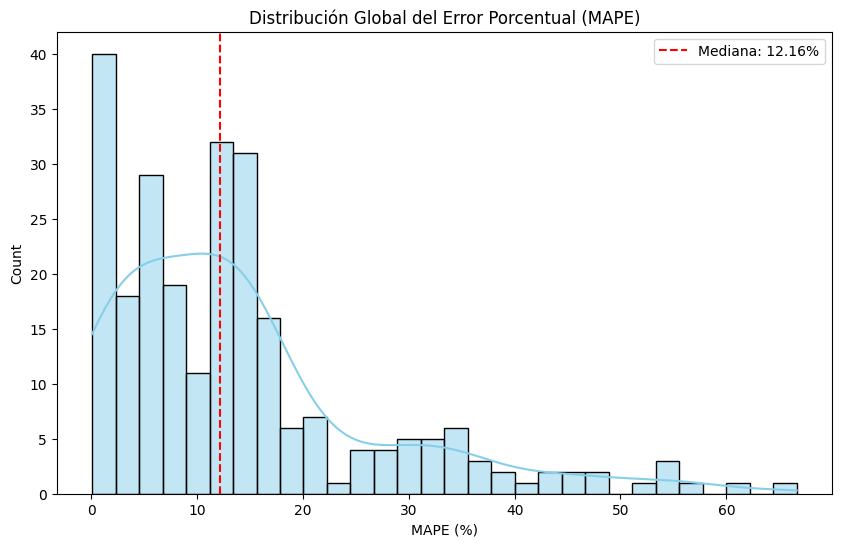

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt  # Probablemente necesites esta también

# Tu código original
plt.figure(figsize=(10, 6))
sns.histplot(df_final['MAPE_%'], bins=30, kde=True, color='skyblue')
plt.axvline(x=df_final['MAPE_%'].median(), color='red', linestyle='--', label=f'Mediana: {df_final["MAPE_%"].median():.2f}%')
plt.title('Distribución Global del Error Porcentual (MAPE)')
plt.xlabel('MAPE (%)')
plt.legend()
plt.show()

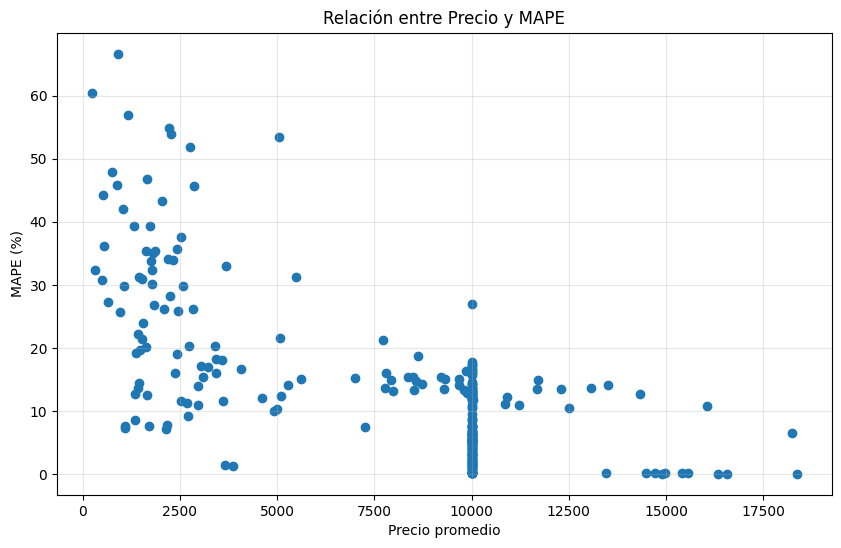

In [23]:
plt.figure(figsize=(10,6))

plt.scatter(df_final["Precio_Promedio"], df_final["MAPE_%"])

plt.xlabel("Precio promedio")

plt.ylabel("MAPE (%)")

plt.title("Relación entre Precio y MAPE")

plt.grid(True, alpha=0.3)

plt.show() 

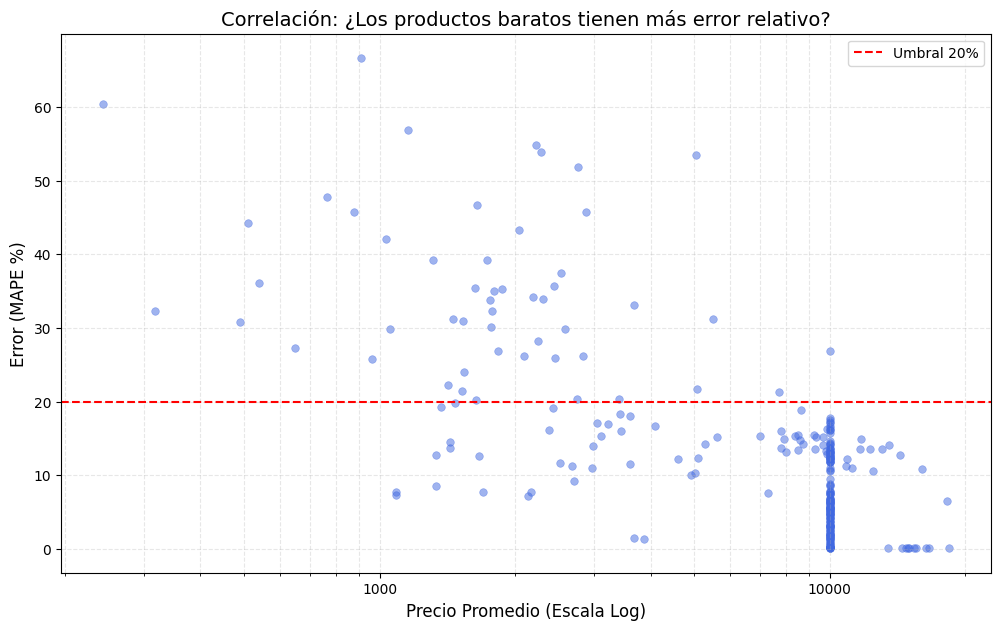

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 7))

# Usamos scatterplot de Seaborn para mejor manejo de estilos
# 'alpha=0.5' permite ver donde se concentran los datos si hay solapamiento
sns.scatterplot(
    data=df_final, 
    x="Precio_Promedio", 
    y="MAPE_%", 
    alpha=0.5, 
    edgecolor=None, 
    color='royalblue',
    s=30 # Tamaño de los puntos
)

# Opcional: Escala logarítmica si tienes mucha disparidad de precios (ej. chicles vs electrodomésticos)
plt.xscale('log') 
# Formatear el eje X para que no salga en notación científica (10^2) sino en dinero
plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.title("Correlación: ¿Los productos baratos tienen más error relativo?", fontsize=14)
plt.xlabel("Precio Promedio (Escala Log)", fontsize=12)
plt.ylabel("Error (MAPE %)", fontsize=12)

# Línea de referencia del umbral aceptable (ej. 20%)
plt.axhline(y=20, color='r', linestyle='--', label='Umbral 20%')
plt.legend()

plt.grid(True, which="both", ls="--", alpha=0.3)
plt.show()